# CAR VALUATION SYSTEM PROJECT

## BUSINESS UNDERSTANDING

### Project Overview
The Car Valuation System aims to develop a data-driven model that accurately estimates or predicts the market value of used cars based on various features such as make, model, age, mileage, fuel type, and more. By applying data science and  machine learning techniques, the system will provide a solution for determining the value of used cars, which is valuable for sellers, buyers, car dealerships, and financial institutions.

### Business Problem
The primary goal of this project is to develop a strong reliable predictive model for car valuation that the stakeholders can trust for accurate pricing estimates, thereby reducing uncertainties and developing informed decision-making.
The price of used cars is influenced by several factors including car's age, condition, location, and demand for specific models. This can create challenges for stakeholders in that:
- Buyers: They may overpay for a car due to lack of enough information about its true market value.
- Sellers: They may price their vehicles too low, leading to loss of potential profit.
- Dealerships: They need an efficient way to assess car values for pricing and providing fair trade-in offers.
- Financial Institutions: They rely on accurate car valuations for loan approvals and insurance policies.

### Project Objectives
- Build a predictive model that inputs various car features and returns an estimated market price.
- Include data from different cities to ensure the model accounts for different regional pricing variations.
- Evaluate and validate the model using standard regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²) score to ensure the accuracy and reliability of the predictions.
- Provide recommendations for businesses for price optimization and market strategies.
- Deploy the model in a user-friendly platform (e.g., web application) where users can receive real-time car price estimations.

### Stakeholders
- **Individual Sellers**: People who wish to sell their used cars and need an estimate of their vehicle’s worth.
- **Car Buyers**: People looking to purchase used cars who need to know if the listed price is fair.
- **Car Dealerships**: Businesses that need a reliable tool for pricing to maintain profitability and customer satisfaction.
- **Financial Institutions and Insurance Companies**: Organizations that provide car loans or insurance policies and require accurate car  
valuations for underwriting and risk assessment.
- **Online Car Marketplaces**: Platforms that list used cars and could use the system to display fair price estimates for users.

## DATA UNDERSTANDING

### Data Overview
We aim to build this System by utilizing a dataset that comprises of car data from various regions and cities in India like Ahmedabad, Bangalore, Chennai, Gurgaon, Hyderabad, Jaipur, Kolkata, Mumbai, and Pune.

### Data Sources and Collection
The data used for this car valuation system project was sourced from Cardekho(http://Cardekho.com), a leading automotive website that provides detailed information on car listings, specifications, pricing, and more.
Web scraping was done in observance with the site's terms of service, and the data was structured into a CSV file for easy access and manipulation.


### Data Description
The dataset contains the following features:

- `Brand`: The manufacturer or brand of the vehicle (e.g., Toyota, Ford).
- `Make_Year`: The year the vehicle was manufactured.
- `Fuel`: The type of fuel the vehicle uses (e.g., Petrol, Diesel, Electric).
- `KMs_Driven`: The total kilometers driven by the vehicle.
- `Engine_Displacement`: The engine capacity measured in liters or cubic centimeters (cc).
- `No_Of_Owner`: The number of previous owners the vehicle has had.
- `Transmission`: Type of transmission (e.g., Manual, Automatic).
- `Mileage`: The distance the vehicle can travel per unit of fuel (usually measured in km/l).
- `Max_Power`: The maximum power output of the engine (measured in horsepower or kilowatts).
- `Torque`: The twisting force produced by the engine (measured in Nm).
- `Seats`: The number of seats in the vehicle.
- `Color`: The color of the vehicle.
- `Gear_Box`: The type of gearbox (could be automatic or manual).
- `Drive_Type`: The drivetrain configuration (e.g., Front-Wheel Drive, Rear-Wheel Drive, All-Wheel Drive).
- `Steering_Type`: The type of steering system (e.g., Power Steering, Manual Steering).
- `Front_Brake_Type`: The type of brakes used on the front wheels (e.g., Disc, Drum).
- `Rear_Brake_Type`: The type of brakes used on the rear wheels (e.g., Disc, Drum).
- `Acceleration`: The time taken to accelerate from 0 to 100 km/h (measured in seconds).
- `Price`: The selling price of the vehicle(The Target Variable).

### Data Exploration

In [293]:
# Importing Required libraries
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

import scipy.stats as stats
import warnings 
warnings.filterwarnings('ignore')

In [294]:
# Load each city into its own DataFrame
bangalore = pd.read_csv('banglore.csv')
Chennai = pd.read_csv('chennai.csv')
gurgaon = pd.read_csv('gurgaon.csv')
Hyderabad = pd.read_csv('hyderabad.csv')
Jaipur = pd.read_csv('jaipur.csv')
Kolkata = pd.read_csv('kolkata.csv')
mumbai = pd.read_csv('mumbai.csv')
Pune = pd.read_csv('pune.csv')
ahmedabad = pd.read_csv('ahmedabad.csv')

# Add a 'City' column to each DataFrame
bangalore['City'] = 'bangalore'
Chennai['City'] = 'chennai'
gurgaon['City'] = 'gurgaon'
Hyderabad['City'] = 'hyderabad'
Jaipur['City'] = 'jaipur'
Kolkata['City'] = 'kolkata'
mumbai['City'] = 'mumbai'
Pune['City'] = 'pune'
ahmedabad['City'] = 'ahmedabad'


In [295]:
# Checking the shape
print(Jaipur.shape)

print(ahmedabad.shape)

print (mumbai.shape)

print(bangalore.shape)

print(gurgaon.shape)

print(Hyderabad.shape)

print(Pune.shape)

print(Kolkata.shape)

print(Chennai.shape)

(438, 22)
(450, 22)
(648, 22)
(500, 22)
(1005, 22)
(675, 22)
(240, 22)
(611, 22)
(630, 22)


In [296]:
# Making a list of data to concatinate
Frames=[ahmedabad,mumbai, bangalore, gurgaon, Jaipur, Hyderabad, Pune, Kolkata, Chennai]

In [297]:
# Storing all the car data in 
data=pd.concat(Frames, ignore_index=True)

In [298]:
data.head(3)

Unnamed: 0                    Brand  Make_Year    Fuel  KMs_Driven  \
0           0  2020 Maruti Swift Dzire       2019  Petrol  11,935 Kms   
1           1      2016 Nissan Terrano       2016  Diesel  74,555 Kms   
2           2  2020 Maruti Swift Dzire       2019  Petrol   9,379 Kms   

  Engine_Displacement No_Of_Owner Transmission     Mileage Max_Power Torque  \
0             1197 cc   1st Owner       Manual  21.21 kmpl  81.80bhp  113Nm   
1             1461 cc   2nd Owner       Manual  20.45 kmpl   83.8bhp  200Nm   
2             1197 cc   1st Owner       Manual  21.21 kmpl  81.80bhp  113Nm   

   Seats  Color Gear_Box Drive_Type Steering_Type Front_Brake_Type  \
0      5   Grey  5 Speed        FWD         Power             Disc   
1      5  Black  5 Speed        FWD         Power             Disc   
2      5  White  5 Speed        FWD         Power             Disc   

  Rear_Brake_Type  Acceleration          Engine_Type     Price       City  
0            Drum  12.6 Seconds  K Series VVT Engine  6,80,000  ahmedabad  
1            Drum    14 Seconds    K9K Diesel Engine  4,70,500  ahmedabad  
2            Drum  12.6 Seconds  K Series VVT Engine  6,75,000  ahmedabad

In [299]:
data.tail(3)

Unnamed: 0                         Brand  Make_Year    Fuel  \
5194         627      Renault Scala Diesel RxL       2015  Diesel   
5195         628  Toyota Corolla Altis G HV AT       2013  Petrol   
5196         629         Tata Indica DLS BSIII       2013  Diesel   

        KMs_Driven Engine_Displacement   No_Of_Owner Transmission     Mileage  \
5194    70,000 kms             1461 CC  Second Owner       Manual  21.64 kmpl   
5195    23,900 kms             1798 CC   Third Owner    Automatic  14.53 kmpl   
5196  1,13,000 kms             1405 CC  Second Owner       Manual  17.88 kmpl   

      Max_Power          Torque  Seats   Color Gear_Box Drive_Type  \
5194   84.8 bhp  200Nm@ 2000rpm      5       -  5 Speed        FWD   
5195  138.1 bhp  173Nm@ 4000rpm      5       -  7 Speed        FWD   
5196  48.21 bhp   85Nm@ 2500rpm      5  Silver  5 Speed        FWD   

     Steering_Type Front_Brake_Type Rear_Brake_Type  Acceleration  \
5194         Power  Ventilated Disc            Drum    16 Seconds   
5195         Power  Ventilated Disc      Solid Disc  10.42Seconds   
5196         Power  Ventilated Disc            Drum  16.8 Seconds   

                    Engine_Type      Price     City  
5194          dCi Diesel Engine  4.5 Lakh*  chennai  
5195  DOHC Dual VVT-i Petrol En    8 Lakh*  chennai  
5196                 TDi Engine  1.4 Lakh*  chennai

In [300]:
# Display the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197 entries, 0 to 5196
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5197 non-null   int64 
 1   Brand                5197 non-null   object
 2   Make_Year            5197 non-null   int64 
 3   Fuel                 5197 non-null   object
 4   KMs_Driven           5197 non-null   object
 5   Engine_Displacement  5197 non-null   object
 6   No_Of_Owner          5197 non-null   object
 7   Transmission         5197 non-null   object
 8   Mileage              5197 non-null   object
 9   Max_Power            5197 non-null   object
 10  Torque               5197 non-null   object
 11  Seats                5197 non-null   int64 
 12  Color                5197 non-null   object
 13  Gear_Box             5189 non-null   object
 14  Drive_Type           5104 non-null   object
 15  Steering_Type        5172 non-null   object
 16  Front_

In [301]:
# Display the shape of the data
data.shape

(5197, 22)

In [302]:
# Display the data types
data.dtypes

Unnamed: 0              int64
Brand                  object
Make_Year               int64
Fuel                   object
KMs_Driven             object
Engine_Displacement    object
No_Of_Owner            object
Transmission           object
Mileage                object
Max_Power              object
Torque                 object
Seats                   int64
Color                  object
Gear_Box               object
Drive_Type             object
Steering_Type          object
Front_Brake_Type       object
Rear_Brake_Type        object
Acceleration           object
Engine_Type            object
Price                  object
City                   object
dtype: object

In [303]:
# Summary Statistics
data.describe()

Unnamed: 0  Make_Year  Seats
count      5197.0     5197.0 5197.0
mean        322.5     2014.9    5.2
std         220.8        3.1    0.7
min           0.0     1995.0    2.0
25%         144.0     2013.0    5.0
50%         294.0     2015.0    5.0
75%         461.0     2017.0    5.0
max        1004.0     2021.0    9.0

In [304]:
# Set_option to see Maximum columns
pd.set_option('display.max_columns', None)
# Set_option to see Maximum Rows
pd.set_option('display.max_rows', None)

## DATA PREPROCESSING

### Data Cleaning 
- In this Step we will clean our data and make it suitable for model building.

In [305]:
# Drop the Unnamed: 0 column from the data
data.drop('Unnamed: 0', axis= 1, inplace = True)

In [306]:
# Making a backup copy of the data
backup= data.copy()

In [307]:
# First reset index for the data
df=data.reset_index(drop=True)

In [308]:
df.shape

(5197, 21)

#### Brand Column

In [309]:
# Checking the Unique Values in brand name column 
df['Brand'].value_counts()

Maruti Wagon R VXI                                        49
2016 Hyundai Grand i10                                    34
2015 Hyundai Grand i10                                    33
2014 Maruti Swift                                         32
2018 Renault KWID                                         29
2018 Hyundai i20                                          28
2017 Hyundai Grand i10                                    28
2015 Maruti Swift                                         27
Maruti Alto 800 LXI                                       27
2017 Hyundai i20                                          26
2017 Maruti Baleno                                        25
2013 Hyundai i10                                          25
2018 Maruti Baleno                                        25
2016 Maruti Swift                                         24
Maruti Alto LXi                                           23
2014 Hyundai Grand i10                                    23
Maruti Swift VDI        

In [310]:
df['Brand']=df['Brand'].str.split(' ').str.slice(0,4).str.join(' ')

#### Year Column

In [311]:
# Checking Unique values present in Year
df['Make_Year'].value_counts()

2017    678
2015    664
2016    633
2018    622
2014    524
2013    497
2012    366
2011    309
2019    304
2020    145
2010    139
2008     94
2009     76
2007     55
2021     43
2006     17
2005     11
2004     10
2000      4
2003      3
2002      2
1995      1
Name: Make_Year, dtype: int64

In [312]:
# Changing Value into Numerical
df['Make_Year']=df['Make_Year'].astype(int)

In [313]:
df['Make_Year'].dtype

dtype('int32')

In [314]:
# Checking Value counts and Unique values present in the Fuel Columns
df['Fuel'].value_counts()

Petrol      3030
Diesel      2132
CNG           18
LPG           16
Electric       1
Name: Fuel, dtype: int64

In [315]:
df['Fuel']=df['Fuel'].astype(str)

#### KMs_Driven Column

In [316]:
# Checking Value count 
df['KMs_Driven'].value_counts()

60,000 kms       58
70,000 kms       55
40,000 kms       49
65,000 kms       48
80,000 kms       47
75,000 kms       47
50,000 kms       43
55,000 kms       41
45,000 kms       38
42,000 kms       35
1,20,000 kms     34
30,000 kms       34
35,000 kms       32
90,000 kms       28
25,000 kms       27
51,000 kms       27
48,000 kms       27
49,000 kms       24
72,000 kms       24
38,000 kms       23
44,000 kms       22
28,000 kms       21
41,000 kms       20
54,000 kms       20
68,000 kms       20
15,000 kms       20
10,000 kms       19
69,000 kms       19
20,000 kms       18
62,000 kms       18
43,000 kms       18
24,000 kms       18
39,000 kms       18
33,000 kms       17
18,000 kms       17
32,000 kms       17
34,000 kms       17
36,000 kms       17
56,000 kms       16
78,000 kms       16
1,00,000 kms     16
14,000 kms       16
76,000 kms       15
85,000 kms       15
5,000 kms        15
82,000 kms       14
59,000 kms       14
1,10,000 kms     14
74,000 kms       14
29,000 kms       14


In [317]:
# We can see Two format as kms and Kms, we will replace it one by one, we also replace comma and change the type to intiger
df['KMs_Driven']= df['KMs_Driven'].str.replace('kms','')
df['KMs_Driven']= df['KMs_Driven'].str.replace('Kms','')
df['KMs_Driven']= df['KMs_Driven'].str.replace(',','').astype(int)

In [318]:
df['KMs_Driven'].head()

0    11935
1    74555
2     9379
3    31824
4    49072
Name: KMs_Driven, dtype: int32

#### Engine_Displacement Column

In [319]:
# Checking Unique Values 
df['Engine_Displacement'].unique()
df.head(3)

Brand  Make_Year    Fuel  KMs_Driven Engine_Displacement  \
0  2020 Maruti Swift Dzire       2019  Petrol       11935             1197 cc   
1      2016 Nissan Terrano       2016  Diesel       74555             1461 cc   
2  2020 Maruti Swift Dzire       2019  Petrol        9379             1197 cc   

  No_Of_Owner Transmission     Mileage Max_Power Torque  Seats  Color  \
0   1st Owner       Manual  21.21 kmpl  81.80bhp  113Nm      5   Grey   
1   2nd Owner       Manual  20.45 kmpl   83.8bhp  200Nm      5  Black   
2   1st Owner       Manual  21.21 kmpl  81.80bhp  113Nm      5  White   

  Gear_Box Drive_Type Steering_Type Front_Brake_Type Rear_Brake_Type  \
0  5 Speed        FWD         Power             Disc            Drum   
1  5 Speed        FWD         Power             Disc            Drum   
2  5 Speed        FWD         Power             Disc            Drum   

   Acceleration          Engine_Type     Price       City  
0  12.6 Seconds  K Series VVT Engine  6,80,000  ahmedabad  
1    14 Seconds    K9K Diesel Engine  4,70,500  ahmedabad  
2  12.6 Seconds  K Series VVT Engine  6,75,000  ahmedabad

In [320]:
# We can see two type as CC and cc, other type of data like 'white' and 17 x 7.5J' also present 

In [321]:
# Removing cc  and CC from Engine_Displacement 
df['Engine_Displacement']= df['Engine_Displacement'].str.replace('cc', '')
df['Engine_Displacement']= df['Engine_Displacement'].str.replace('CC', '')
df['Engine_Displacement']= df['Engine_Displacement'].str.replace('White', '1194')
df['Engine_Displacement']= df['Engine_Displacement'].str.replace('Grey', '1194')
df['Engine_Displacement']= df['Engine_Displacement'].str.replace('17 x 7.5J', '1194')

In [322]:
# Changing Type To integer
df['Engine_Displacement']=df['Engine_Displacement'].astype(int)

In [323]:
df['Engine_Displacement'].head()

0    1197
1    1461
2    1197
3    1248
4    1197
Name: Engine_Displacement, dtype: int32

#### No_Of_Owners Column

In [324]:
# Checking Unique values
df['No_Of_Owner'].unique()

array(['1st Owner', '2nd Owner', 'First Owner', 'Second Owner',
       'Third Owner', 'Fourth & Above Owner', '3rd Owner',
       'Test Drive Car'], dtype=object)

In [325]:
# We can see '1st Owner' == 'First Owner', '2nd Owner'=='Second Owner', '3rd Owner'=='Third Owner' , lets replace
df['No_Of_Owner']=df['No_Of_Owner'].str.replace('1st Owner','First Owner')
df['No_Of_Owner']=df['No_Of_Owner'].str.replace('2nd Owner','Second Owner')
df['No_Of_Owner']=df['No_Of_Owner'].str.replace('3rd Owner','Third Owner')

In [326]:
# Removing Owner also from First , second and  third owner
df['No_Of_Owner']=df['No_Of_Owner'].str.replace('Owner','')

#### Transmission Type Column

In [327]:
# Checking Unique Values
df['Transmission'].unique()

array(['Manual', 'Automatic', 'KA53', 'KA01', 'KA05', 'KA04', 'KA03',
       'KA02', 'KA09', 'KA51', 'MH04', 'MH02', 'MH03', 'MH47', 'MH05',
       'MH43', 'MH01', 'DL9C', 'DL2C', 'DL1C', 'HR87', 'UP16', 'HR51',
       'DL8C', 'HR29', 'DL10', 'DL7C', 'HR10', 'HR77', 'DL6C', 'DL12',
       'RJ23', 'RJ14', 'TS08', 'AP23', 'AP09', 'TS10', 'MH12', 'MH11'],
      dtype=object)

In [328]:
# We have RTO Information available in some rows. lets remove and replace it with Manual Type
list1= ['KA53', 'KA01', 'KA05', 'KA04', 'KA03',
       'KA02', 'KA09', 'KA51', 'MH04', 'MH02', 'MH03', 'MH47', 'MH05',
       'MH43', 'MH01', 'DL9C', 'DL2C', 'DL1C', 'HR87', 'UP16', 'HR51',
       'DL8C', 'HR29', 'DL10', 'DL7C', 'HR10', 'HR77', 'DL6C', 'DL12',
       'RJ23', 'RJ14', 'TS08', 'AP23', 'AP09', 'TS10', 'MH12', 'MH11']

In [329]:
#Replacing list1 value with manual
df['Transmission'].replace(to_replace =list1, value ="Manual", inplace=True)

In [330]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [331]:
# Now we have only Two type of values

#### Mileage column 

In [332]:
#Checkign Unique values present in the Mileage column
unique_mileage = df['Mileage'].unique()

# Limit to the first 5 entries
print(unique_mileage[:5])

['21.21 kmpl' '20.45 kmpl' '28.4 kmpl' '21.01 kmpl' '21.79 kmpl']


In [333]:
# We need to remove kmpl, km/hr, km/kg, Third Party insurance and Third Party and Comprehensive , 1197 CC
df['Mileage']=df['Mileage'].str.replace('km/kg', '')

#replaceing K=kmpl from Mileage
df['Mileage']= df['Mileage'].str.replace('kmpl', '')

df['Mileage']=df['Mileage'].str.replace('Comprehensive', '0')

df['Mileage']=df['Mileage'].str.replace('km/hr', '')

df['Mileage']=df['Mileage'].str.replace('Third Party insurance', '0')

df['Mileage']=df['Mileage'].str.replace('Third Party', '0')

df['Mileage']=df['Mileage'].str.replace('Zero Dep', '0')

df['Mileage']=df['Mileage'].str.replace('1197 CC', '0')

df['Mileage']=df['Mileage'].str.replace(' ', '0').astype('float32')

####  Max_Power column

In [334]:
# Display only the first 5 unique values in the Max_Power column
unique_max_power = df['Max_Power'].unique()

# Limit to the first 5 entries
print(unique_max_power[:5])


['81.80bhp' '83.8bhp' '74bhp' '67.05bhp' '100bhp']


In [335]:
#replacing bhp from max_power columns
df['Max_Power']=df['Max_Power'].str.replace('bhp', '')

In [336]:
#making list of the odd values to be replace form Max_power column
list2= ['Silver','814 CC','1197 CC','175nm','1086 CC','80 PS at 5200 rpm','null ',
        '793 CC','Blue','1461 CC', '1396 CC','1198 CC' ,'100PS at 5,500rpm', '85ps', 
        '1591 CC', '1248 CC', '998 CC', '999 CC', '1498 CC', '796 CC', '1199 CC', 
        '55 Bhp','793 CC','118PS at 6,600 rpm','2179 CC','1373 CC', '1497 CC','Golden','4 Speed']

In [337]:
#Replacing list1 value with 0 
df['Max_Power'].replace(to_replace =list2, value ="0", inplace=True)

In [338]:
df['Max_Power']=df['Max_Power'].astype(float)

#### Torque Column

In [339]:
# Retrieve unique values from the Torque column
unique_torque = df['Torque'].unique()

# Display the first 5 unique values
print(unique_torque[:5])


['113Nm' '200Nm' '190Nm' '90Nm' '145Nm']


In [340]:
df['Torque']=df['Torque'].str.split(' ').str.get(0)

In [341]:
print(df['Torque'].head())


0    113Nm
1    200Nm
2    113Nm
3    190Nm
4    113Nm
Name: Torque, dtype: object


In [342]:
# Remove space
df['Torque']=df['Torque'].str.replace('@', '')

df['Torque']=df['Torque'].str.replace('Nm', '')

df['Torque']=df['Torque'].str.replace('nm', '')

df['Torque']=df['Torque'].str.replace('NM', '')

df['Torque']=df['Torque'].str.replace('N', '')

df['Torque']=df['Torque'].str.replace('bph', '')

df['Torque']=df['Torque'].str.replace('@', '')

df['Torque']=df['Torque'].str.replace('b', '')

df['Torque']=df['Torque'].str.replace('/', '')

df['Torque']=df['Torque'].str.replace('13.1k', '0')

df['Torque']=df['Torque'].str.replace('RWD', '0')

df['Torque']=df['Torque'].str.replace('24KG', '0')

df['Torque']=df['Torque'].str.replace('6.1kg', '0')

df['Torque']=df['Torque'].str.replace('13.1k', '0')

df['Torque']=df['Torque'].str.replace('hp', '')


In [343]:
print(df['Torque'].head())


0    113
1    200
2    113
3    190
4    113
Name: Torque, dtype: object


In [344]:
df['Torque']=df['Torque'].str.replace('White', '0')

In [345]:
df['Torque'].replace(to_replace=['110(1','18.5k', '18.113k', '0gm', '0m', '110(11.2)','18.5kg-m'],
                     value ="113", inplace=True)

In [346]:
df['Torque']=df['Torque'].astype(float)

In [347]:
print(df['Torque'].head())


0   113.0
1   200.0
2   113.0
3   190.0
4   113.0
Name: Torque, dtype: float64


#### Seats Column

In [348]:
print(df['Seats'].unique()[:5])


[5 8 7 4 9]


- We can see seats having no problem we will next check the color column

#### Color Column

In [349]:
df['Color'].value_counts().head(5)

White     1299
Other      839
Silver     691
Grey       648
Red        461
Name: Color, dtype: int64

In [350]:
# Here we can see Color with one counts, which can be replace by the popular colors like white/RED 
# Make a list to replace with red
list4= ['BRONZE','BEIGE' ,'PLATINUM SILVER','Violet','TITANIUM GREY','P White','S white','C White','Dark Blue','ACUA TINT',
        'I Sand','Candy White','MET ECRU BEIGE','U titanium','S Silver','Cherry','Magma Grey','Terra Beige','PA White',
        'Arctic White','Chocolate','Sunlight copper','golden brown','beige','Ice Cool White','Sleek Silver','VERMONT RED',
        'Granite Grey','modern steel','Cherry Red','bronze','Premium Silver Metallic','E beige','Metallic Pearl Arctic White',
        'Magma grey','V red','granite cystal metallic clearcoat','S cooper','CARNELIAN RED PEARL','SBrown','BLAZING RED',
        'Pa white','O Bronze','Jawa brown','P Met Arc White','Metallic Glistening Grey','P white','garnite grey','Chill Green',
        'MIDNIGHT BLACK','Polar white','midnight blue','P Black','Planet grey','Mordern Steel','Bronze','Mettalic Blue',
        'Arctic white','Ligh Blue','Night Blue','Red Pearl','GOLD','Moonlight Silver','GRANITE GREY','R silver metall',
        'Modern Steel Metallic','MD Silver','Lakeprpl','garnet red','Pink','Breeze Blue','Glasgow Gray','B Chocklet',
        'Metallic Grey','Ice White','Fire Red','Outback Bronze','Bold Beige Metallic','Black Sapphire Metallic','T Brown Met',
        'S White','Diamond','Light Brown','TITANIUM','Urban titanium','Pure white','Solid White','Megma Gry','V Red','Metallic Bronze',
        'F Red','S Beigh','Espresso Brown','star dust','Sea Grey','Urban Titanium Metallic','StarDust','Blazing Red',
        'Alabaster Silver Met','Real Earth','Silky Silver','Premium Amber Metalic','Planet Grey','Outbackbronze','ARIZONA BLUE',
        'Royal Gold','Bold Beige','Fiery Red','Mettalic Steel','New Granite Grey','S B Silver','Biege',
        'Chill Met','Gray','rayol gold','Typhoon Silver','Midnight Blue','Outback bronze','Cappuchino Beige',
        'Metalice Musted','Blade Silver','Platinum Silver','Fire Brick Red','Twilight Blue','metallic grey',
        'Deep Sea Blue BMW X','Sleek silver','Pearl Supreme White','White orchid pear','carbon steel',
        'Blue Water met','BEIGE METALIC','Granite gray','P A White','Metallic silky silver','nexa blue','titanium metalic',
        'Pma White','Arabian Blue Crystal Effect','White orchid pearl']

In [351]:
df['Color'].replace(to_replace =list4, value='Red', inplace= True)

In [352]:
df['Color']=df['Color'].str.replace('-','White')

In [353]:
df['Color'].value_counts()

White             1500
Other              839
Silver             691
Grey               648
Red                639
Blue               277
Black              198
Brown              109
Maroon              89
Golden              66
Orange              51
Green               16
Star Dust            8
Silky silver         7
Sky Blue             7
Gold                 7
Yellow               6
Purple               5
Urban Titanium       5
SILKY SILVER         5
Oliv Green           5
Golden Brown         4
Beige                4
Polar White          4
Superior white       4
Taffeta White        3
Name: Color, dtype: int64

In [354]:
# We can replace Polar White, Superior white,Taffeta White  to white
df['Color'].replace(to_replace =['Polar White', 'Superior white','Taffeta White'], value='White', inplace= True)

In [355]:
# Gold ,Golden Brown can be replace with Golden
df['Color'].replace(to_replace =['Gold', 'Golden Brown'], value='Golden', inplace= True)

In [356]:
# 'Oliv Green' can be replace with Green 
df['Color']=df['Color'].str.replace('Oliv Green', 'Green')

In [357]:
#'Silky silver' will be replace by 'Silky silver'
df['Color']=df['Color'].str.replace('SILKY SILVER', 'Silky silver')

In [358]:
#'Sky Blue' will be replace by Blue
df['Color']=df['Color'].str.replace('Sky Blue', 'Blue')

In [359]:
#'Silky silver' will be replace by 'Silver' 
df['Color']=df['Color'].str.replace('Silky silver', 'Silver')

In [360]:
df['Color'].unique()

array(['Grey', 'Black', 'White', 'Red', 'Blue', 'Silver', 'Other',
       'Golden', 'Maroon', 'Brown', 'Orange', 'Green', 'Purple',
       'Star Dust', 'Urban Titanium', 'Yellow', 'Beige'], dtype=object)

#### The Gear_Box Column

In [361]:
df['Gear_Box'].value_counts().head(5)

5 Speed    3655
6 Speed     644
8 Speed     126
5           119
7 Speed     106
Name: Gear_Box, dtype: int64

In [362]:
# In Gear speed column we need on the number so we will remove the 'Speed' from all first
df['Gear_Box']=df['Gear_Box'].str.replace('Speed', '')

In [363]:
# Removing space
df['Gear_Box']=df['Gear_Box'].str.replace(' ', '')

In [364]:
# Replacing speed 
df['Gear_Box']=df['Gear_Box'].str.replace('speed', '')

In [365]:
#replacing '-'
df['Gear_Box']=df['Gear_Box'].str.replace('-', '')

In [366]:
#replacing all the varient of 5 transmission with 5
df['Gear_Box'].replace(to_replace =['FiveManualTransmission', 'FiveManualTransmissionGearbox', '5GearBox', 
                                    '5AT+PaddleShifters','5,5Forward,1Reverse','5Manual','5GearBox', 
                                    '5Manual(CableTypeGearShift)', '5CVT'], 
                       value='5', inplace= True)

In [367]:
#replacing all the varient of 6 transmission with 6
df['Gear_Box'].replace(to_replace =['SixManualTransmission', '6DCT','6IMT','6AT','6MT', '6iMT', 'SixGearbox','6IVT' ], 
                       value='6', inplace= True)

In [368]:
#replacing all the varient of 7 transmission with 7
df['Gear_Box'].replace(to_replace =['7GDCT7DualClutchTransmission', '7STronic','7CVT', '7Stronic','7DCT','7DSG','77GDCT',
                                    'AMG7SPEEDDCT' ], 
                       value='7', inplace= True)

In [369]:
#replacing all the varient of 8 transmission with 8
df['Gear_Box'].replace(to_replace =['8Tiptronic', '8Steptronic', '8Sport', '8DCT', '8TipTronicS', 
                                    '8AutomaticTransmission' ], 
                       value='8', inplace= True)

In [370]:
# 'CVT', 'AGS', 'AutomaticTransmission' with  8 
df['Gear_Box'].replace(to_replace =['CVT', 'AGS', 'AutomaticTransmission' ], 
                       value='8', inplace= True)

In [371]:
#replacing all the varient of 9 transmission with 9
df['Gear_Box']=df['Gear_Box'].str.replace('9Tronic','9')

In [372]:
#replacing all the varient of 4 transmission with 4
df['Gear_Box']=df['Gear_Box'].str.replace('FourManualTransmission','4')

In [373]:
# Filling Nan values
df['Gear_Box'].fillna(value='5', inplace=True)

In [374]:
# Replacing ''
df['Gear_Box'].replace(to_replace ='', value='5', inplace= True)

In [375]:
#change type as int
df['Gear_Box']=df['Gear_Box'].astype(int)

#### Drive_Type Column

In [376]:
# Lets check the values counts and unique values
df['Drive_Type'].value_counts().head(5)

FWD    4220
RWD     290
-       216
AWD      95
4WD      80
Name: Drive_Type, dtype: int64

In [377]:
#FWD mean Front Wheel drive , RWD- Rear Wheel Drive, AWD-- All wheel Drive, 
#2 Wd means either fron wheel or rear wheel drive,4X2 is also 2 WD
# So we can replace Front Wheel Drive  with FWD
#Rear Wheel Drive with ESP with RWD
# 4WD, 4X4 ,All Wheel Drive , Permanent all-wheel drive quattro  with AWD
df['Drive_Type']= df['Drive_Type'].str.replace('Front Wheel Drive', 'FWD')

In [378]:
list3=['2 WD','4X2','Two Wheel Drive', 'Two Whhel Drive']

In [379]:
df['Drive_Type'].replace(to_replace=list3, value= '2WD', inplace= True)

In [380]:
df['Drive_Type'].replace(to_replace=['4WD','4X4','All Wheel Drive','Permanent all-wheel drive quattro'], 
                         value= 'AWD', inplace= True)

In [381]:
df['Drive_Type']= df['Drive_Type'].str.replace('Rear Wheel Drive with ESP', 'RWD')

In [382]:
df['Drive_Type']= df['Drive_Type'].str.replace('-', 'FWD')

In [383]:
df['Drive_Type'].value_counts().head(5)

FWD    4466
RWD     302
AWD     187
2WD     149
Name: Drive_Type, dtype: int64

#### Steering_Type Column

In [384]:
# Checking Steering_Type 
df['Steering_Type'].value_counts().head(5)

Power         4691
Electric       310
Manual          79
Electrical      42
EPAS            19
Name: Steering_Type, dtype: int64

In [385]:
# Electric ,EPAS,Electrical, Electronic are same thigs which indicated electic streering 
# Power and Hydraulic are same
df['Steering_Type'].replace(to_replace=['Electrical','EPAS', 'Electronic'], value='Electric', inplace= True)

In [386]:
df['Steering_Type'].replace(to_replace=['Hydraulic','power'], value='Power', inplace= True)

In [387]:
df['Steering_Type']=df['Steering_Type'].str.replace('-','Power')

In [388]:
df['Steering_Type'].value_counts()

Power       4712
Electric     381
Manual        79
Name: Steering_Type, dtype: int64

#### Front_Brake_Type Column

In [389]:
# Check the values counts and unique values
df['Front_Brake_Type'].value_counts().head(5)

Disc                2960
Ventilated Disc     1853
Solid Disc           115
Ventilated Discs      68
-                     50
Name: Front_Brake_Type, dtype: int64

In [390]:
# First we will replave Front_Brake_Type Ventilated Disc  type with its varient 
df['Front_Brake_Type'].replace(to_replace=['Ventilated Disk', 'Vantilated Disc', 'Ventilated DIsc','Ventilated discs',
                                          '264mm Ventilated discs', 'Ventilated Discs','Ventilated discs',
                                           'Ventlated Disc'], 
                               value= 'Ventilated Disc',inplace= True)

In [391]:
df['Front_Brake_Type'].replace(to_replace=['Disc','Disk', 'Disc & Caliper Type', 'Disc, 236 mm'], 
                               value= 'Discs',inplace= True)

In [392]:
df['Front_Brake_Type'].replace(to_replace=['Disc & Drum','Vacuum assisted hydraulic dual circuit w','Drum'], 
                               value= 'Multilateral Disc',inplace= True)

In [393]:
df['Front_Brake_Type']=df['Front_Brake_Type'].str.replace('-', 'Discs')

In [394]:
df['Front_Brake_Type'].value_counts()

Discs                3069
Ventilated Disc      1970
Solid Disc            115
Multilateral Disc      19
Name: Front_Brake_Type, dtype: int64

#### Rear_Brake_Type Column

In [395]:
df['Rear_Brake_Type'].value_counts().head(5)

Drum               4318
Disc                491
Ventilated Disc      82
Solid Disc           62
-                    50
Name: Rear_Brake_Type, dtype: int64

In [396]:
# Here we can replace all the Drum type in Drum 
# All Ventilated Disc will be replace to make one variabel
df['Rear_Brake_Type'].replace(to_replace=['Leading-Trailing Drum','Self-Adjusting Drum','Drums', 
                                          'Ventilated Drum', 'Drums 180 mm', 'Leading & Trailing Drum',
                                         'Self adjusting drums', 'Self Adjusting Drums'], 
                               value= 'Drum',inplace= True)

In [397]:
df['Rear_Brake_Type'].replace(to_replace=['Ventilated Disc','Solid Disc','Disc & Caliper Type','Disc',
                                          'Ventilated Discs','Ventilated discs','Ventialted Disc'], 
                               value= 'Discs',inplace= True)

In [398]:
df['Rear_Brake_Type'].replace(to_replace=['262mm Disc & Drum Combination','Vacuum assisted hydraulic dual circuit w','-'], 
                               value= 'Disc & Drum',inplace= True)

In [399]:
df['Rear_Brake_Type'].value_counts().head(5)

Drum           4404
Discs           709
Disc & Drum      60
Name: Rear_Brake_Type, dtype: int64

#### Acceleration Column

In [400]:
df['Acceleration'].value_counts().head(5)

-               898
19 Seconds      198
12.9 Seconds    193
18.6 Seconds    184
15 Seconds      166
Name: Acceleration, dtype: int64

In [401]:
#Here We will replace Seconds and seconds 
df['Acceleration']= df['Acceleration'].str.replace('Seconds', '')

In [402]:
df['Acceleration']= df['Acceleration'].str.replace('seconds', '')

In [403]:
df['Acceleration']= df['Acceleration'].str.replace('s', '')

In [404]:
df['Acceleration']= df['Acceleration'].str.replace('Second', '')

In [405]:
df['Acceleration']= df['Acceleration'].str.replace('ec', '')

In [406]:
df['Acceleration']= df['Acceleration'].str.replace('S', '')

In [407]:
df['Acceleration']= df['Acceleration'].str.replace('-', '19')

In [408]:
df['Acceleration']= df['Acceleration'].str.replace(' ', '').astype(float)

In [409]:
df['Acceleration'].dtype

dtype('float64')

#### Engine_Type Column

In [410]:
df['Engine_Type'].value_counts().head(5)

In-Line Engine              382
Kappa VTVT Petrol Engine    381
Petrol Engine               295
DDiS Diesel Engine          248
K Series Petrol Engine      206
Name: Engine_Type, dtype: int64

- From above obesrvation we can see the different name are just branding by the compnay,  
- Engine type broadly categories as Diesel and Petrol
- So we can Drop the column

In [411]:
df.drop('Engine_Type', axis= 1, inplace = True)

#### Price Column

In [412]:
# Let's Clean the Price Column
df['Price'].value_counts().head(5)

4 Lakh*       49
3.5 Lakh*     48
4.25 Lakh*    48
5.5 Lakh*     45
4.5 Lakh*     42
Name: Price, dtype: int64

In [413]:
# Replacing Lakh with blank  
df['Price']=df['Price'].str.replace('Lakh', '')

In [414]:
# Replacing * with blank 
df['Price']=df['Price'].str.replace('*', '')

In [415]:
#Replacing  Space 
df['Price']=df['Price'].str.replace(' ', '')

In [416]:
#Replacing ','
df['Price']=df['Price'].str.replace(',', '')

In [417]:
# Removing Cr
df['Price']=df['Price'].str.replace('Cr', '')

In [418]:
# Changing data Type
df['Price']=df['Price'].astype(float)

In [419]:
df1=df[df['Price']<=100]

In [420]:
df1['Price']=df1['Price']*100000

In [421]:
df2=df[df['Price']>100]

In [422]:
df2.head()

Brand  Make_Year    Fuel  KMs_Driven  \
0  2020 Maruti Swift Dzire       2019  Petrol       11935   
1      2016 Nissan Terrano       2016  Diesel       74555   
2  2020 Maruti Swift Dzire       2019  Petrol        9379   
3        2018 Maruti Swift       2018  Diesel       31824   
4       2017 Maruti Baleno       2017  Petrol       49072   

   Engine_Displacement No_Of_Owner Transmission  Mileage  Max_Power  Torque  \
0                 1197      First        Manual     21.2       81.8   113.0   
1                 1461     Second        Manual     20.5       83.8   200.0   
2                 1197      First        Manual     21.2       81.8   113.0   
3                 1248      First        Manual     28.4       74.0   190.0   
4                 1197      First        Manual     21.0       81.8   113.0   

   Seats  Color  Gear_Box Drive_Type Steering_Type Front_Brake_Type  \
0      5   Grey         5        FWD         Power            Discs   
1      5  Black         5        FWD         Power            Discs   
2      5  White         5        FWD         Power            Discs   
3      5    Red         5        FWD         Power            Discs   
4      5   Blue         5        FWD      Electric            Discs   

  Rear_Brake_Type  Acceleration    Price       City  
0            Drum          12.6 680000.0  ahmedabad  
1            Drum          14.0 470500.0  ahmedabad  
2            Drum          12.6 675000.0  ahmedabad  
3            Drum           nan 600000.0  ahmedabad  
4            Drum          12.4 610000.0  ahmedabad

In [423]:
Frame=[df1, df2]

In [424]:
df_new=pd.concat(Frame)

In [425]:
df=df_new.reset_index(drop=True)

In [426]:
df['Price']=df['Price'].astype(int)

In [427]:
df.to_csv('Car_Data.csv')

#### Lets Perform Data Analysis 

In [428]:
# Lets check the shape of the dataset
df.shape

(5197, 20)

In [429]:
df.sample(5)

Brand  Make_Year    Fuel  KMs_Driven  \
2064       Hyundai Santro Xing GL       2012  Petrol       43000   
333               Maruti Ritz VXi       2014  Petrol       60000   
3866             2018 Hyundai EON       2017  Petrol       16062   
1654  Renault Duster 110PS Diesel       2017  Diesel       38000   
3684      2016 Maruti Swift Dzire       2016  Petrol       53969   

      Engine_Displacement No_Of_Owner Transmission  Mileage  Max_Power  \
2064                 1086      First        Manual     17.9       62.1   
333                  1197      First        Manual     18.5       85.8   
3866                  814      First        Manual     21.1       55.2   
1654                 1461      First     Automatic     19.6      108.5   
3684                 1197      First        Manual     21.4       83.1   

      Torque  Seats   Color  Gear_Box Drive_Type Steering_Type  \
2064    96.1      5  Silver         5        FWD         Power   
333    114.0      5   White         6        FWD         Power   
3866    74.5      5    Blue         5        FWD         Power   
1654   245.0      5   White         6        FWD         Power   
3684   115.0      5    Grey         5        FWD         Power   

     Front_Brake_Type Rear_Brake_Type  Acceleration   Price       City  
2064  Ventilated Disc            Drum          19.0  165000    kolkata  
333   Ventilated Disc            Drum          15.0  365000  ahmedabad  
3866            Discs            Drum          19.0  355000  bangalore  
1654            Discs            Drum          12.5  985000  hyderabad  
3684            Discs            Drum          12.4  575000     mumbai

In [430]:
# Checking the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197 entries, 0 to 5196
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                5197 non-null   object 
 1   Make_Year            5197 non-null   int32  
 2   Fuel                 5197 non-null   object 
 3   KMs_Driven           5197 non-null   int32  
 4   Engine_Displacement  5197 non-null   int32  
 5   No_Of_Owner          5197 non-null   object 
 6   Transmission         5197 non-null   object 
 7   Mileage              5197 non-null   float32
 8   Max_Power            5197 non-null   float64
 9   Torque               5197 non-null   float64
 10  Seats                5197 non-null   int64  
 11  Color                5197 non-null   object 
 12  Gear_Box             5197 non-null   int32  
 13  Drive_Type           5104 non-null   object 
 14  Steering_Type        5172 non-null   object 
 15  Front_Brake_Type     5173 non-null   o

- Data is 5197 entries with 20 columns  
- We have 1 float32 , 3 float64 , 5 int32 , 1 int64 and 10 object type variables.  
- In columns like Drive_Type,Steering_Type, Front_Brake_Type,Rear_Brake_Type  and Acceleration we have null values.  

#### Data Type Conversion

In [431]:
# Convert object columns to category
df['Brand'] = df['Brand'].astype('category')
df['Fuel'] = df['Fuel'].astype('category')
df['No_Of_Owner'] = df['No_Of_Owner'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Color'] = df['Color'].astype('category')
df['Drive_Type'] = df['Drive_Type'].astype('category')
df['Steering_Type'] = df['Steering_Type'].astype('category')
df['Front_Brake_Type'] = df['Front_Brake_Type'].astype('category')
df['Rear_Brake_Type'] = df['Rear_Brake_Type'].astype('category')
df['City'] = df['City'].astype('category')

# Convert int32 columns to int64
df['Make_Year'] = df['Make_Year'].astype('int64')
df['KMs_Driven'] = df['KMs_Driven'].astype('int64')
df['Engine_Displacement'] = df['Engine_Displacement'].astype('int64')
df['Gear_Box'] = df['Gear_Box'].astype('int64')
df['Price'] = df['Price'].astype('int64')

# Convert float32 columns to float64 for more precision
df['Mileage'] = df['Mileage'].astype('float64')
df['Max_Power'] = df['Max_Power'].astype('float64')
df['Torque'] = df['Torque'].astype('float64')
df['Acceleration'] = df['Acceleration'].astype('float64')

In [432]:
df.dtypes

Brand                  category
Make_Year                 int64
Fuel                   category
KMs_Driven                int64
Engine_Displacement       int64
No_Of_Owner            category
Transmission           category
Mileage                 float64
Max_Power               float64
Torque                  float64
Seats                     int64
Color                  category
Gear_Box                  int64
Drive_Type             category
Steering_Type          category
Front_Brake_Type       category
Rear_Brake_Type        category
Acceleration            float64
Price                     int64
City                   category
dtype: object

In [433]:
# Checking the null values
df.isnull().sum()

Brand                    0
Make_Year                0
Fuel                     0
KMs_Driven               0
Engine_Displacement      0
No_Of_Owner              0
Transmission             0
Mileage                  0
Max_Power                0
Torque                   0
Seats                    0
Color                    0
Gear_Box                 0
Drive_Type              93
Steering_Type           25
Front_Brake_Type        24
Rear_Brake_Type         24
Acceleration           537
Price                    0
City                     0
dtype: int64

- Here we can see maximum 537 null values present in the Acceleration columns.  
- In other columns values are less, we can drop less values also. 

### EDA: Univariate Analysis

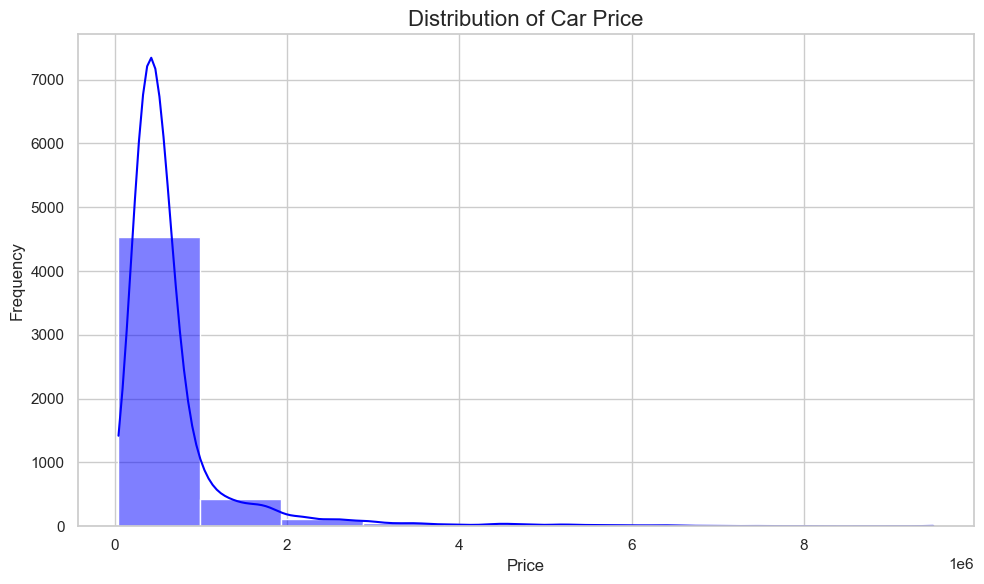

In [434]:
# Distribution of Car Price

plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, color='blue', bins=10)  
plt.title('Distribution of Car Price', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


Observations:
- The plot shows a right-skewed distribution of car prices. This means that most cars are priced lower, while a smaller number of cars are 
  priced very high.
- Peak at Lower Price indicate cars are priced in the lower range.
- The long tail towards the higher end of the price range indicates presence of a few luxury, very expensive or high-end cars.
- The extreme values in the right tail might be considered outliers, representing very expensive or unique vehicles.

<AxesSubplot:xlabel='Price', ylabel='Density'>

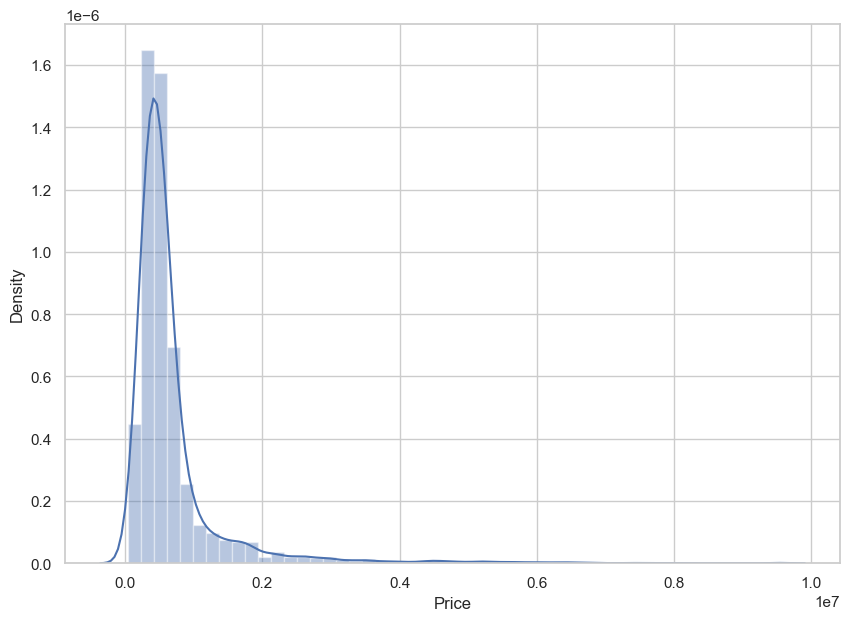

In [435]:
plt.figure(figsize= (10,7))
sns.distplot(df['Price'])

In [436]:
# Lets see the descriptive statistics for the Price column
df['Price'].describe()

count      5197.0
mean     675948.7
std      757767.1
min       45000.0
25%      340000.0
50%      480000.0
75%      675000.0
max     9500000.0
Name: Price, dtype: float64

- Average price for old car is 675948.7  and minimum price for old car avilable in  car dekho.com is 45000.  
- 75 percentile of the cars are below 6.750000e+05 this range which is quite good number. 

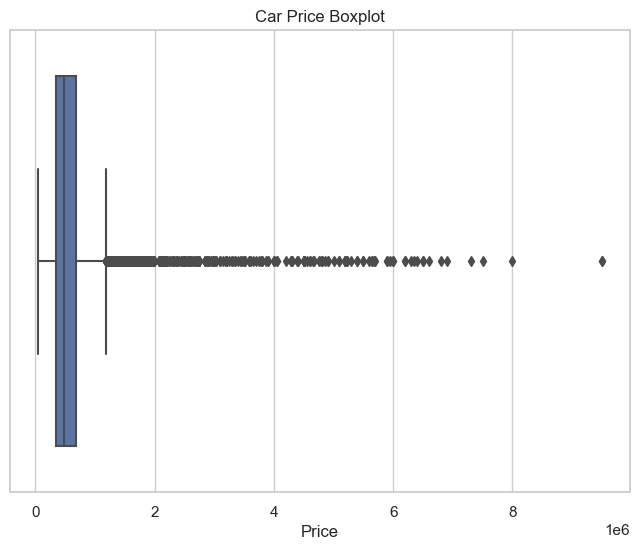

In [437]:
# Box Plot for Price Column Outliers

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Price'])
plt.title('Car Price Boxplot')
plt.show()


Observations: 
- Most cars are priced lower since the majority of cars are clustered towards the lower price range.
- A few cars are very expensive since there are a few outliers with significantly higher prices.
- Price distribution is skewed meaning the data is not evenly distributed, with more cars at the lower end of the price spectrum.

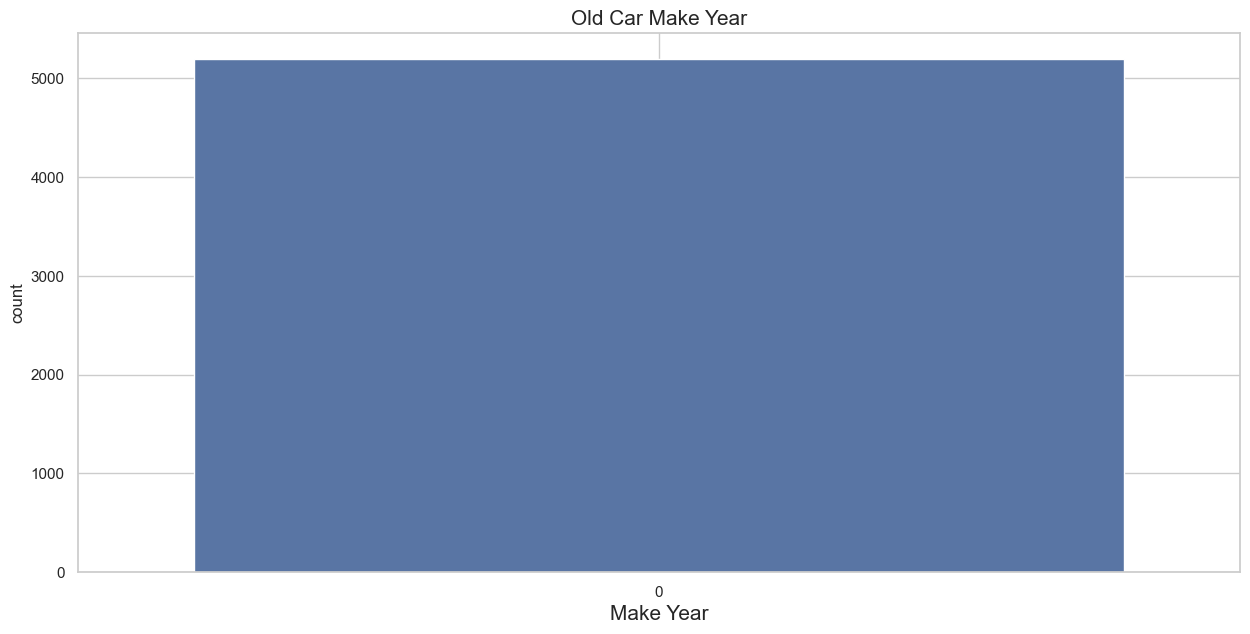

In [438]:
# Plot for Make Year

plt.figure(figsize= (15,7))
sns.countplot(df['Make_Year'])
plt.xlabel('Make Year', fontsize=15)
plt.title('Old Car Make Year', fontsize= 15)
plt.grid(True)
plt.show()

Observations:
- The oldest car we have for sale is one one car which was have make year 1995.  
- People are also selling their New cars which is having make year 2021.  
- Maximum cars we have from 2015 - 2018 Make year. 

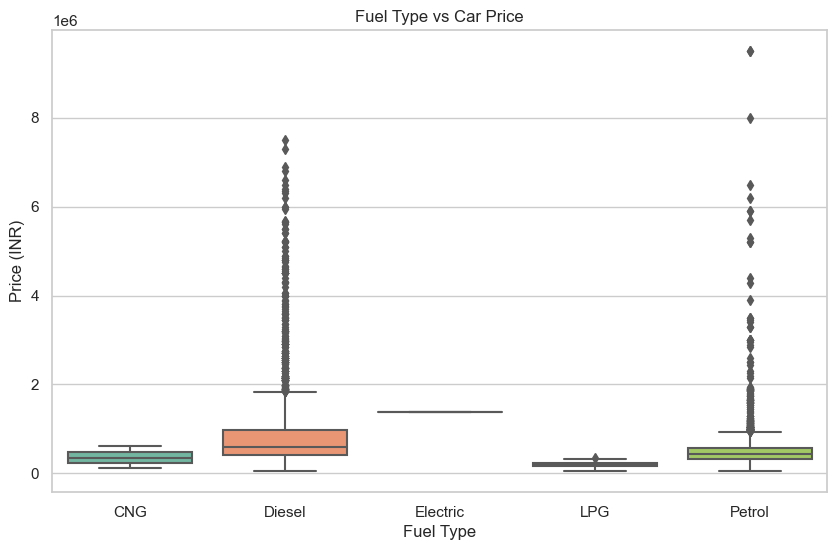

In [439]:
# Fuel Type Vs Price

plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel', y='Price', data=df, palette='Set2')
plt.title('Fuel Type vs Car Price')
plt.xlabel('Fuel Type')
plt.ylabel('Price (INR)')
plt.show()


Observations:
- The median price for petrol cars is significantly higher than other fuel types.
- Diesel cars have a wider range of prices compared to other fuel types.
- Electric, CNG, LPG, and Unknown fuel types have fewer data points and a narrower price range.
- The median price for petrol cars is significantly higher than other fuel types, suggesting that petrol cars are generally more expensive.
Generally, the boxplot reveals that fuel type is a significant factor influencing car prices, with petrol cars generally being more expensive than other fuel types.

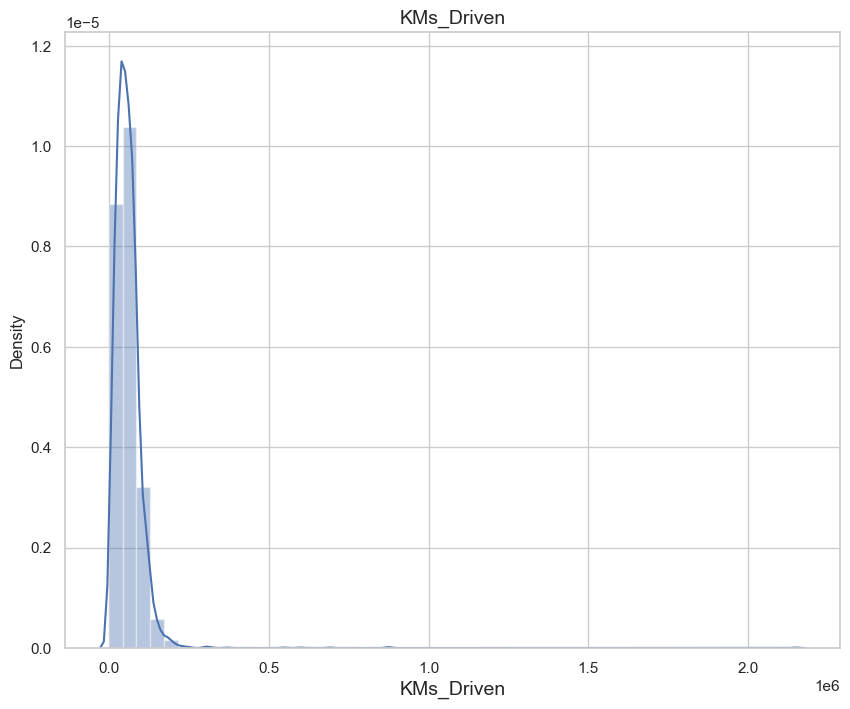

In [440]:
# KMs Driven

plt.figure(figsize=(10,8))
sns.distplot(df['KMs_Driven'])
plt.xlabel('KMs_Driven', fontsize=14)
plt.title('KMs_Driven', fontsize= 14)
plt.grid(True)
plt.show()

Observations:
- We can see KMs_Driven having highly positive skewness.  

In [441]:
df['KMs_Driven'].describe()

count      5197.0
mean      59076.1
std       50058.4
min         201.0
25%       32492.0
50%       54000.0
75%       77038.0
max     2150000.0
Name: KMs_Driven, dtype: float64

- We can see maximum values as 2150000.00 Kms due to this values we can see skewness in the data.  
- 75 Percentage of the cars are 77038.00 Kms driven. 
- The car which is having very less kms values 201.0 Kms, Is the newest car on for sale. 

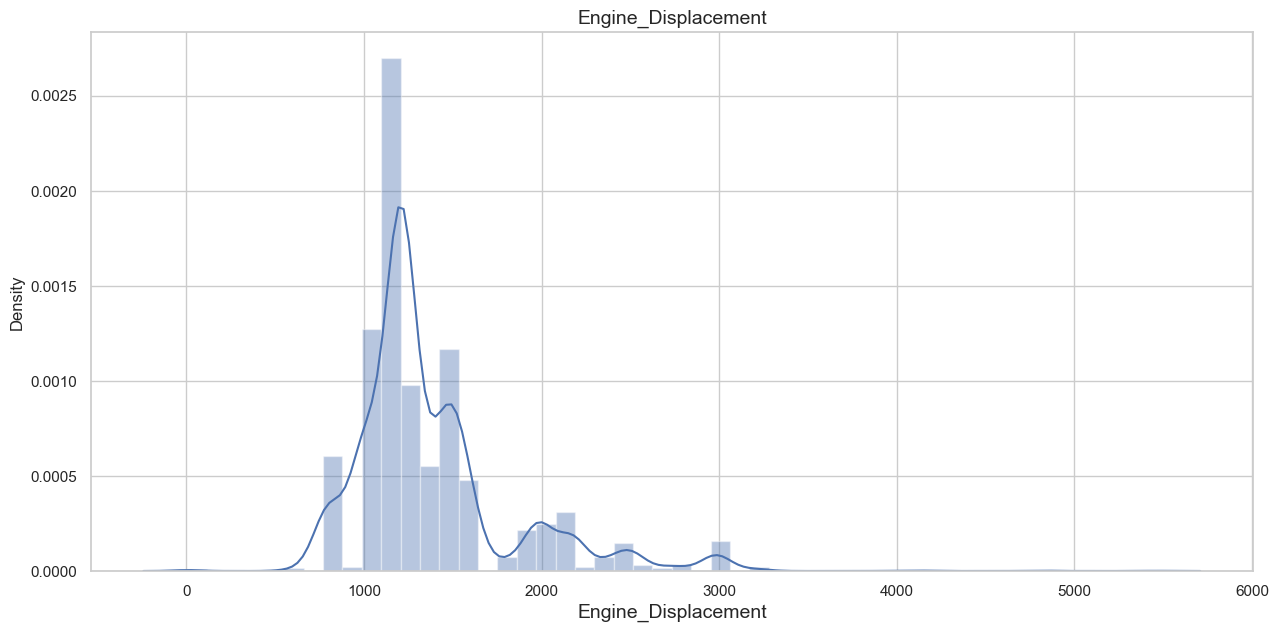

In [442]:
# Engine Displacement

plt.figure(figsize= (15,7))
sns.distplot(df['Engine_Displacement'])
plt.xlabel('Engine_Displacement', fontsize=14)
plt.title('Engine_Displacement', fontsize= 14)
plt.grid(True)
plt.show()

Observations:
- Engine_Displacement is having positive skewness.   
- Most of the cars having displacemnet in the range 1000-2000 CC.

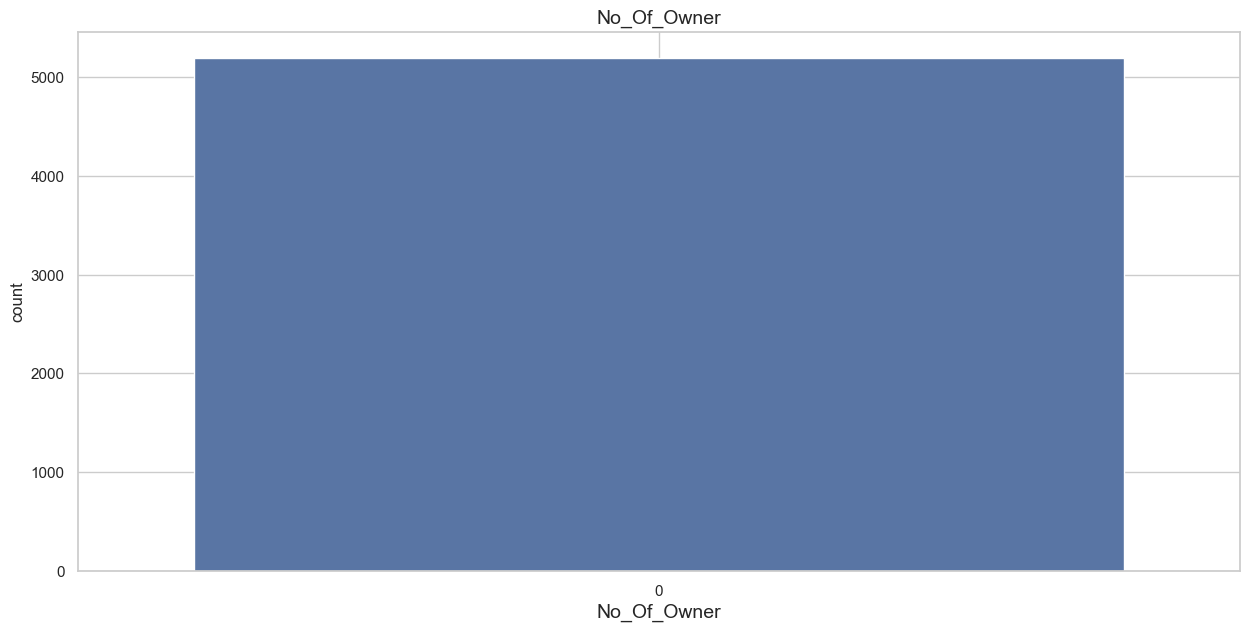

In [443]:
# Number of Owners

# Remove trailing spaces and convert to numeric representation
df['No_Of_Owner'] = df['No_Of_Owner'].str.strip().map({'First': 1, 'Second': 2, 'Third': 3, 'Fourth': 4, 'Test Drive Car': 5})

# Plot the countplot
plt.figure(figsize=(15, 7))
sns.countplot(df['No_Of_Owner'])
plt.xlabel('No_Of_Owner', fontsize=14)
plt.title('No_Of_Owner', fontsize=14)
plt.grid(True)
plt.show()


Observations:
- The countplot shows that the majority of cars(more than 4,000) in the dataset have only had one owner. This suggests that a significant portion of the cars are relatively new or have been well-maintained by their original owners.
- Cars with a single owner often have a better maintenance history, which can impact their reliability and resale value.
- The high number of single-owner cars might indicate a preference for newer or well-maintained vehicles among buyers.:
- Very less car are of second and third type.  
- Here we can see very less numbers for 4th & Above and test Drive cars, we can drop these values during feature selection.

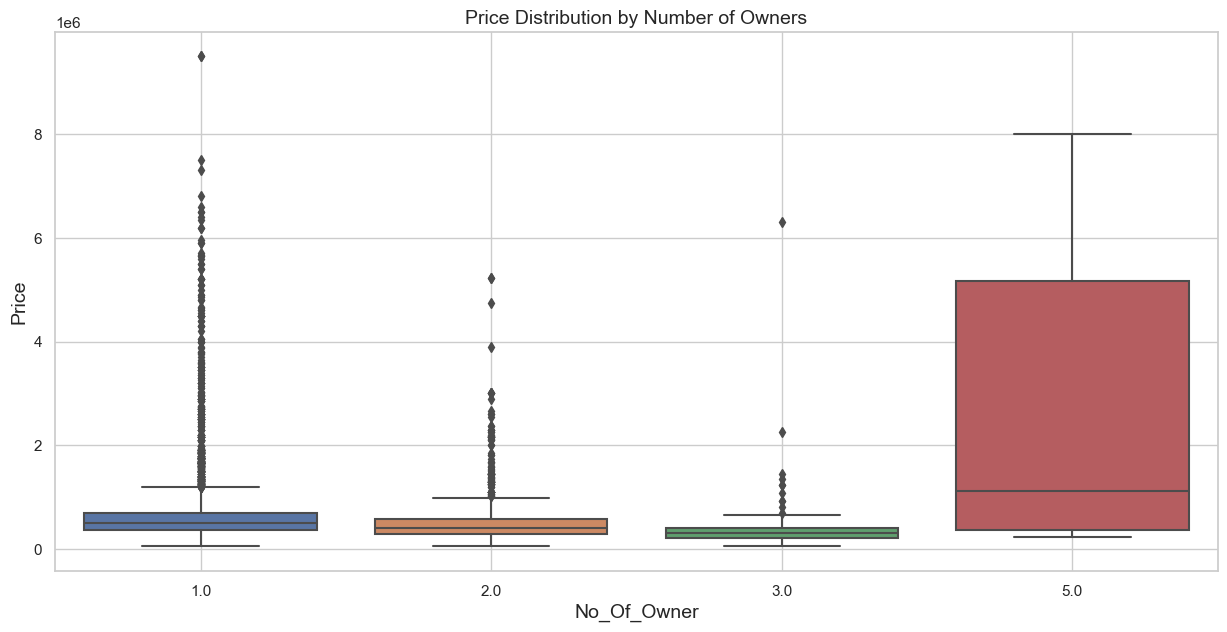

In [444]:
# Boxplot: 'No_Of_Owner' vs 'Price'

plt.figure(figsize=(15, 7))
sns.boxplot(x='No_Of_Owner', y='Price', data=df)
plt.xlabel('No_Of_Owner', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price Distribution by Number of Owners', fontsize=14)
plt.grid(True)
plt.show()


Observations:
- The number of owners is a significant factor influencing the price of a car. Cars with fewer owners, particularly single-owner cars, are generally more expensive due to factors like better maintenance history, lower mileage, and potentially higher perceived value.

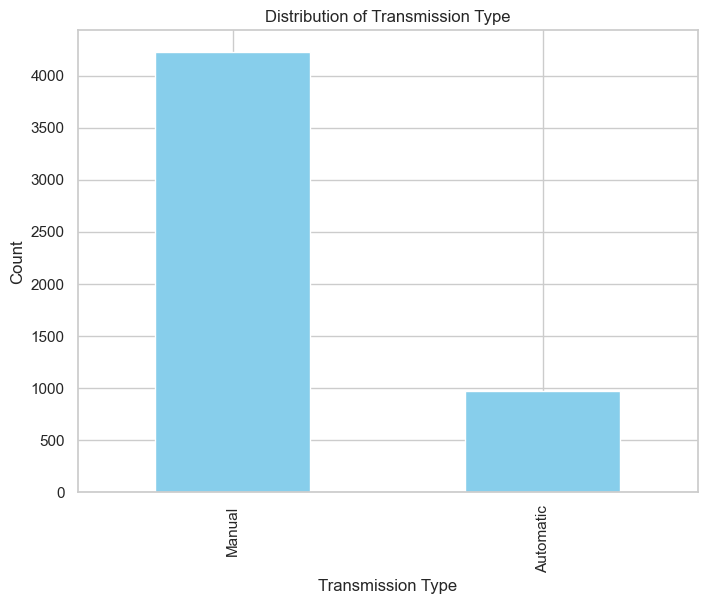

In [445]:
import matplotlib.pyplot as plt

# Count the values for each transmission type
transmission_counts = df['Transmission'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
transmission_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()


Observations:
- Maximum cars having Manual Transmission type,we can say a larger portion of the market prefers manual transmission cars, possibly due to factors like cost, fuel efficiency, or driving preference. We can say people are selling their Manual cars.  

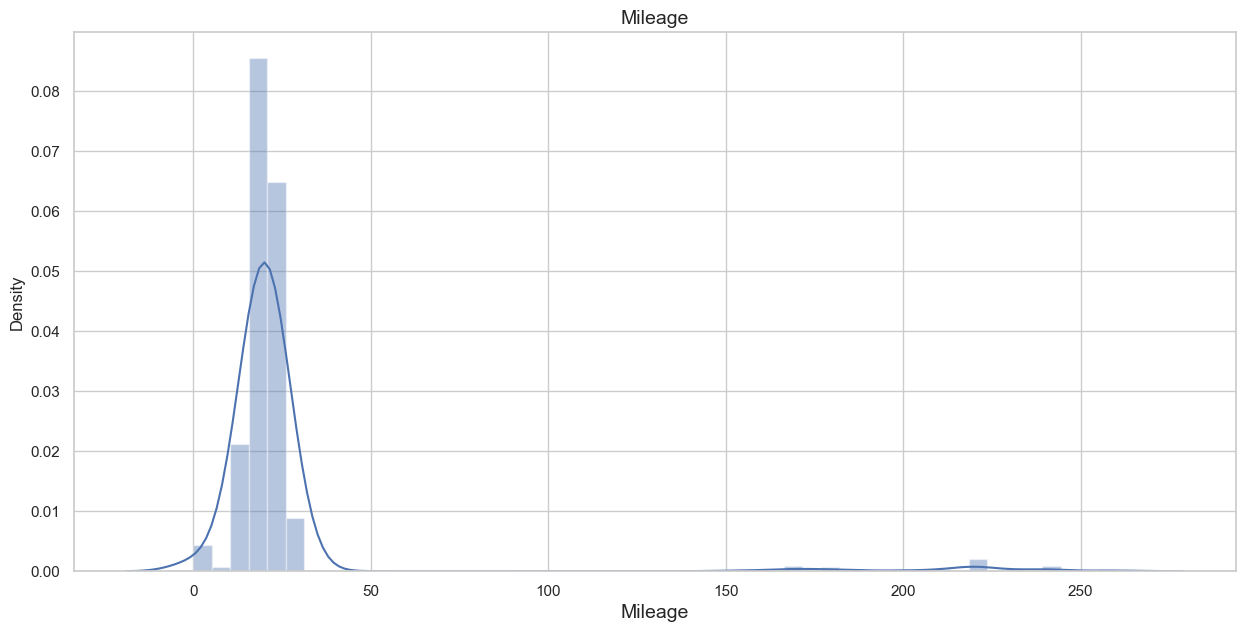

In [446]:
# Mileage

plt.figure(figsize= (15,7))
sns.distplot(df['Mileage'])
plt.xlabel('Mileage', fontsize=14)
plt.title('Mileage', fontsize= 14)
plt.grid(True)
plt.show()

Observations:
- We can see few cars having mileage more than 50 which not possible in old cars, these data are outliers.
- We will Remove such data. 

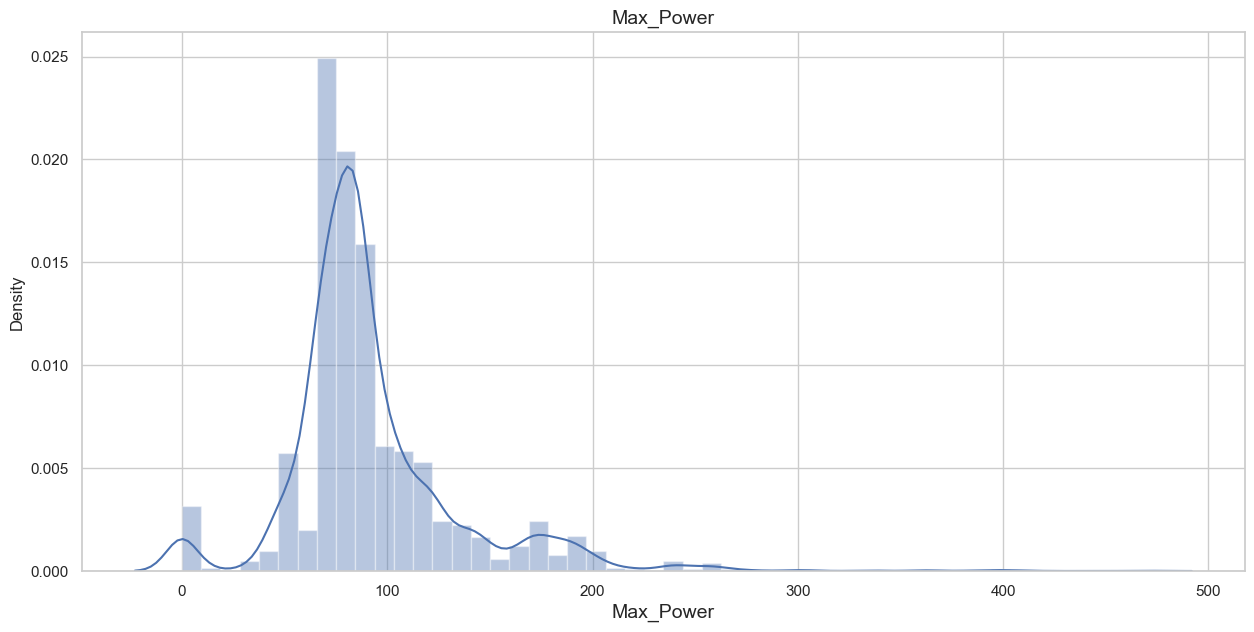

In [447]:
# Max Power

plt.figure(figsize= (15,7))
sns.distplot(df['Max_Power'])
plt.xlabel('Max_Power', fontsize=14)
plt.title('Max_Power', fontsize= 14)
plt.grid(True)
plt.show()

Observations:
- Data is slightly positive skewed.   
- Power almost zero or near to zero  not possible. 

In [448]:
# Torque

df['Torque']=df['Torque'].astype('float32')
pd.set_option('display.float_format', lambda x: '%.1f' % x)
df['Torque']=df['Torque'].round(2)
df['Torque'].head(5)

0   190.0
1   160.0
2   200.0
3   220.0
4    22.4
Name: Torque, dtype: float32

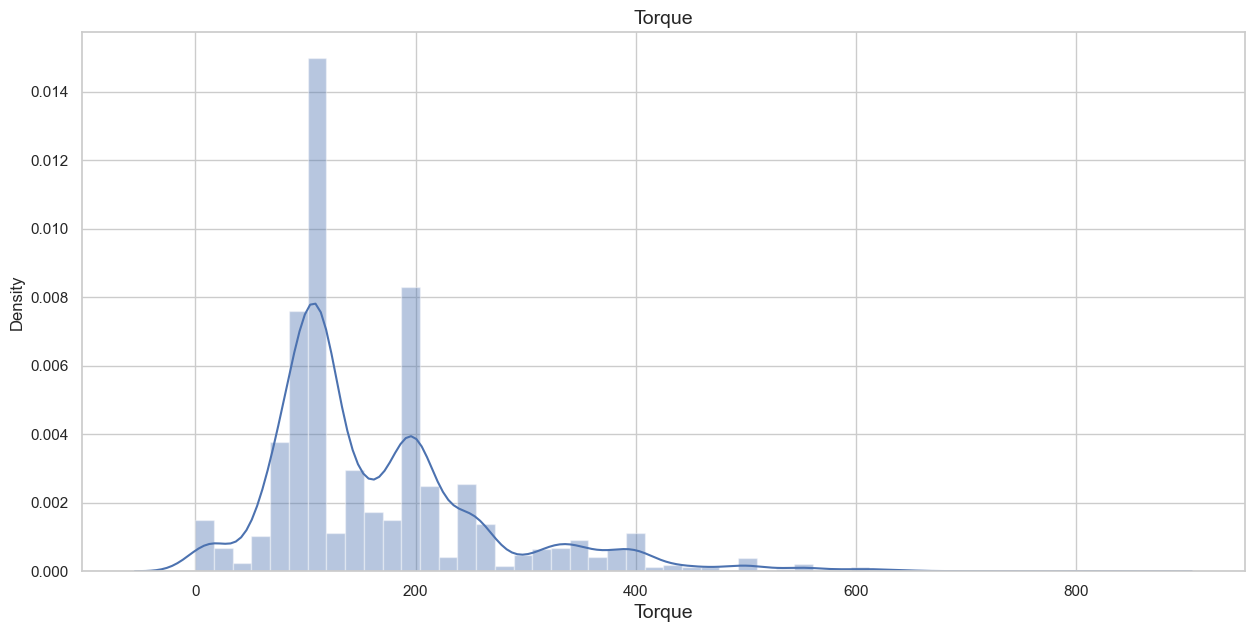

In [449]:
plt.figure(figsize= (15,7))
sns.distplot(df['Torque'])
plt.xlabel('Torque', fontsize=14)
plt.title('Torque', fontsize= 14)
plt.grid(True)
plt.show()

Observations:
- Torque having skewness maximum density lie between 100-200

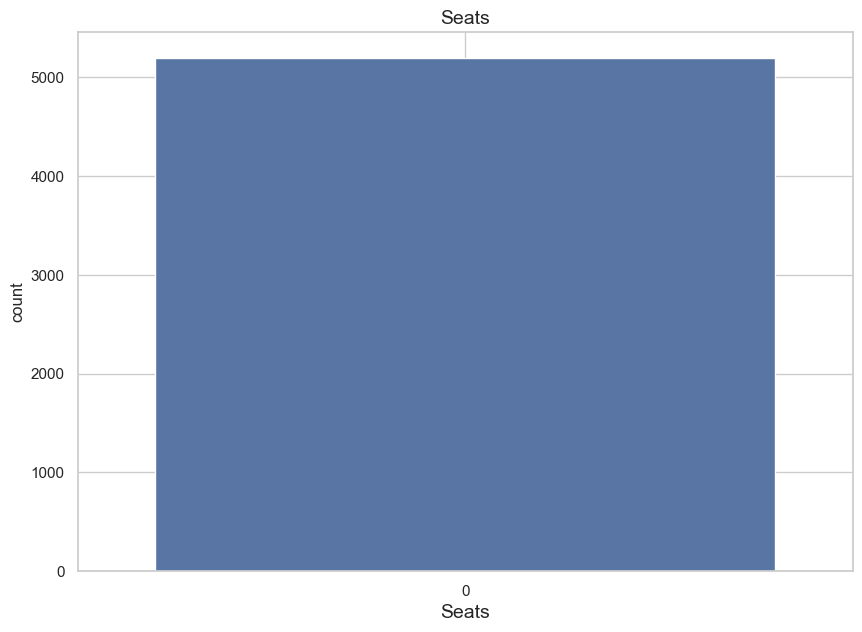

In [450]:
# Seats

plt.figure(figsize= (10,7))
sns.countplot(df['Seats'])
plt.xlabel('Seats', fontsize=14)
plt.title('Seats', fontsize= 14)
plt.grid(True)
plt.show()

Observations:
- Majority of the Cars listed are Five seater indicating a strong preference.
- There's a limited range of seat configurations, with most cars falling within the 2-9 seat range.
- Cars with 2, 3, 4, 6, 8, and 9 seats are relatively less common, suggesting that these configurations are less popular in the market

In [451]:
df['Color'] = df['Color'].astype('category')


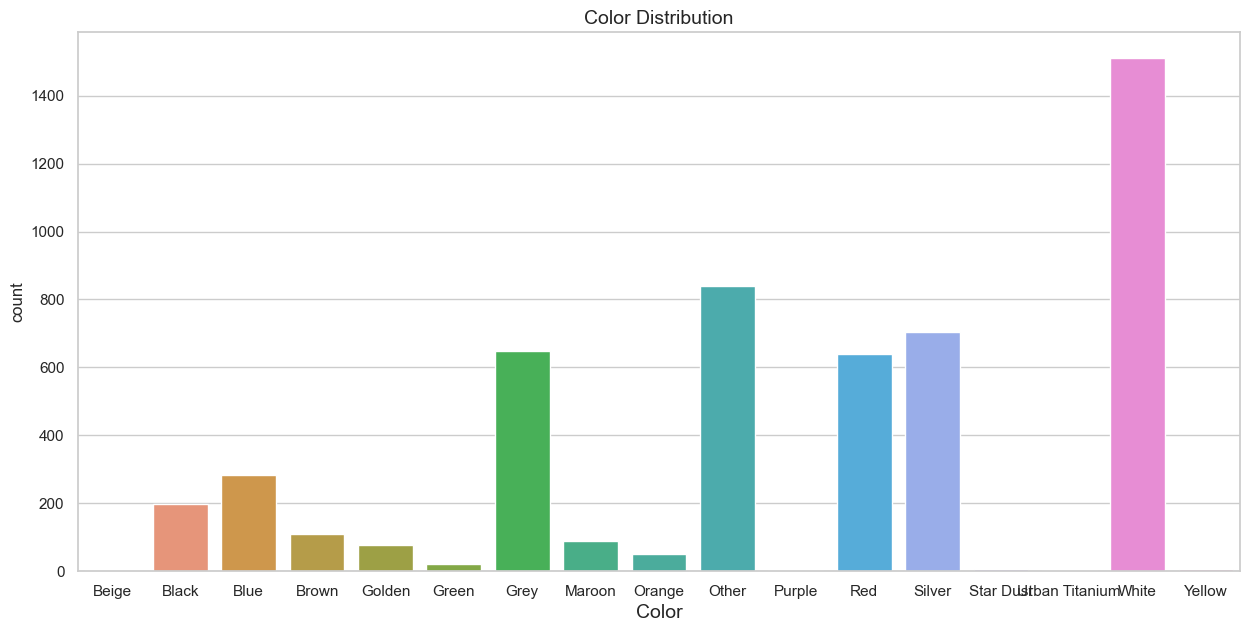

In [452]:
# Color

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
sns.countplot(x='Color', data=df)
plt.xlabel('Color', fontsize=14)
plt.title('Color Distribution', fontsize=14)
plt.show()



In [453]:
df['Color'].value_counts().head(5)

White     1511
Other      839
Silver     703
Grey       648
Red        639
Name: Color, dtype: int64

Observations:
- White has the maximum count  indicating a preference for neutral and classic colors.
- Black, Silver and Grey are also quite popular, suggesting a preference for sophisticated and sleek looks.
- Colors like Green, Orange, Purple, Maroon, and Brown are less common, indicating a lower preference for these colors.
- Colors like Star Dust, Urban Titanium, and Yellow are even less common, suggesting that these are niche choices or limited edition colors.Here 

In [454]:
df['Color'].replace(to_replace=['Green','Star Dust', 'Yellow', 'Purple','Urban Titanium','Beige'],
                   value= 'White', inplace= True)

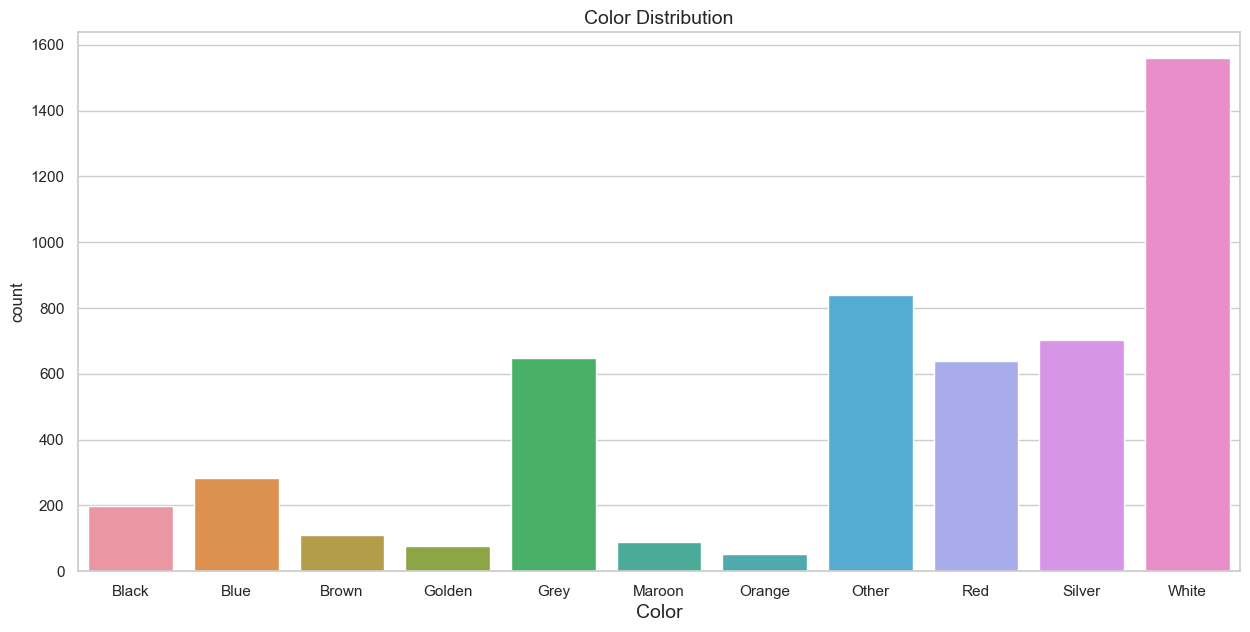

In [455]:
plt.figure(figsize=(15,7))
sns.countplot(x='Color', data=df)
plt.xlabel('Color', fontsize=14)
plt.title('Color Distribution', fontsize=14)
plt.show()


In [456]:
df['Drive_Type'] = df['Drive_Type'].astype(str)  # Ensure 'Drive_Type' is a string


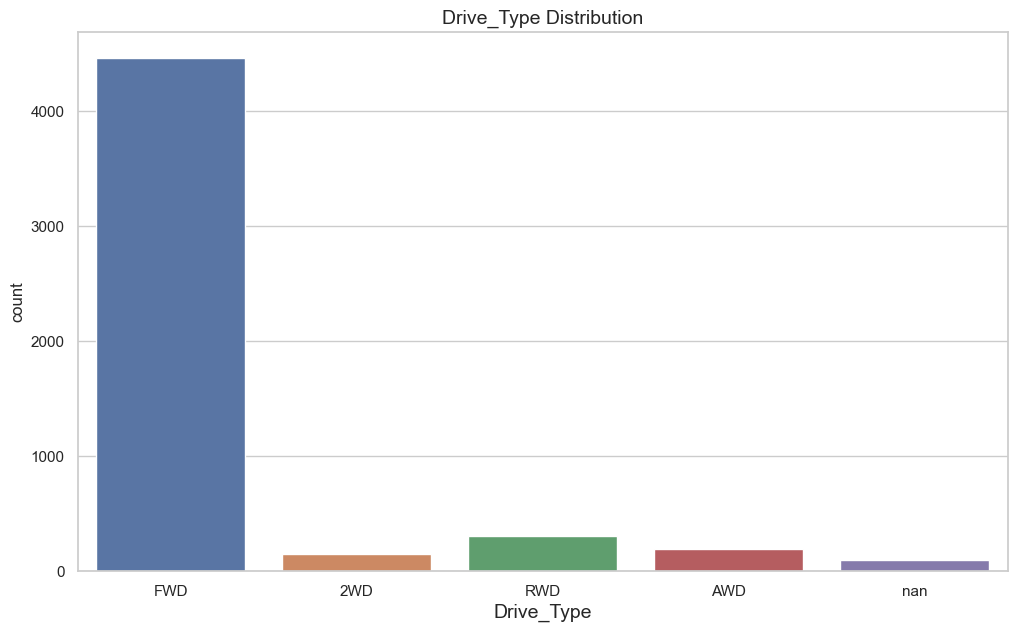

In [457]:
# Drive Type

plt.figure(figsize=(12,7))
sns.countplot(x='Drive_Type', data=df)
plt.xlabel('Drive_Type', fontsize=14)
plt.title('Drive_Type Distribution', fontsize=14)
plt.show()


Observations:
- We can see most of the cars are Front wheel Drive Type. 

In [458]:
df['Steering_Type'] = df['Steering_Type'].astype(str)  # Convert to string if not already


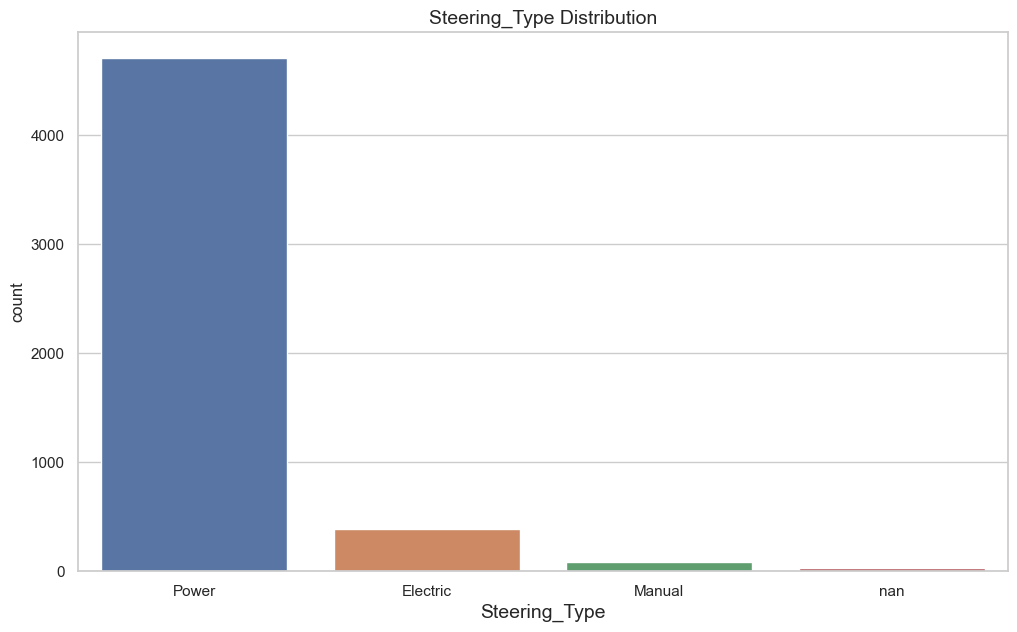

In [459]:
# Steering Type

plt.figure(figsize=(12,7))
sns.countplot(x='Steering_Type', data=df)
plt.xlabel('Steering_Type', fontsize=14)
plt.title('Steering_Type Distribution', fontsize=14)
plt.show()


Observations;
- Majority of the cars are having Power Steering Type. 

In [460]:
df['Front_Brake_Type'] = df['Front_Brake_Type'].astype(str)


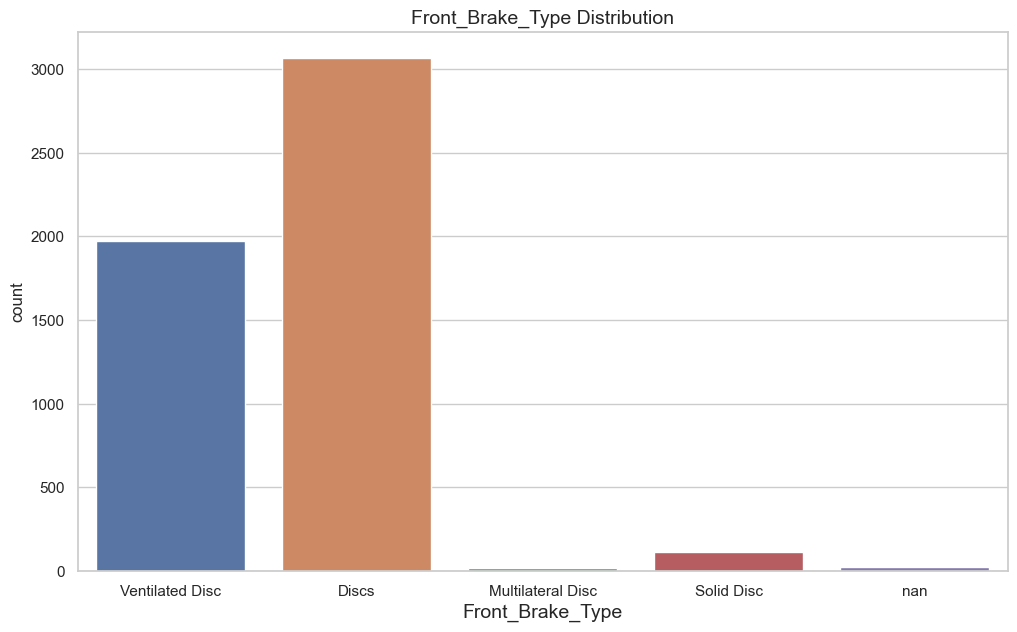

In [461]:
# Front Brake Type

plt.figure(figsize=(12,7))
sns.countplot(x='Front_Brake_Type', data=df)
plt.xlabel('Front_Brake_Type', fontsize=14)
plt.title('Front_Brake_Type Distribution', fontsize=14)
plt.show()


Observations:
- Discs brakes are the most common type of front brake used in cars, with Ventilated Disc being the most frequent variant.
- Multilateral Disc and Solid Disc brakes are significantly less common, suggesting that they are used in specific car models or segments.

In [462]:
df['Rear_Brake_Type'] = df['Rear_Brake_Type'].astype(str)


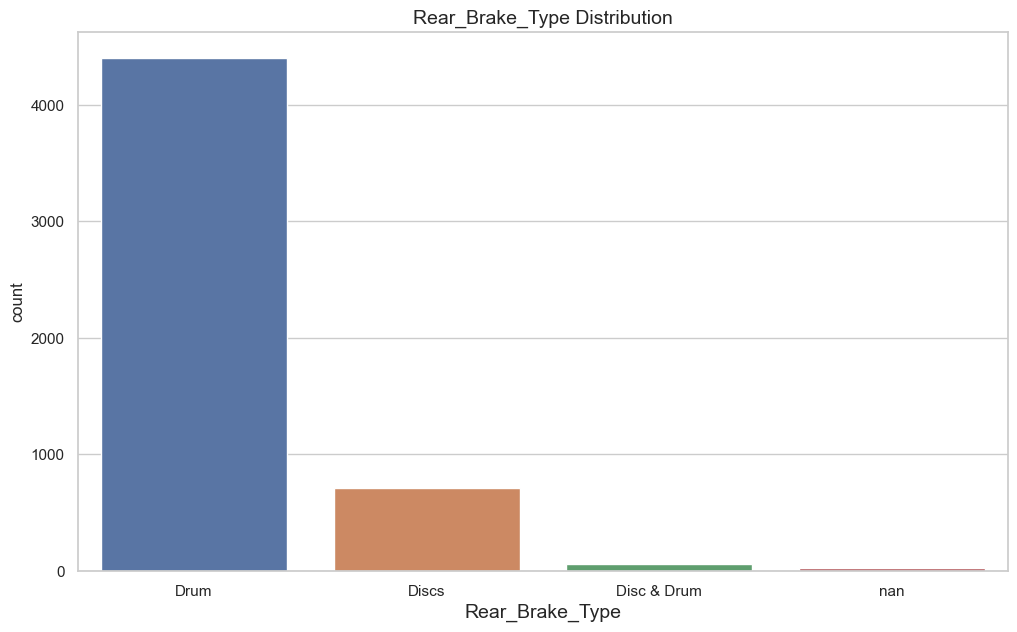

In [463]:
# Rear Brake Type

plt.figure(figsize=(12,7))
sns.countplot(x='Rear_Brake_Type', data=df)
plt.xlabel('Rear_Brake_Type', fontsize=14)
plt.title('Rear_Brake_Type Distribution', fontsize=14)
plt.show()


Observations:
- Drum brakes are the most common type of rear brake used in cars.
- Disc brakes and Disc & Drum combinations are less common, suggesting that they are used in specific car models or segments.
 

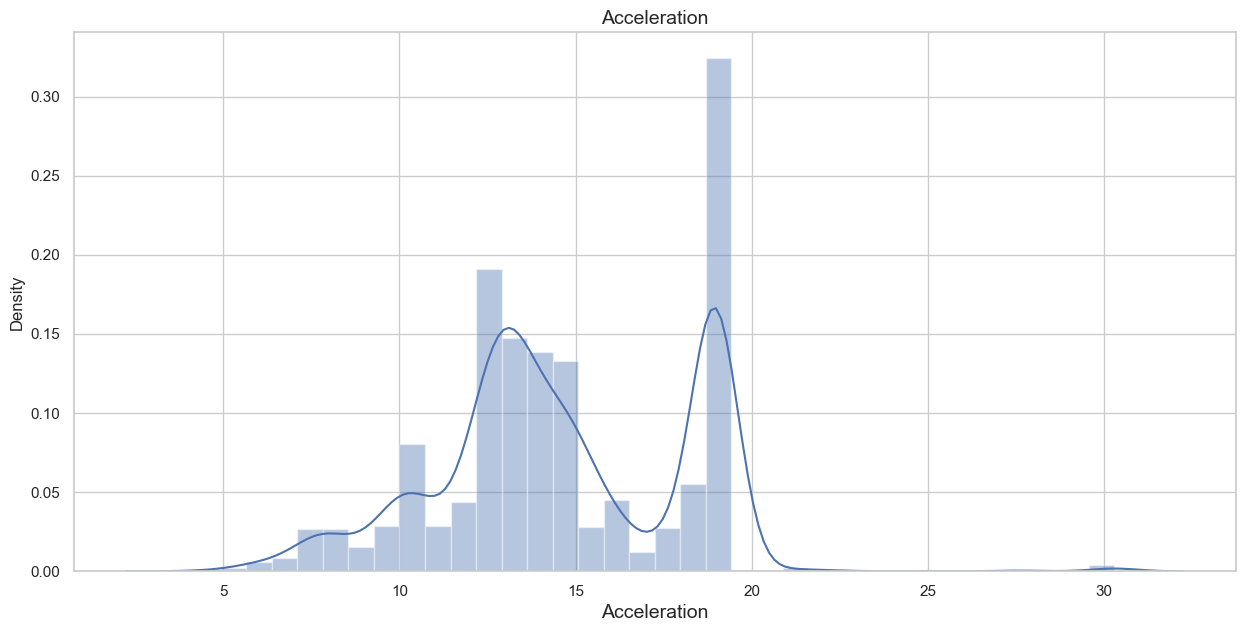

In [464]:
# Acceleration

plt.figure(figsize= (15,7))
sns.distplot(df['Acceleration'])
plt.xlabel('Acceleration', fontsize=14)
plt.title('Acceleration', fontsize= 14)
plt.grid(True)
plt.show()

Observations:
- The first peak is centered around an acceleration value of 15, indicating a cluster of cars with moderate acceleration.
- The second peak is centered around an acceleration value of 20, suggesting a cluster of cars with higher acceleration capabilities.
- The distribution has a long tail towards higher acceleration values, indicating the presence of high-performance cars.
- There are less cars having accelertion less than 10.

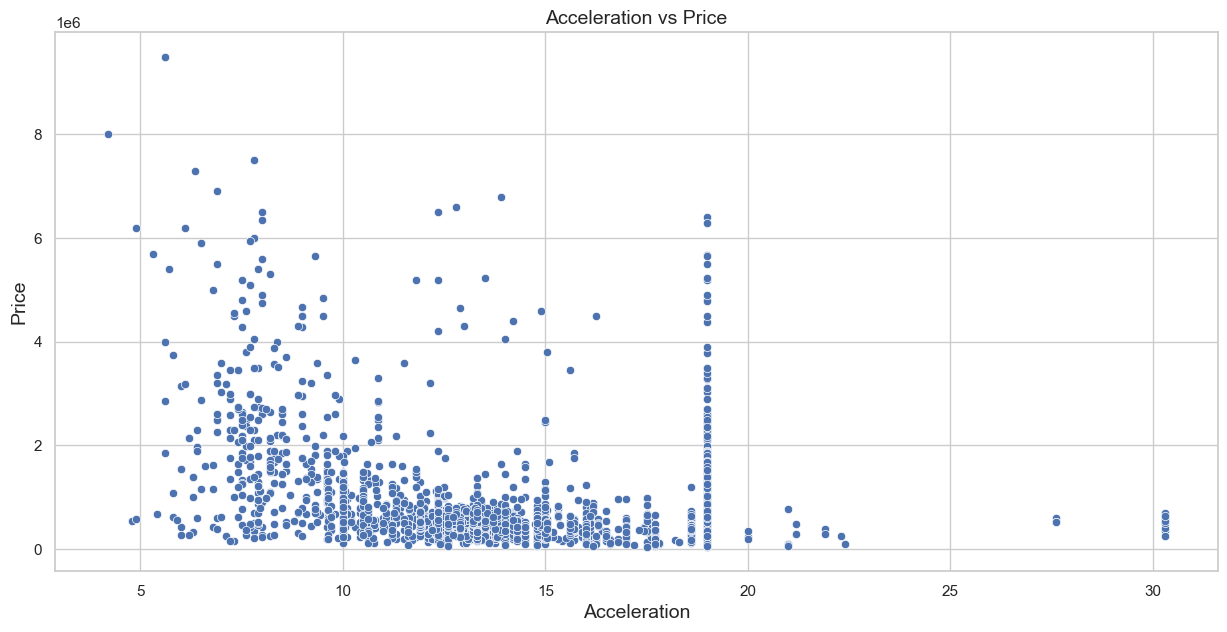

In [465]:
# Acceleration vs Price scatter plot
plt.figure(figsize=(15,7))
sns.scatterplot(x='Acceleration', y='Price', data=df)
plt.xlabel('Acceleration', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Acceleration vs Price', fontsize=14)
plt.grid(True)
plt.show()


Observations:
- There appears to be a weak positive correlation between acceleration and price suggesting that, in general, cars with higher acceleration tend to be more expensive.
- The data points seem to cluster in certain regions of the plot, indicating that cars with specific acceleration ranges are more common.
- Cars with similar acceleration values can have significantly different prices, suggesting that other factors like brand, features, and model year also influence the price.

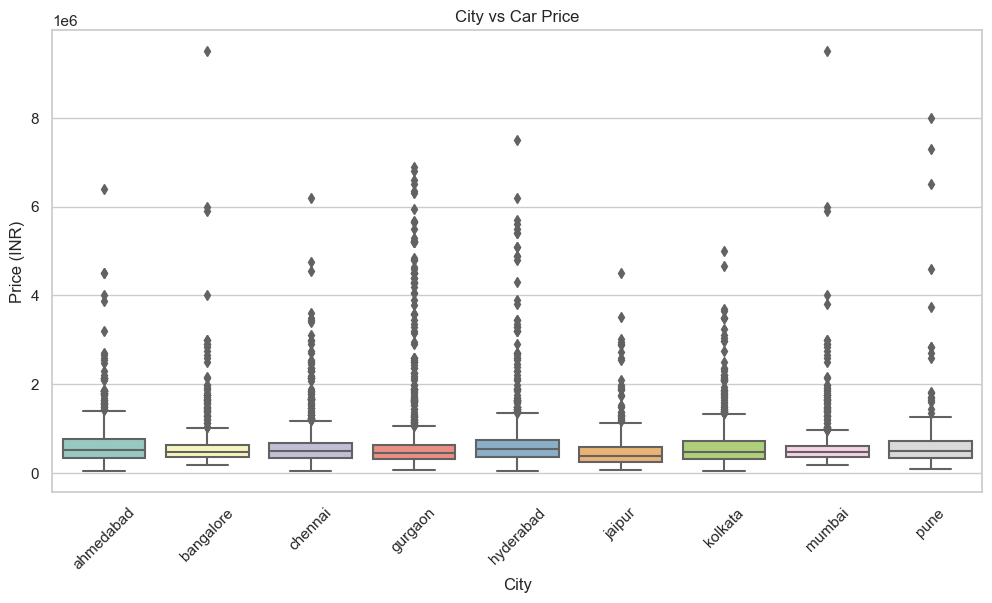

In [466]:
# Price by Location

plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Price', data=df, palette='Set3')
plt.title('City vs Car Price')
plt.xlabel('City')
plt.ylabel('Price (INR)')
plt.xticks(rotation=45)
plt.show()


Observations:
- Cities like Mumbai and Delhi appear to have a wider range of prices, including some very expensive cars.
- Cities like Ahmedabad and Pune have a more concentrated price range, with fewer outliers.
- Understanding the price distribution in different cities can help car manufacturers and dealerships tailor their product offerings to specific regions.

In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197 entries, 0 to 5196
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Brand                5197 non-null   category
 1   Make_Year            5197 non-null   int64   
 2   Fuel                 5197 non-null   category
 3   KMs_Driven           5197 non-null   int64   
 4   Engine_Displacement  5197 non-null   int64   
 5   No_Of_Owner          5183 non-null   float64 
 6   Transmission         5197 non-null   category
 7   Mileage              5197 non-null   float64 
 8   Max_Power            5197 non-null   float64 
 9   Torque               5197 non-null   float32 
 10  Seats                5197 non-null   int64   
 11  Color                5197 non-null   category
 12  Gear_Box             5197 non-null   int64   
 13  Drive_Type           5197 non-null   object  
 14  Steering_Type        5197 non-null   object  
 15  Front_Brake_Type     

### Handling Missing Values

In [468]:
df.isnull().sum()

Brand                    0
Make_Year                0
Fuel                     0
KMs_Driven               0
Engine_Displacement      0
No_Of_Owner             14
Transmission             0
Mileage                  0
Max_Power                0
Torque                   0
Seats                    0
Color                    0
Gear_Box                 0
Drive_Type               0
Steering_Type            0
Front_Brake_Type         0
Rear_Brake_Type          0
Acceleration           537
Price                    0
City                     0
dtype: int64

Observations:
- We have 537 null values which is maximum in Acceleration column,
- 24 null values in Rear_Brake_Type and Front_Brake_Type  
- 25 null values Steering_Type
- 93 null values in Drive_Type 
- 14 null values in No_of_Owners.

In [469]:
df['Drive_Type'].value_counts()

FWD    4466
RWD     302
AWD     187
2WD     149
nan      93
Name: Drive_Type, dtype: int64

- Here we can see FWD is higest occuring value, we will replace all the null in Drive type with FWD.

In [470]:
df['Drive_Type'].fillna('FWD', inplace=True)
df.isnull().sum()

Brand                    0
Make_Year                0
Fuel                     0
KMs_Driven               0
Engine_Displacement      0
No_Of_Owner             14
Transmission             0
Mileage                  0
Max_Power                0
Torque                   0
Seats                    0
Color                    0
Gear_Box                 0
Drive_Type               0
Steering_Type            0
Front_Brake_Type         0
Rear_Brake_Type          0
Acceleration           537
Price                    0
City                     0
dtype: int64

In [471]:
df['Steering_Type'].value_counts()

Power       4712
Electric     381
Manual        79
nan           25
Name: Steering_Type, dtype: int64

- Here we can see Power type is higest occuring value, we will replace all the null with Power.

In [472]:
df['Steering_Type'].fillna('Power', inplace=True)
df.isnull().sum()

Brand                    0
Make_Year                0
Fuel                     0
KMs_Driven               0
Engine_Displacement      0
No_Of_Owner             14
Transmission             0
Mileage                  0
Max_Power                0
Torque                   0
Seats                    0
Color                    0
Gear_Box                 0
Drive_Type               0
Steering_Type            0
Front_Brake_Type         0
Rear_Brake_Type          0
Acceleration           537
Price                    0
City                     0
dtype: int64

In [473]:
df['Front_Brake_Type'].value_counts()

Discs                3069
Ventilated Disc      1970
Solid Disc            115
nan                    24
Multilateral Disc      19
Name: Front_Brake_Type, dtype: int64

- Here we can see Power type is Discs occuring value, we will replace all the null with Discs.

In [474]:
df['Front_Brake_Type'].fillna('Discs', inplace=True)
df.isnull().sum()

Brand                    0
Make_Year                0
Fuel                     0
KMs_Driven               0
Engine_Displacement      0
No_Of_Owner             14
Transmission             0
Mileage                  0
Max_Power                0
Torque                   0
Seats                    0
Color                    0
Gear_Box                 0
Drive_Type               0
Steering_Type            0
Front_Brake_Type         0
Rear_Brake_Type          0
Acceleration           537
Price                    0
City                     0
dtype: int64

In [475]:
df['Rear_Brake_Type'].value_counts()

Drum           4404
Discs           709
Disc & Drum      60
nan              24
Name: Rear_Brake_Type, dtype: int64

- Here we can see Power type is Drum occuring value, we will replace all the null with Drum.

In [476]:
df['Rear_Brake_Type'].fillna('Drum', inplace=True)
df.isnull().sum()

Brand                    0
Make_Year                0
Fuel                     0
KMs_Driven               0
Engine_Displacement      0
No_Of_Owner             14
Transmission             0
Mileage                  0
Max_Power                0
Torque                   0
Seats                    0
Color                    0
Gear_Box                 0
Drive_Type               0
Steering_Type            0
Front_Brake_Type         0
Rear_Brake_Type          0
Acceleration           537
Price                    0
City                     0
dtype: int64

In [477]:
df['No_Of_Owner'].value_counts()

1.0    4190
2.0     893
3.0      82
5.0      18
Name: No_Of_Owner, dtype: int64

In [478]:
#df['No_Of_Owner'].fillna('1.0', inplace=True)
df['No_Of_Owner'].fillna(df['No_Of_Owner'].mode()[0], inplace=True)  # Fill with mode
df.isnull().sum()

Brand                    0
Make_Year                0
Fuel                     0
KMs_Driven               0
Engine_Displacement      0
No_Of_Owner              0
Transmission             0
Mileage                  0
Max_Power                0
Torque                   0
Seats                    0
Color                    0
Gear_Box                 0
Drive_Type               0
Steering_Type            0
Front_Brake_Type         0
Rear_Brake_Type          0
Acceleration           537
Price                    0
City                     0
dtype: int64

In [479]:
df['Acceleration'].describe()

count   4660.0
mean      14.6
std        3.5
min        4.2
25%       12.5
50%       14.0
75%       18.6
max       30.3
Name: Acceleration, dtype: float64

in Acceleration column we will fill nan with mean of that column.

In [480]:
#df['Acceleration'].fillna(value =14.6, inplace=True)
df['Acceleration'].fillna(df['Acceleration'].median(), inplace=True) 
df.isnull().sum()

Brand                  0
Make_Year              0
Fuel                   0
KMs_Driven             0
Engine_Displacement    0
No_Of_Owner            0
Transmission           0
Mileage                0
Max_Power              0
Torque                 0
Seats                  0
Color                  0
Gear_Box               0
Drive_Type             0
Steering_Type          0
Front_Brake_Type       0
Rear_Brake_Type        0
Acceleration           0
Price                  0
City                   0
dtype: int64

### Bivariate Analysis

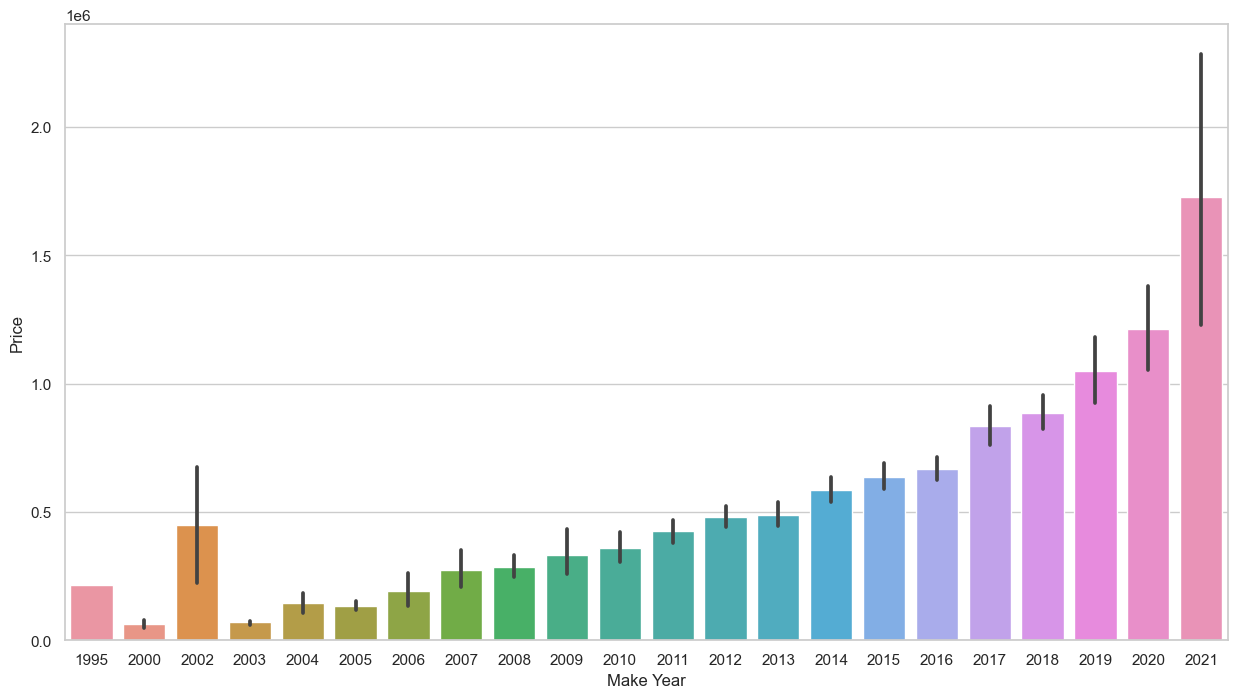

In [481]:
# Lets analyse the Price and Make Year relation

plt.figure(figsize= (15,8))
sns.barplot(x='Make_Year', y='Price', data= df)
plt.xlabel('Make Year', fontsize= 12)
plt.ylabel('Price', fontsize= 12)
plt.show()


- We can see clearly the cars having latest make year are having higher price as compare to older cars.  

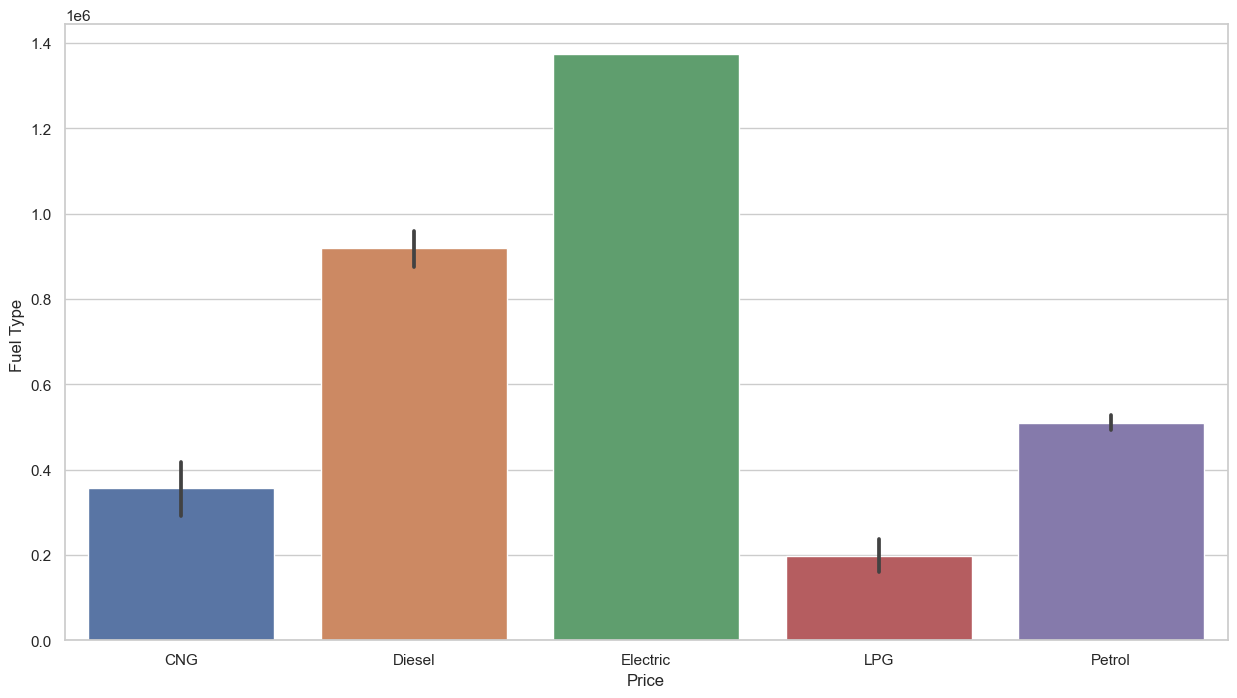

In [482]:
# Lets analyse the Price and Fuel relation

plt.figure(figsize= (15,8))
sns.barplot(x='Fuel', y='Price', data= df)
plt.xlabel('Price', fontsize= 12)
plt.ylabel('Fuel Type ', fontsize= 12)
plt.show()

- From the graph we can see, electric cars are having higher price than other type of fuel type.  
- If we compare between petrol and diesel, diesel cars are having higher price than the petrol cars.  

In [483]:
# Lets check the electric car and price  available in our data
df[df['Fuel']=='Electric']

Brand  Make_Year      Fuel  KMs_Driven  \
2039  Toyota Camry Hybrid       2014  Electric       70000   

      Engine_Displacement  No_Of_Owner Transmission  Mileage  Max_Power  \
2039                 2494          1.0    Automatic     19.2      157.7   

      Torque  Seats Color  Gear_Box Drive_Type Steering_Type Front_Brake_Type  \
2039   213.0      5  Grey         6        FWD         Power  Ventilated Disc   

     Rear_Brake_Type  Acceleration    Price     City  
2039           Discs          10.8  1375000  kolkata

We can see we have only one car which is electric type and having very high price, lets drop this column

In [484]:
df.drop(2039, inplace= True)

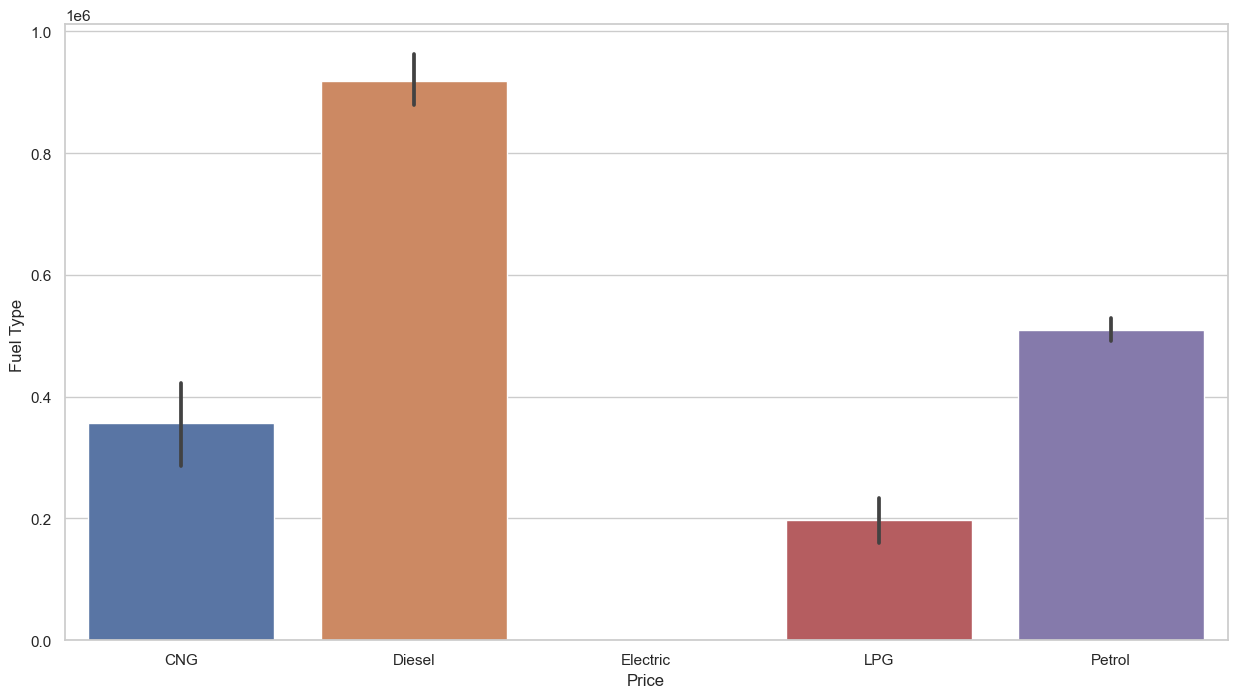

In [485]:
# Lets analyse Fuel again after droping the Electric car

plt.figure(figsize= (15,8))
sns.barplot(x='Fuel', y='Price', data= df)
plt.xlabel('Price', fontsize= 12)
plt.ylabel('Fuel Type ', fontsize= 12)
plt.show()

- Here we can see Diesel Cars are Higher in Price.

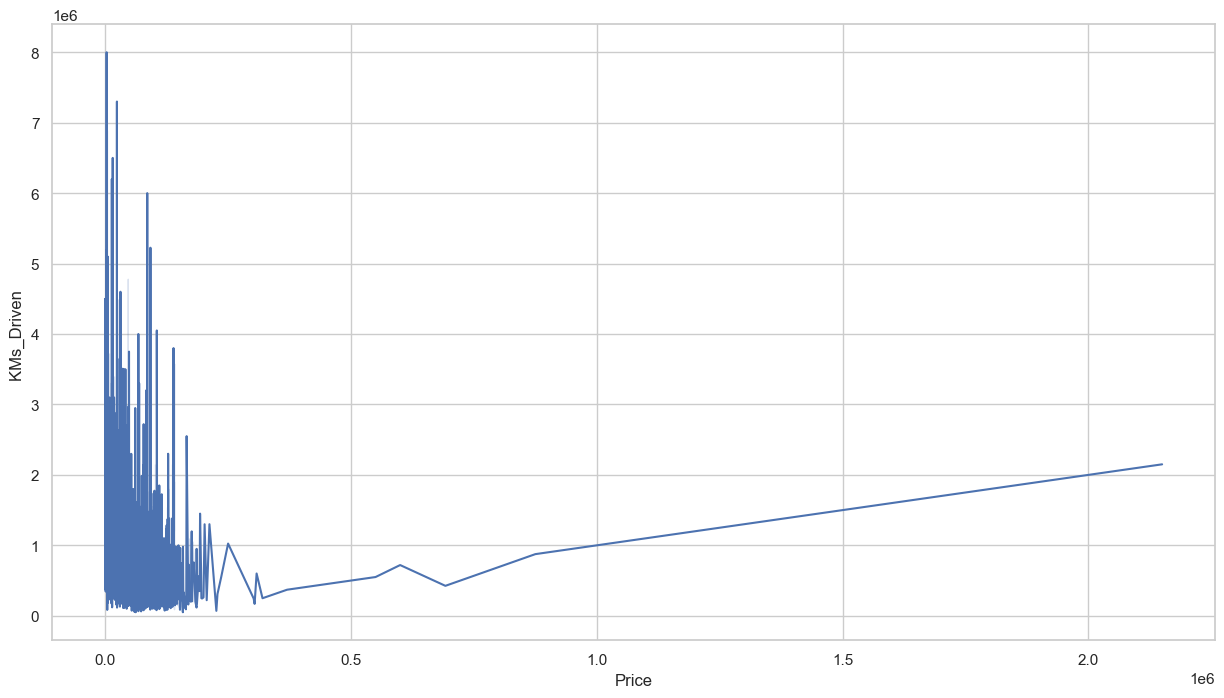

In [486]:
# Lets analyse the Price and Kms_driven relation

plt.figure(figsize= (15,8))
sns.lineplot( y='Price', x='KMs_Driven', data= df)
plt.xlabel('Price', fontsize= 12)
plt.ylabel('KMs_Driven ', fontsize= 12)
plt.show()

- Here We can say Higher the value of KM driven lower the price of the car.  
- Initially when the KMs Driven are high, price lies in range 0.0- 0.5 

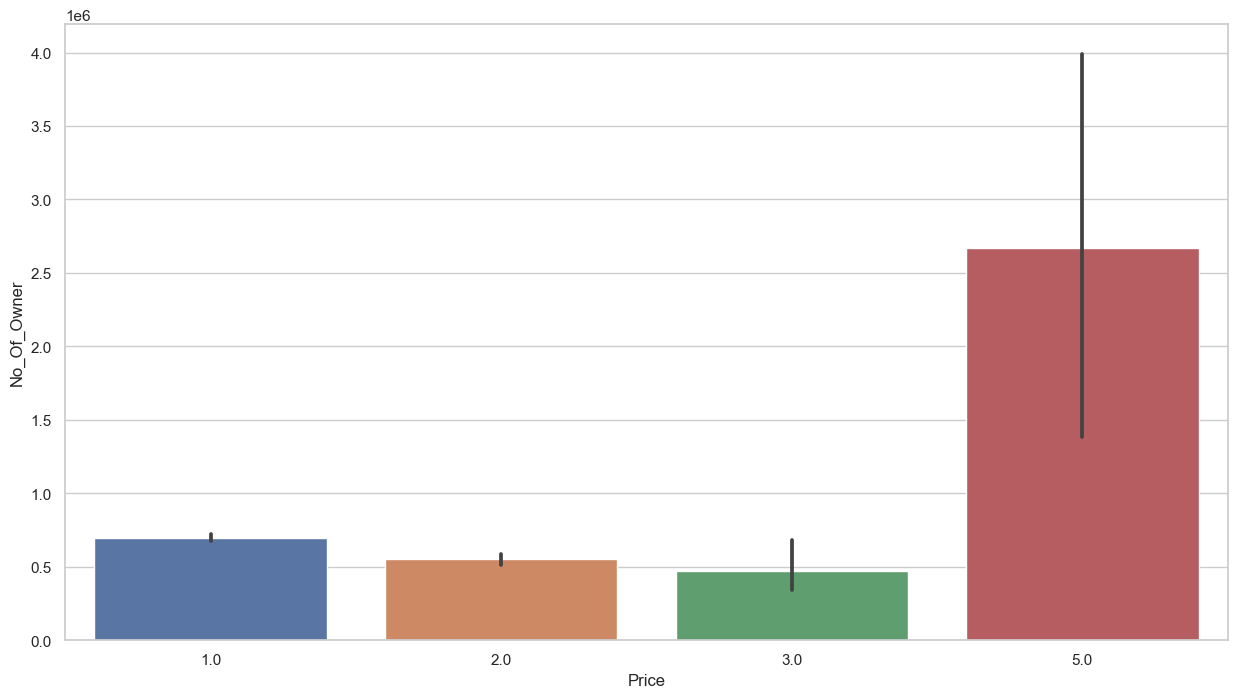

In [487]:
# Lets analyse the Price and No of Owner

plt.figure(figsize= (15,8))
sns.barplot(x='No_Of_Owner', y='Price', data= df)
plt.xlabel('Price', fontsize= 12)
plt.ylabel('No_Of_Owner', fontsize= 12)
plt.show()

- From the above Graph we can say test drive cars are having higher price as compare to other cars.  
- After that First owner cars having higher price as compare to second, third and above owners.

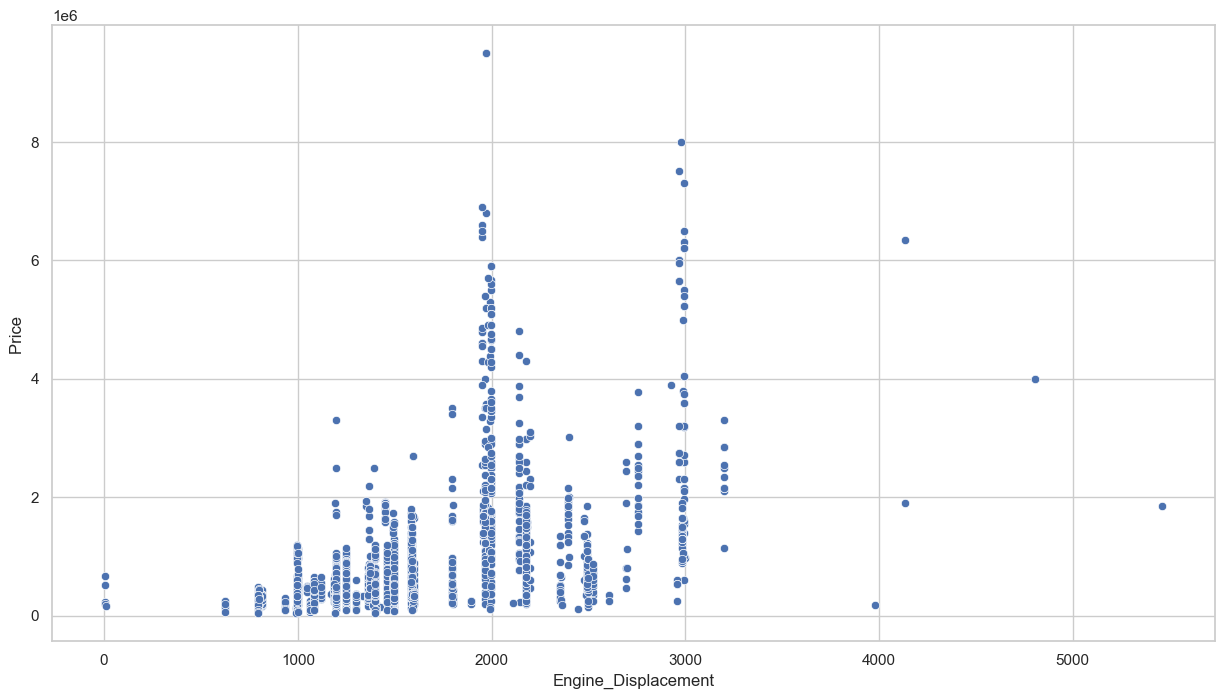

In [488]:
# Lets analyse the Price and Engine_Displacement relation

plt.figure(figsize= (15,8))
sns.scatterplot( y='Price', x='Engine_Displacement', data= df)
plt.xlabel('Engine_Displacement', fontsize= 12)
plt.ylabel('Price ', fontsize= 12)
plt.show()

- We can see cars prices are higher for cars having Engine_Displacement greater than 2000 and equal to 2000 

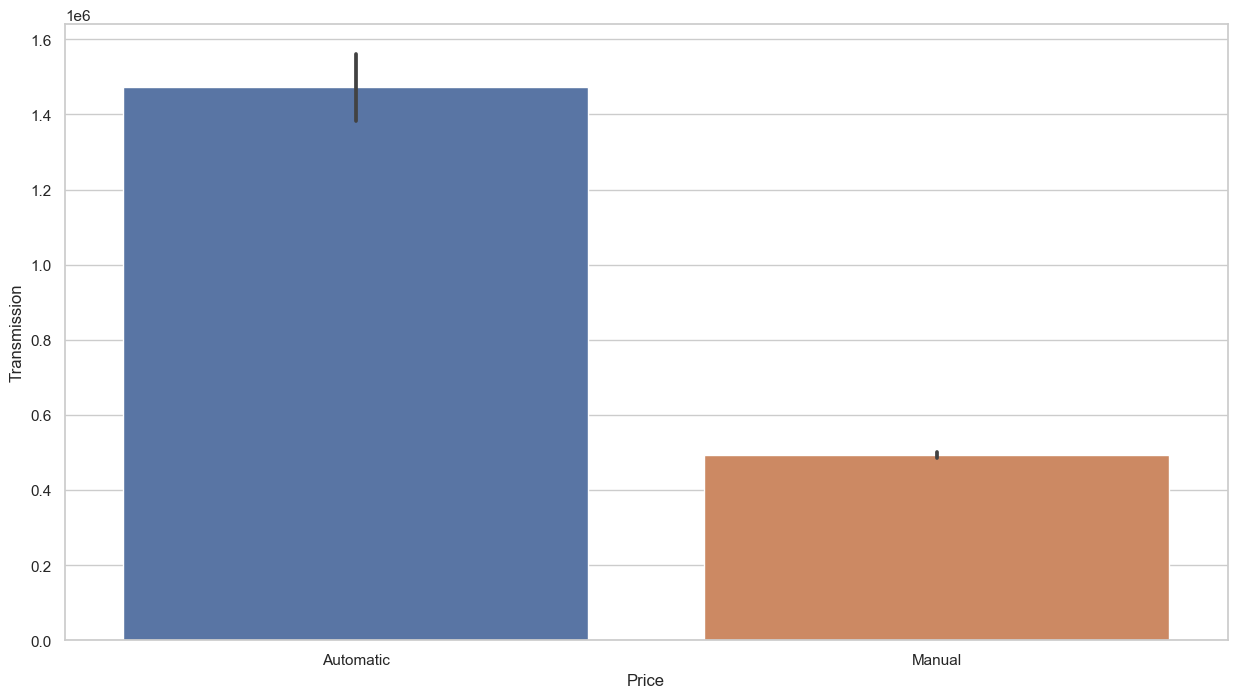

In [489]:
# Lets analyse the Price and Transmission

plt.figure(figsize= (15,8))
sns.barplot(x='Transmission', y='Price', data= df)
plt.xlabel('Price', fontsize= 12)
plt.ylabel('Transmission', fontsize= 12)
plt.show()

- Automatic transmisssion cars have a higher price as compare to Manual. 

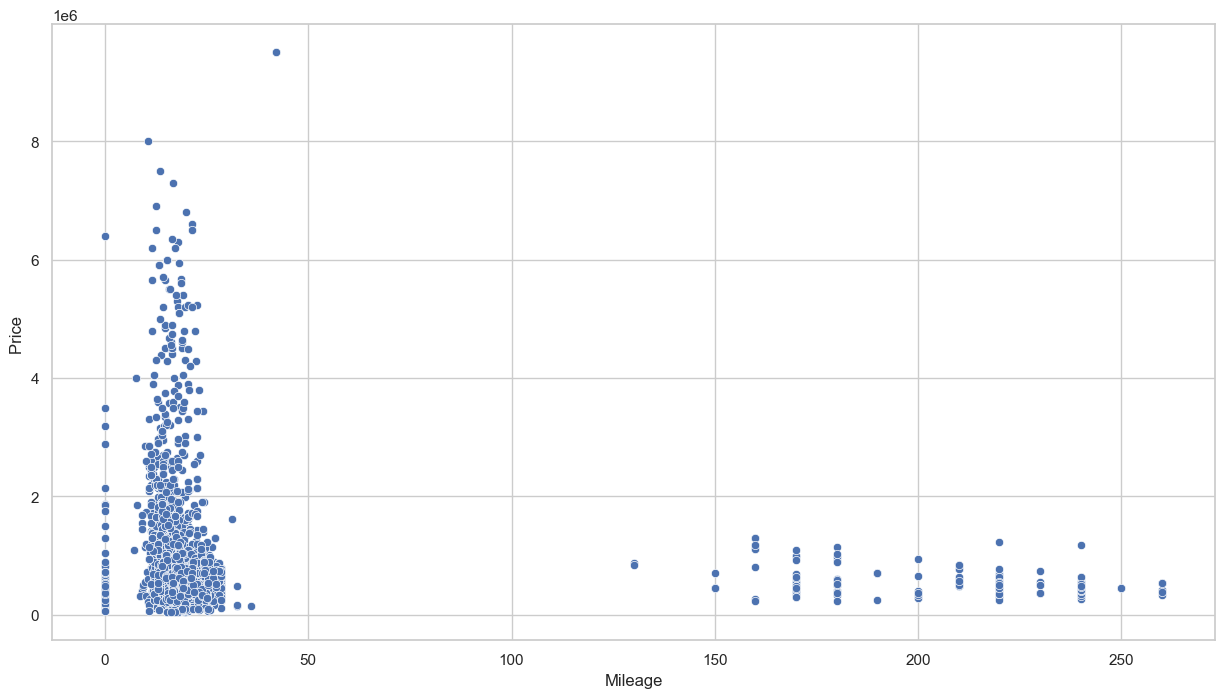

In [490]:
# Lets analyse the Price and Mileage relation

plt.figure(figsize= (15,8))
sns.scatterplot( y='Price', x='Mileage', data= df)
plt.xlabel('Mileage', fontsize= 12)
plt.ylabel('Price ', fontsize= 12)
plt.show()

- There is a weak negative correlation between mileage and price meaning that as the mileage of a car increases, its price tends to decrease.

- Cars with maximum power are higher in price than other cars.

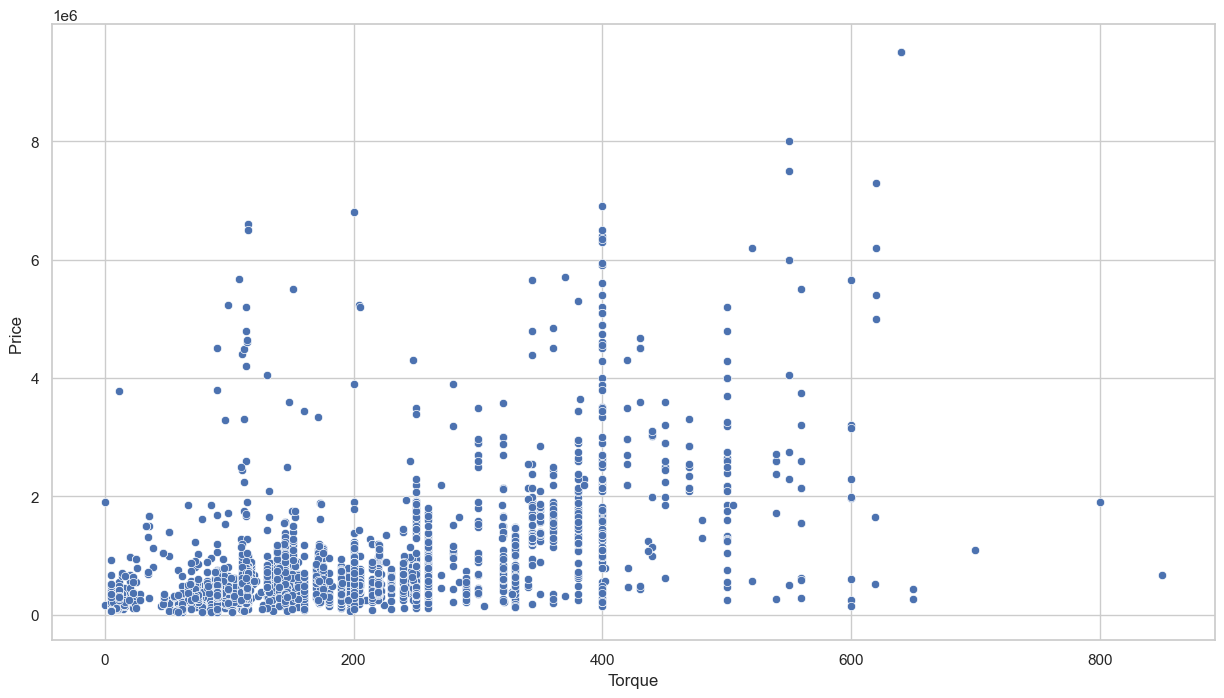

In [491]:
# Lets analyse the Price and Torque relation

plt.figure(figsize= (15,8))
sns.scatterplot( y='Price', x='Torque', data= df)
plt.xlabel('Torque', fontsize= 12)
plt.ylabel('Price ', fontsize= 12)
plt.show()

- With increase in value of Torque, the price also increases.

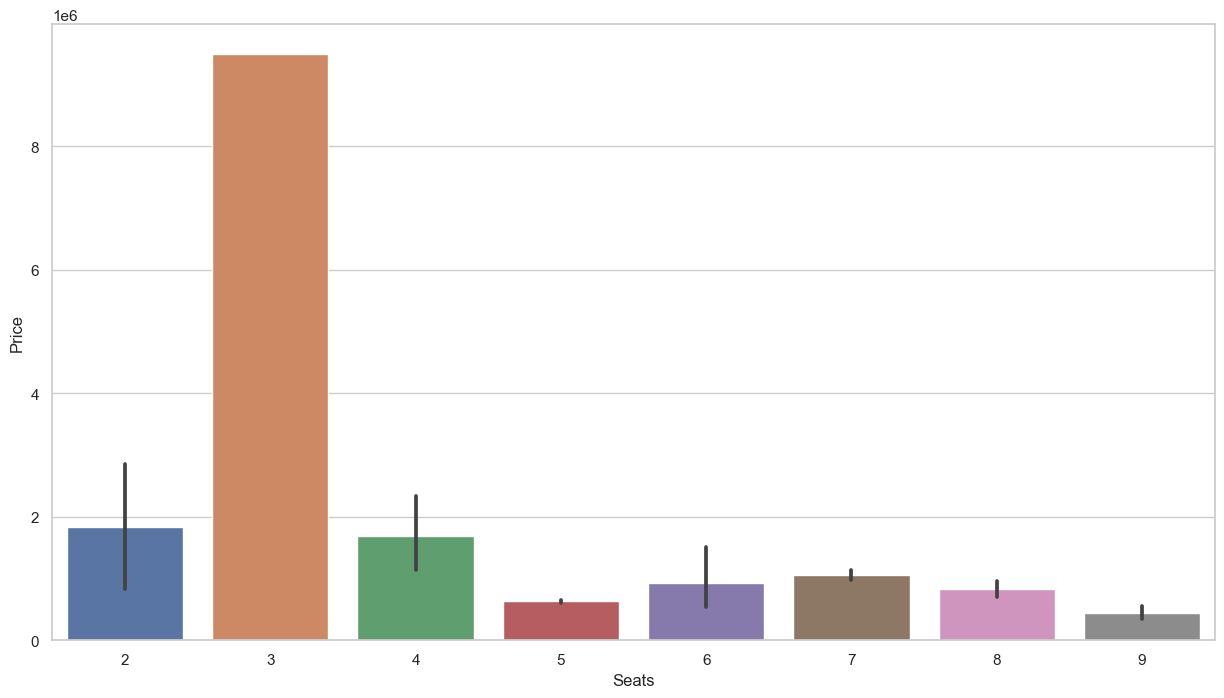

In [492]:
# Lets analyse the Price and Seats

plt.figure(figsize= (15,8))
sns.barplot(x='Seats', y='Price', data= df)
plt.xlabel('Seats', fontsize= 12)
plt.ylabel('Price', fontsize= 12)
plt.show()

- Cars having 3 seats are having higher price.   
- Cars with 5 seats is having less prices as compare to other.

In [493]:
df[df['Seats']==3]

Brand  Make_Year    Fuel  KMs_Driven  \
455  Volvo XC 90 Excellence       2017  Petrol       47000   
580  Volvo XC 90 Excellence       2017  Petrol       47000   

     Engine_Displacement  No_Of_Owner Transmission  Mileage  Max_Power  \
455                 1969          1.0    Automatic     42.0      401.4   
580                 1969          1.0    Automatic     42.0      401.4   

     Torque  Seats   Color  Gear_Box Drive_Type Steering_Type  \
455   640.0      3  Silver         8        AWD         Power   
580   640.0      3  Silver         8        AWD         Power   

    Front_Brake_Type Rear_Brake_Type  Acceleration    Price       City  
455            Discs           Discs           5.6  9500000     mumbai  
580            Discs           Discs           5.6  9500000  bangalore

- Here we car see which car is having higher price with 3 seating capacity, which is not possible. 
- We will drop this two rows from dataframe.

In [494]:
df= df.drop([455, 580], axis=0)

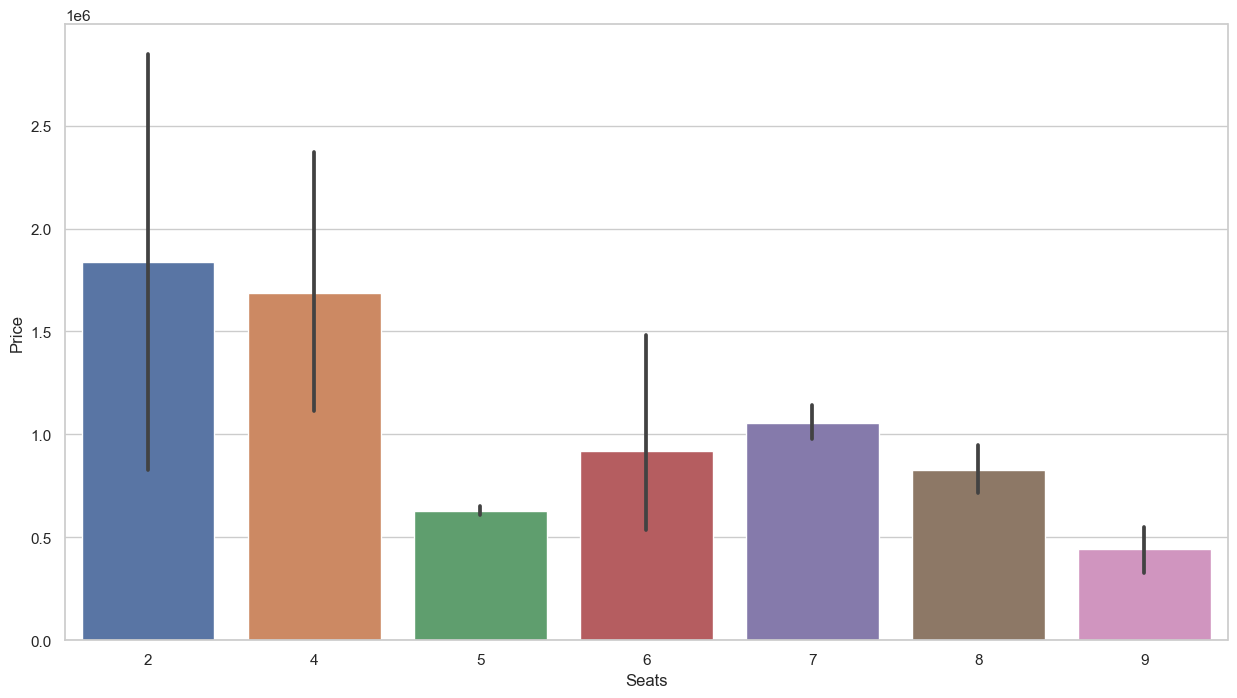

In [495]:
# Lets analyse the Price and Seats again

plt.figure(figsize= (15,8))
sns.barplot(x='Seats', y='Price', data= df)
plt.xlabel('Seats', fontsize= 12)
plt.ylabel('Price', fontsize= 12)
plt.show()

- After droping the car with seats 3, we can see 2 and 4 seater cars having higher Price and 5 seater cars being more economical. 

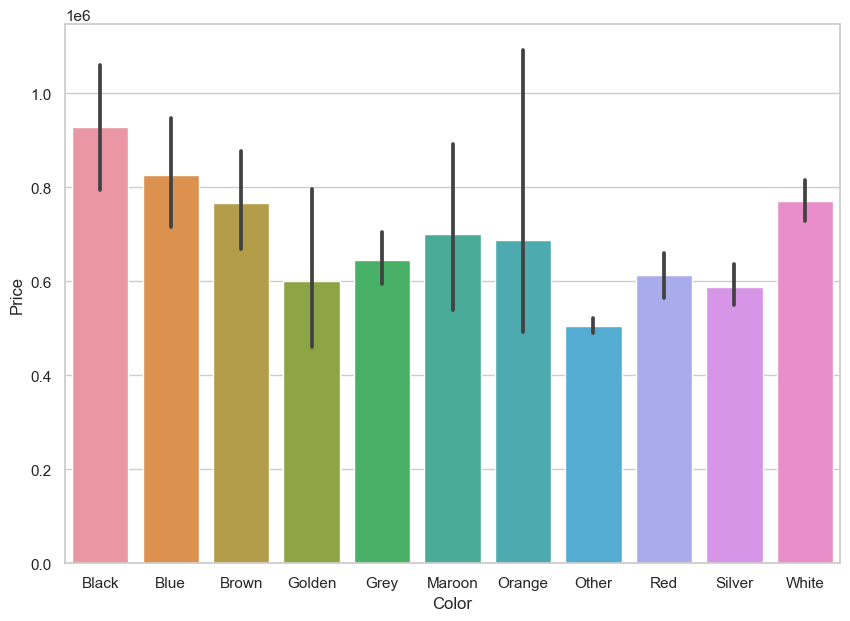

In [496]:
# Lets analyse the Color factor on the Price

plt.figure(figsize= (10,7))
sns.barplot(x='Color', y='Price', data=df)
plt.xlabel('Color', fontsize=12)
plt.ylabel('Price', fontsize= 12)
plt.show()

- Here we can see there is no direct relation of color with Price.  
- In our data Black cars having higher Price as compared to others. 

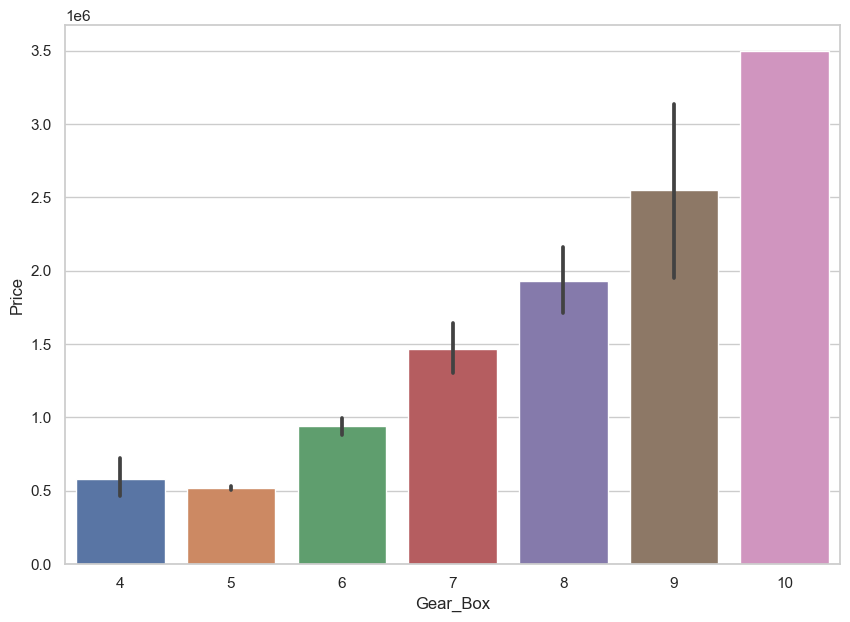

In [497]:
# Lets analyse the Price on the basis of the Gear_box

plt.figure(figsize= (10,7))
sns.barplot(x='Gear_Box', y='Price', data= df)
plt.xlabel('Gear_Box', fontsize=12)
plt.ylabel('Price', fontsize= 12)
plt.show()

- We can clearly see with increase in the number of gears the price of cars increases.

In [498]:
# Lets see Rows having cars with 10 Gears 
df[df['Gear_Box']==10]

Brand  Make_Year    Fuel  KMs_Driven  \
3187  Ford Endeavour Titanium Plus       2020  Diesel        4500   

      Engine_Displacement  No_Of_Owner Transmission  Mileage  Max_Power  \
3187                 1996          1.0    Automatic     13.9      167.6   

      Torque  Seats  Color  Gear_Box Drive_Type Steering_Type  \
3187   420.0      7  White        10        RWD         Power   

     Front_Brake_Type Rear_Brake_Type  Acceleration    Price     City  
3187            Discs           Discs          19.0  3500000  chennai

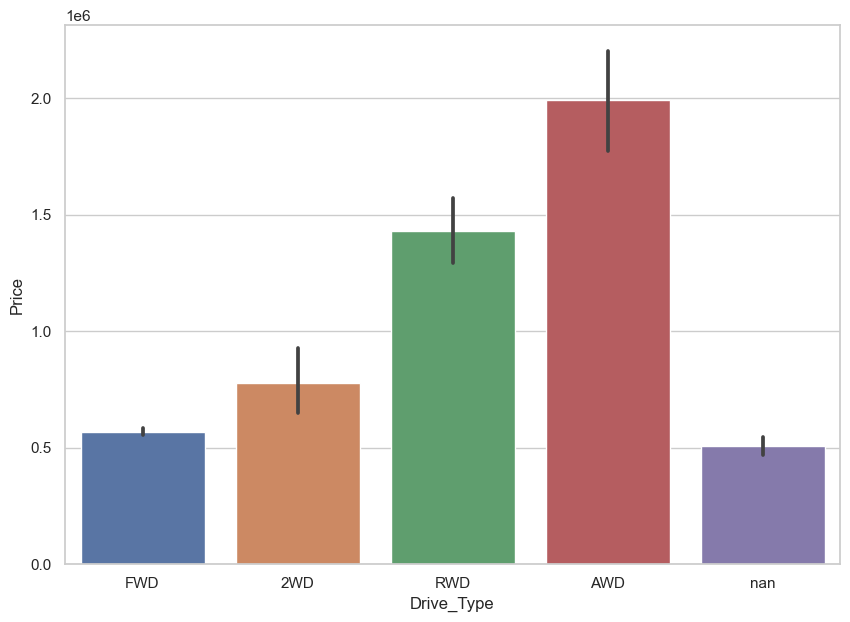

In [499]:
# Analysing Drive_Type with respect to price of the cars

plt.figure(figsize= (10,7))
sns.barplot(x='Drive_Type', y='Price', data= df)
plt.xlabel('Drive_Type', fontsize=12)
plt.ylabel('Price', fontsize= 12)
plt.show()

- We can see All Wheel Drive cars are having higher price as compare to the Front Wheel Drive and Rear Wheel Drive cars.

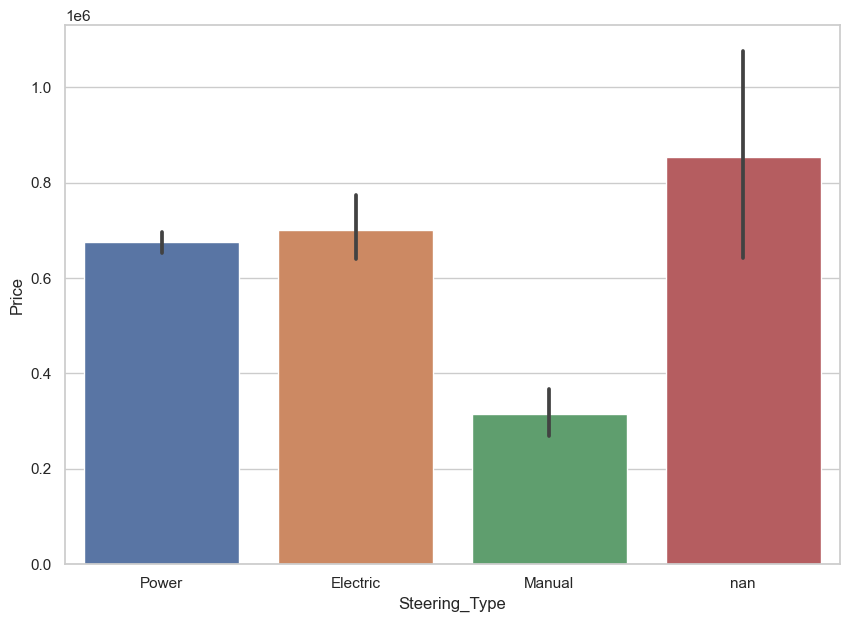

In [500]:
# Analysing Steering_Type with respect to price of the cars

plt.figure(figsize= (10,7))
sns.barplot(x='Steering_Type', y='Price', data= df)
plt.xlabel('Steering_Type', fontsize=12)
plt.ylabel('Price', fontsize= 12)
plt.show()

- Power and Electric Steering type almost have equal price.  
- Manual Steering systems are rare and having very low price.

Text(0, 0.5, 'Price')

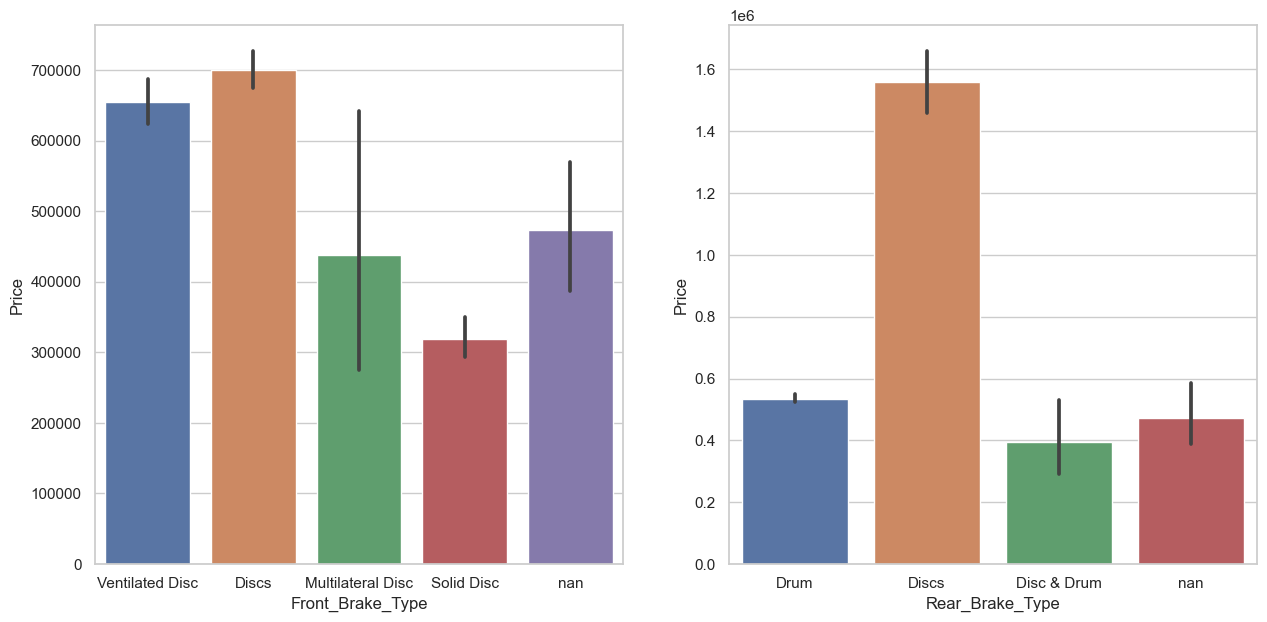

In [501]:
# Analysing Brake_Type with respect to Price of the cars

plt.figure(figsize= (15,7))
plt.subplot(1,2,1)
sns.barplot(x='Front_Brake_Type', y='Price', data= df)
plt.xlabel('Front_Brake_Type', fontsize=12)
plt.ylabel('Price', fontsize= 12)

plt.subplot(1,2,2)
sns.barplot(x='Rear_Brake_Type', y='Price', data= df)
plt.xlabel('Rear_Brake_Type', fontsize=12)
plt.ylabel('Price', fontsize= 12)

- We can see Cars having Discs type breaks are higher in price than the other types of breaks for both.

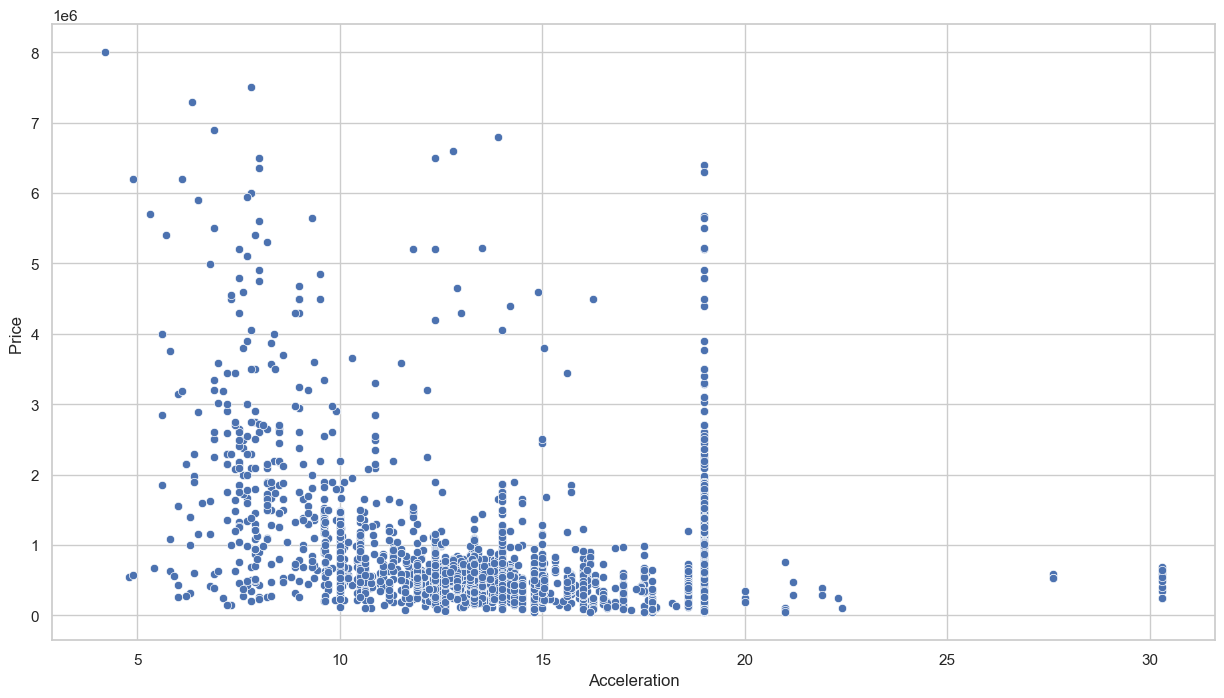

In [502]:
# Let's analyze Acceleration vs Price

plt.figure(figsize= (15,8))
sns.scatterplot( y='Price', x='Acceleration', data= df)
plt.xlabel('Acceleration', fontsize= 12)
plt.ylabel('Price ', fontsize= 12)
plt.show()

- While there seems to be a slight positive trend, the correlation between acceleration and price is relatively weak suggesting that while higher acceleration might correlate with higher prices, other factors like brand, model, and features play a significant role. 

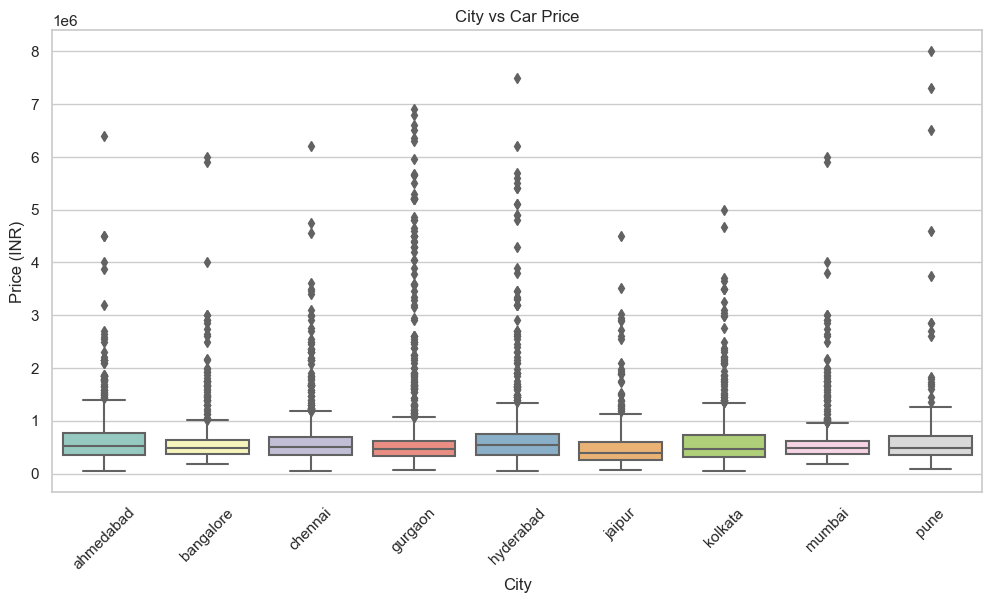

In [503]:
# Let's Analyze Location vs Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Price', data=df, palette='Set3')
plt.title('City vs Car Price')
plt.xlabel('City')
plt.ylabel('Price (INR)')
plt.xticks(rotation=45)
plt.show()


- There is significant variation in car prices across different cities.
- In conclusion, the city can influence the price of a car, with certain cities having higher-priced cars.

### Feature Engineering
In this step of the project we will extract all the required features for our model development and convert the categorical features
into numerical feature.

In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5194 entries, 0 to 5196
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Brand                5194 non-null   category
 1   Make_Year            5194 non-null   int64   
 2   Fuel                 5194 non-null   category
 3   KMs_Driven           5194 non-null   int64   
 4   Engine_Displacement  5194 non-null   int64   
 5   No_Of_Owner          5194 non-null   float64 
 6   Transmission         5194 non-null   category
 7   Mileage              5194 non-null   float64 
 8   Max_Power            5194 non-null   float64 
 9   Torque               5194 non-null   float32 
 10  Seats                5194 non-null   int64   
 11  Color                5194 non-null   category
 12  Gear_Box             5194 non-null   int64   
 13  Drive_Type           5194 non-null   object  
 14  Steering_Type        5194 non-null   object  
 15  Front_Brake_Type     

In [505]:
# Selecting columns with 'category' dtype
categorical_features = df.select_dtypes(include=['category'])
categorical_features.head()

Brand    Fuel Transmission   Color       City
0           Maruti Swift LDI BSIV  Diesel       Manual   White  ahmedabad
1            Ford Figo Diesel ZXI  Diesel       Manual    Grey  ahmedabad
2  Maruti S-Cross 2017-2020 Alpha  Diesel       Manual  Silver  ahmedabad
3          Hyundai i20 Active 1.4  Diesel       Manual   White  ahmedabad
4            Hyundai i20 1.4 CRDi  Diesel       Manual   White  ahmedabad

In [506]:
for col in categorical_features:
    print('\n%s column: '%col)
    print(df[col].value_counts())
    print('*'*20)


Brand column: 
Maruti Wagon R VXI                         59
Maruti Wagon R LXI                         41
Hyundai Verna 1.6 SX                       34
2016 Hyundai Grand i10                     34
2015 Hyundai Grand i10                     33
2014 Maruti Swift                          32
Toyota Innova Crysta 2016-2020             32
BMW 3 Series 320d                          31
Hyundai Grand i10 1.2                      30
Maruti Alto 800 LXI                        29
2018 Renault KWID                          29
2018 Hyundai i20                           28
2017 Hyundai Grand i10                     28
2015 Maruti Swift                          27
2017 Hyundai i20                           26
2018 Maruti Baleno                         25
2017 Maruti Baleno                         25
Honda City i VTEC                          25
Hyundai Creta 1.6 CRDi                     25
2013 Hyundai i10                           25
Volkswagen Vento 1.5 TDI                   24
2016 Maruti Swift 

We can see CNG  and LPG Based cars are very less in numbers. we can drop these row.   
We can drop Multilateral Disc type or replace it with disc  
Disc & Drum    also can be droped

In [507]:
df = df[df.Fuel != 'CNG']

In [508]:
df = df[df.Fuel != 'LPG']

In [509]:
df = df[df.No_Of_Owner != 'Fourth & Above ']

In [510]:
df = df[df.Color != 'Orange']

In [511]:
df = df[df.Front_Brake_Type != 'Multilateral Disc']

In [512]:
df = df[df.Rear_Brake_Type != 'Disc & Drum']

In [513]:
df.columns

Index(['Brand', 'Make_Year', 'Fuel', 'KMs_Driven', 'Engine_Displacement',
       'No_Of_Owner', 'Transmission', 'Mileage', 'Max_Power', 'Torque',
       'Seats', 'Color', 'Gear_Box', 'Drive_Type', 'Steering_Type',
       'Front_Brake_Type', 'Rear_Brake_Type', 'Acceleration', 'Price', 'City'],
      dtype='object')

In [514]:
for col in categorical_features:
    print(f'\n{col} column: ')
    print(df[col].value_counts().head())  # Display top few counts
    print('*' * 20)



Brand column: 
Maruti Wagon R VXI                59
Hyundai Verna 1.6 SX              34
2015 Hyundai Grand i10            33
2016 Hyundai Grand i10            32
Toyota Innova Crysta 2016-2020    32
Name: Brand, dtype: int64
********************

Fuel column: 
Petrol      2936
Diesel      2099
LPG            0
Electric       0
CNG            0
Name: Fuel, dtype: int64
********************

Transmission column: 
Manual       4091
Automatic     944
Name: Transmission, dtype: int64
********************

Color column: 
White     1517
Other      839
Silver     686
Grey       638
Red        621
Name: Color, dtype: int64
********************

City column: 
gurgaon      990
hyderabad    644
mumbai       637
chennai      598
kolkata      587
Name: City, dtype: int64
********************


- All the categorical feature are nominal, We will be using pandas get dummies to encode our categorical values. 

In [515]:
# Applying get dummies of panda for one hot encoding 
data_new= pd.get_dummies(df, drop_first=True)

data_new.head()

Make_Year  KMs_Driven  Engine_Displacement  No_Of_Owner  Mileage  \
0       2014      100821                 1248          1.0     25.2   
1       2012      102456                 1399          2.0     20.0   
2       2017       86698                 1248          1.0     25.1   
3       2015       60603                 1396          1.0     21.2   
4       2012      145814                 1396          1.0     23.0   

   Max_Power  Torque  Seats  Gear_Box  Acceleration   Price  \
0       74.0   190.0      5         5          14.8  304000   
1       68.0   160.0      5         5          14.8  110000   
2       88.5   200.0      5         5          13.4  660000   
3       88.7   220.0      5         6          15.0  490000   
4       90.0    22.4      5         6          13.0  236000   

   Brand_2008 Maruti Alto  Brand_2009 Hyundai i10  Brand_2009 Maruti Swift  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       0                        0   

   Brand_2009 Maruti Swift Dzire  Brand_2010 Honda City  \
0                              0                      0   
1                              0                      0   
2                              0                      0   
3                              0                      0   
4                              0                      0   

   Brand_2010 Hyundai i20  Brand_2010 Maruti Alto  Brand_2010 Maruti Alto K10  \
0                       0                       0                           0   
1                       0                       0                           0   
2                       0                       0                           0   
3                       0                       0                           0   
4                       0                       0                           0   

   Brand_2010 Maruti Swift  Brand_2010 Maruti Swift Dzire  \
0                        0                              0   
1                        0                              0   
2                        0                              0   
3                        0                              0   
4                        0                              0   

   Brand_2011 Honda City  Brand_2011 Hyundai i10  Brand_2011 Hyundai i20  \
0                      0                       0                       0   
1                      0                       0                       0   
2                      0                       0                       0   
3                      0                       0                       0   
4                      0                       0                       0   

   Brand_2011 Maruti Alto  Brand_2011 Maruti Alto K10  Brand_2011 Maruti SX4  \
0                       0                           0                      0   
1                       0                           0                      0   
2                       0                           0                      0   
3                       0                           0                      0   
4                       0                           0                      0   

   Brand_2011 Maruti Swift  Brand_2011 Maruti Swift Dzire  \
0                        0                              0   
1                        0                              0   
2                        0                              0   
3                        0                              0   
4                        0                              0   

   Brand_2011 Maruti Wagon R  Brand_2011 Maruti Zen Estilo  \
0                          0                             0   
1                          0                             0   
2                          0

In [516]:
# New shape of the data 
data_new.shape

(5035, 1301)

### Correlation Analysis

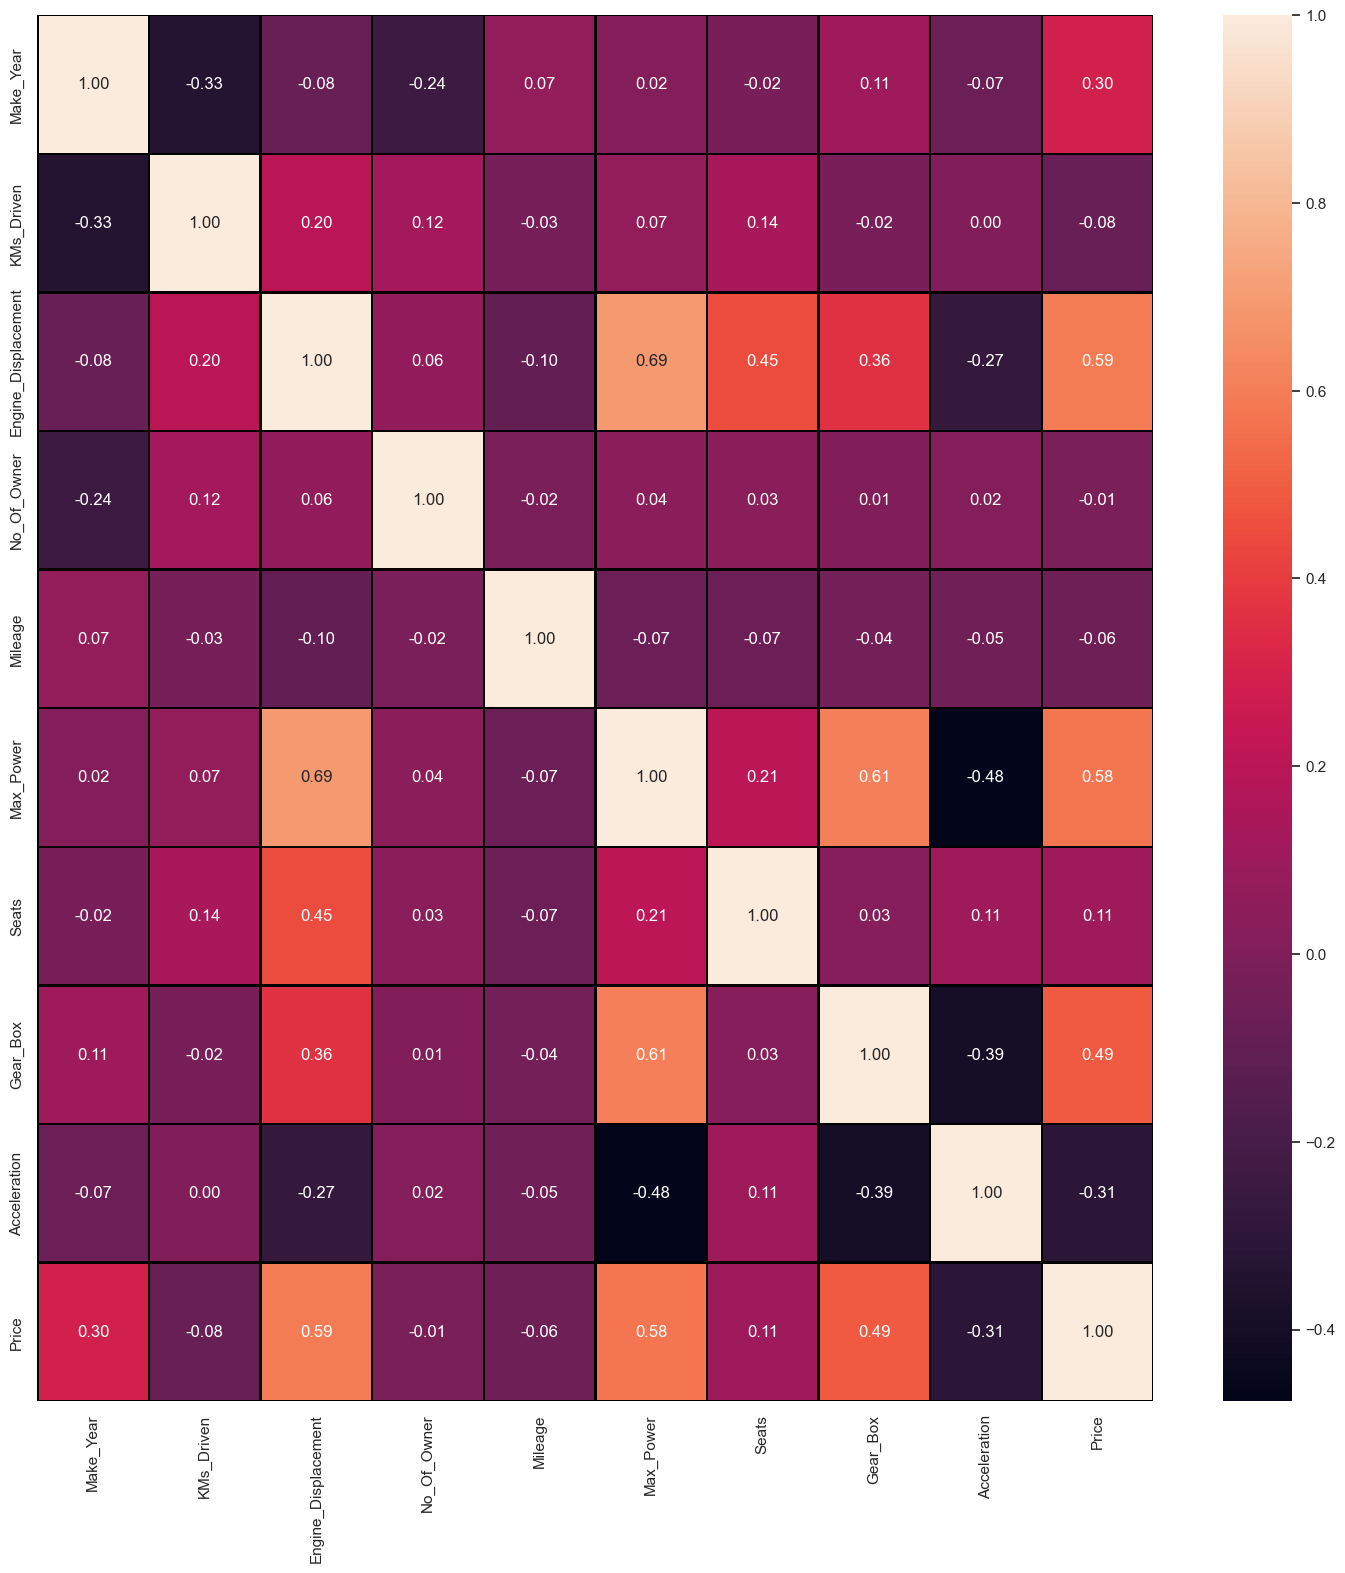

In [517]:
plt.figure(figsize = (18, 18))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, linewidths=1, linecolor='black', fmt='.2f')
plt.show()



Strong Positive Correlations:
- Make Year and Price: Newer cars tend to be more expensive.
- Engine Displacement, Max Power, and Torque: These variables are highly correlated, indicating that larger engines often produce more power and torque.
Moderate Positive Correlations:
- Acceleration and Price: Cars with higher acceleration tend to be more expensive.
- Mileage and No_Of_Owner: Cars with higher mileage often have more owners.
Negative Correlations:
- Mileage and Price: As mileage increases, the price tends to decrease.
- No_Of_Owner and Price: Cars with more owners tend to be less expensive.

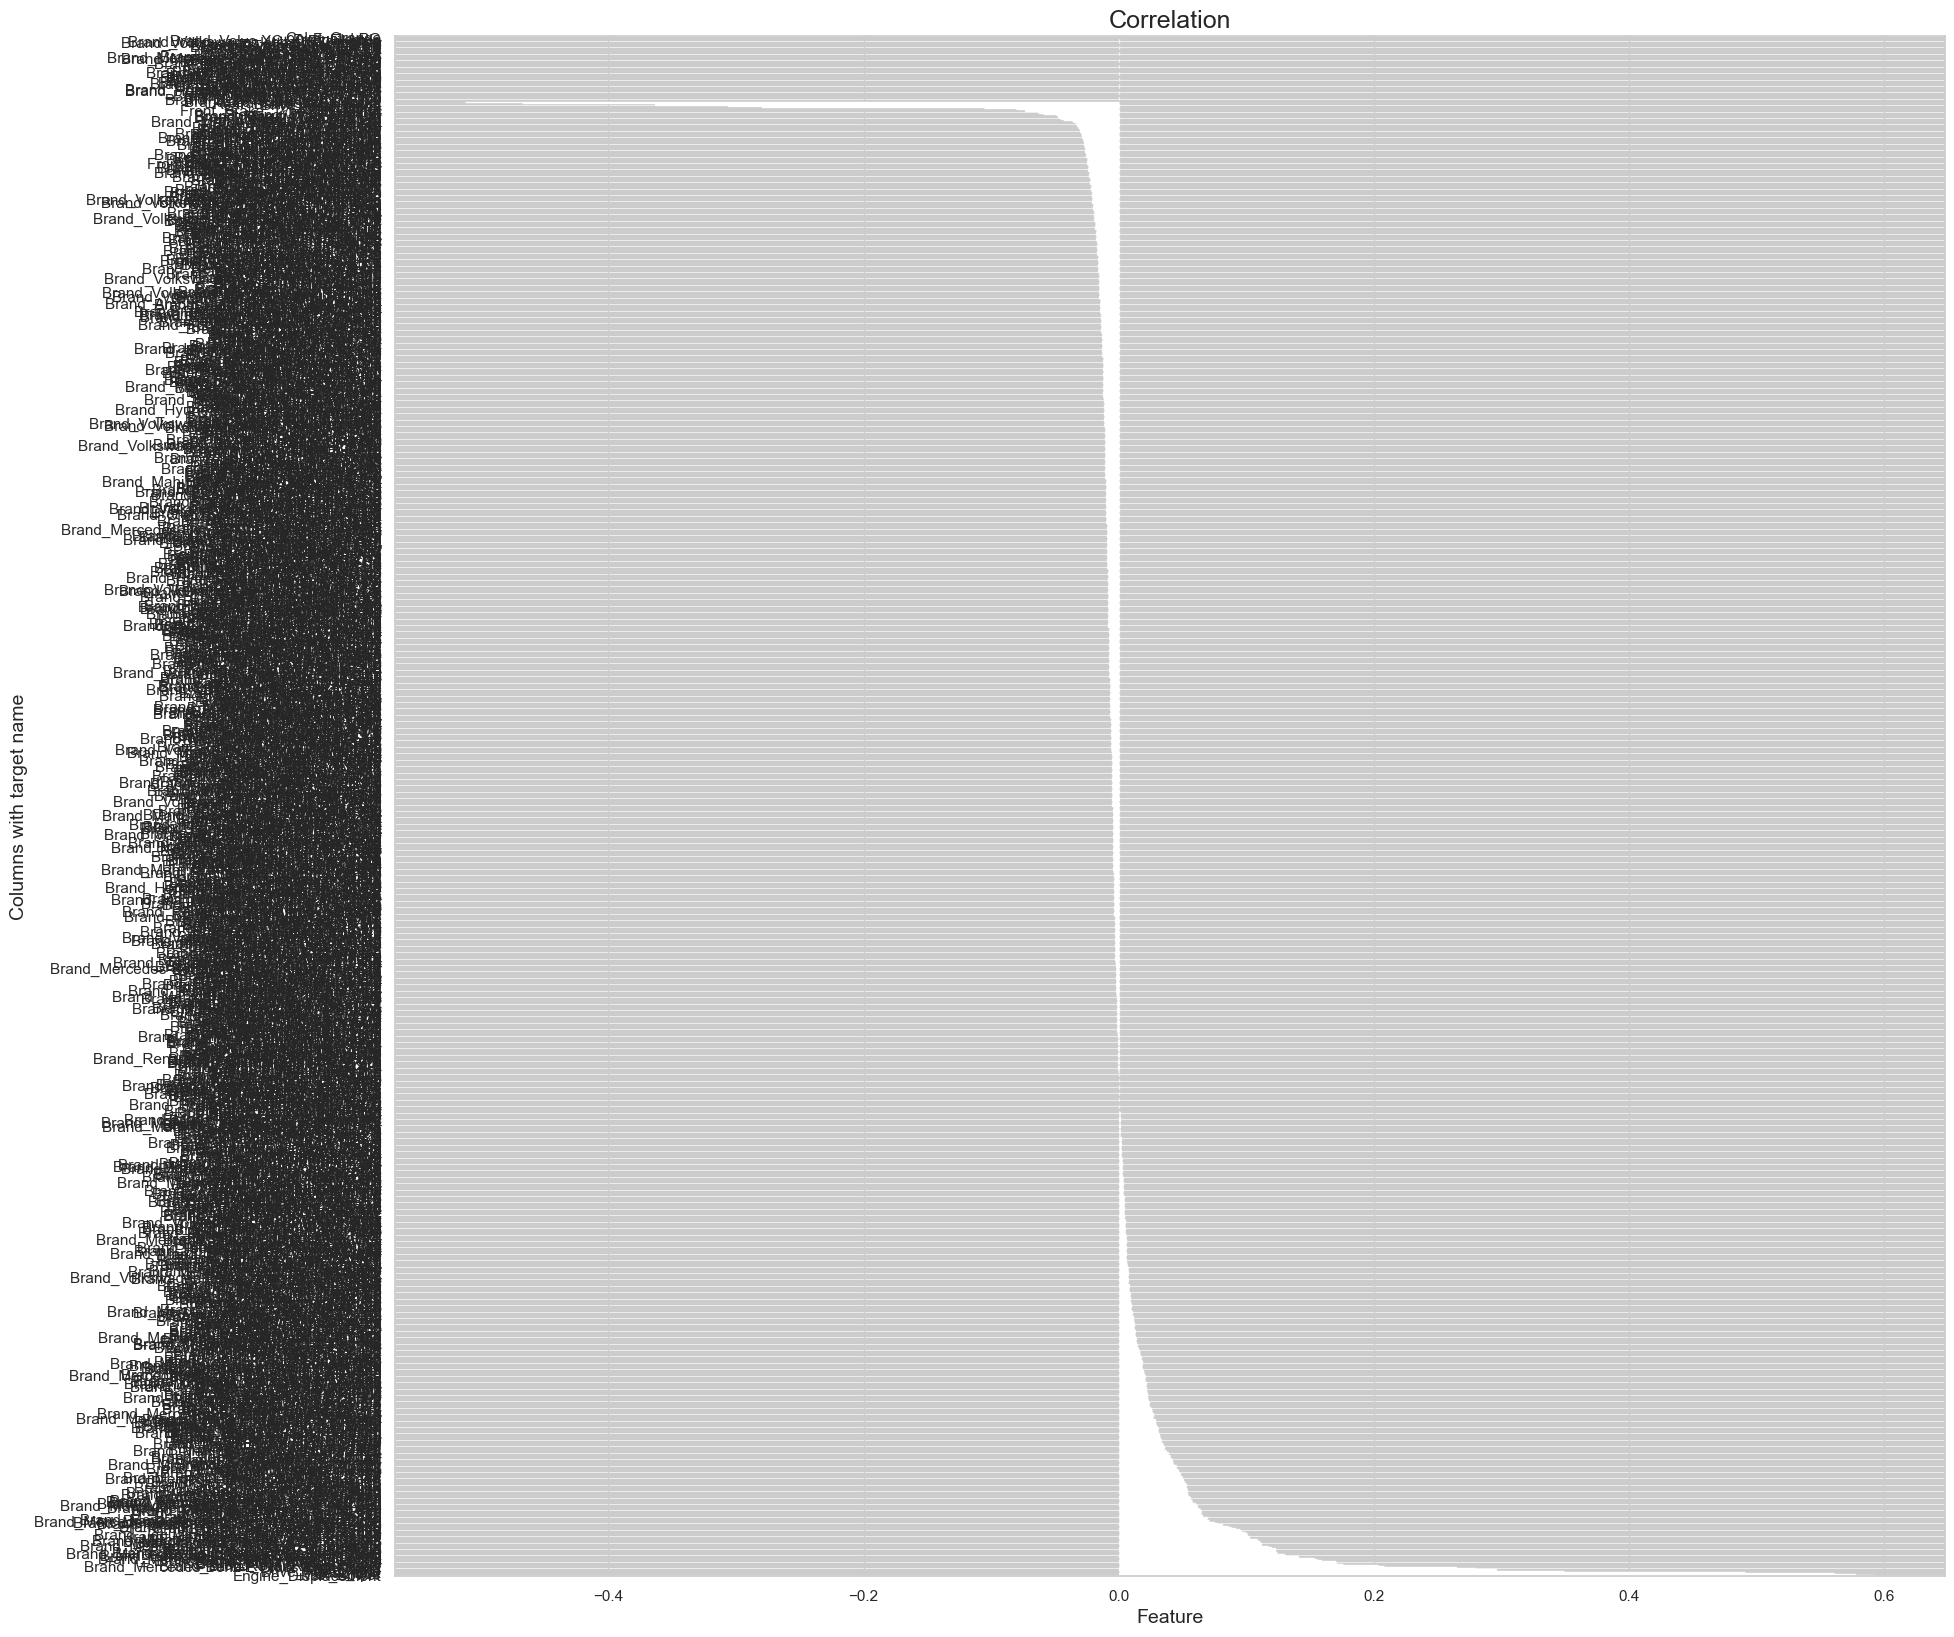

In [518]:
plt.figure(figsize=(20,20))
data_new.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='barh',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.grid(True)
plt.show()

Here we can see Features on the Right side of the 0.0 are having positive corelation with the target,  
and Features on the left of the 0.0 are having negative or 0 correlation.

#### Checking for Outliers

We will check the outliers present in the numerical columns.

<AxesSubplot:>

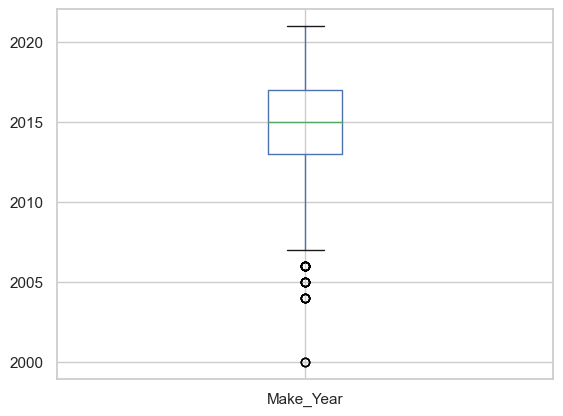

In [519]:
data_new['Make_Year'].plot.box()

In Make years we are having very less outliers, 

<AxesSubplot:>

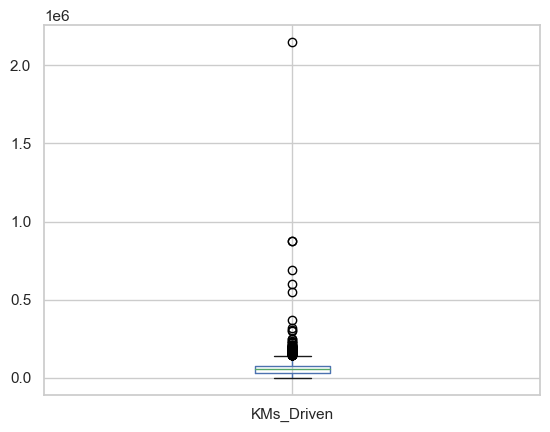

In [520]:
data_new['KMs_Driven'].plot.box()

We have many outlier in the KMs_Driven

<AxesSubplot:>

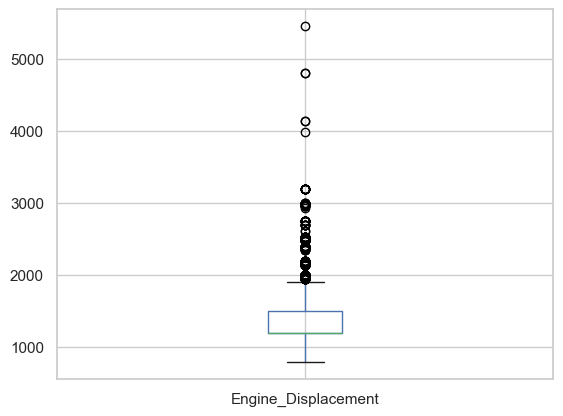

In [521]:
data_new['Engine_Displacement'].plot.box()

Engine_Displacement also having outliers 

<AxesSubplot:>

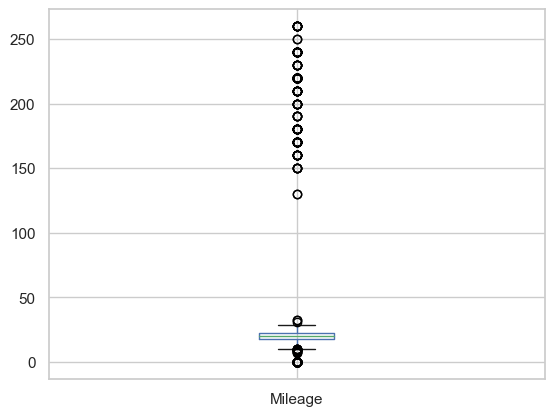

In [522]:
data_new['Mileage'].plot.box()

The values above 35 are outliers 

<AxesSubplot:>

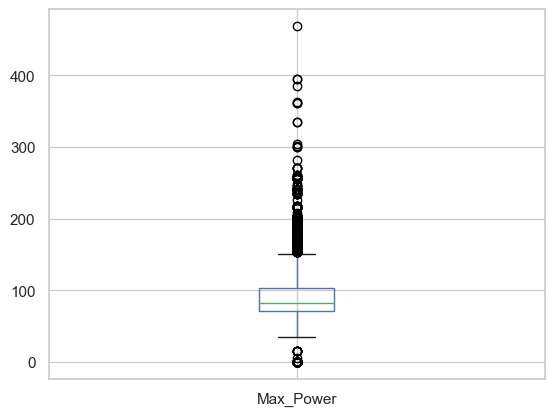

In [523]:
data_new['Max_Power'].plot.box()

Max_Power also having outliers 

<AxesSubplot:>

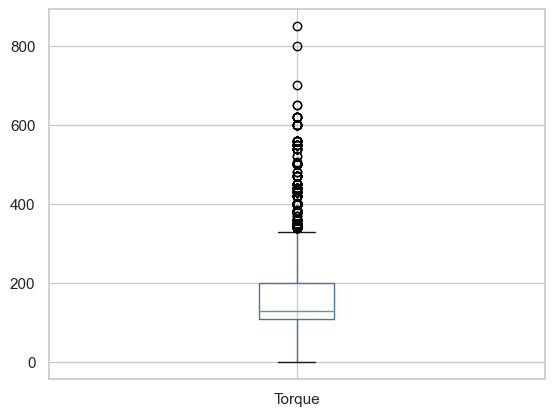

In [524]:
data_new['Torque'].plot.box()

We have outliers in Torque column also.

<AxesSubplot:>

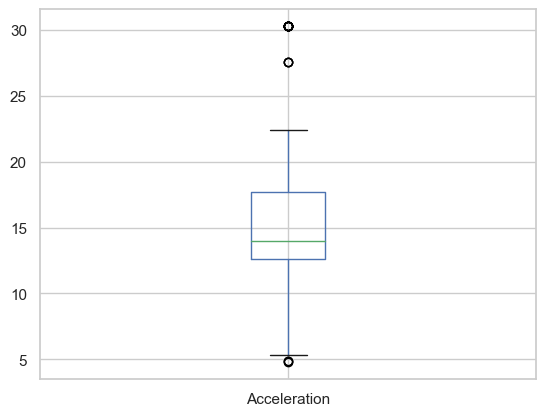

In [525]:
data_new['Acceleration'].plot.box()

#### Removing Outliers

In [526]:
from scipy.stats import zscore

z = np.abs(zscore(data_new))
outliers = np.where(z > 3)

In [527]:
df_new = data_new[(z<3).all(axis=1)]
print(data_new.shape)
print(df_new.shape)

(5035, 1301)
(0, 1301)


In [528]:
Loss_percentage=(5026-3252)/5026*100
print(Loss_percentage)

35.29645841623557


Here we can see loss percentage of the dats is 35.29 percentage, we will try other method lets check.

Lets Try IQR method to remove outlires.

In [529]:
Q1 = data_new.quantile(0.25)
Q3 = data_new.quantile(0.75)
IQR = Q3 - Q1

# Display only a few columns of the IQR
print(IQR.head())  # Adjust this to display only top few values


Make_Year                 4.0
KMs_Driven            44703.0
Engine_Displacement     301.0
No_Of_Owner               0.0
Mileage                   5.1
dtype: float64


In [530]:
df_new=data_new[~((data_new < (Q1-1.5*IQR)) | (data_new > (Q3+ 1.5*IQR))).any(axis=1)]
print(df_new.shape)

(0, 1301)


In [531]:
Loss_percentage=(5026-531)/5026*100
print(Loss_percentage)

89.43493832073219


The Percentage loss of data is nearly 90 percent, when using IQR method, we will no remove any oulier,
We will proceed to next step without removing them. 

#### Checking Skewness

In [532]:
# Calculate the skewness of each feature in the dataset
skewness = data_new.skew()

# Display only the first few skewness values
print(skewness.head())

print(skewness.head())


Make_Year             -0.6
KMs_Driven            17.2
Engine_Displacement    1.9
No_Of_Owner            2.9
Mileage                5.1
dtype: float64
Make_Year             -0.6
KMs_Driven            17.2
Engine_Displacement    1.9
No_Of_Owner            2.9
Mileage                5.1
dtype: float64


In [533]:
# Lets remove the skewness
data_new['KMs_Driven'] = np.sqrt( data_new['KMs_Driven'] )
data_new['Engine_Displacement'] = np.sqrt( data_new['Engine_Displacement'] )
data_new['Mileage'] = np.sqrt( data_new['Mileage'] )
data_new['Max_Power'] = np.sqrt( data_new['Max_Power'] )
data_new['Torque'] = np.sqrt( data_new['Torque'] )
data_new['Acceleration'] = np.sqrt( data_new['Acceleration'] )


### Feature Scaling and Feature Selection

In [534]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Separate the features and target variable
X = data_new.drop(columns=['Price'])
y = data_new['Price']

# Checking for NaN values in the dataset before transformation
nan_columns = X.isna().sum()
nan_columns = nan_columns[nan_columns > 0]  # Filter to show columns with NaN values

# Displaying top 5 columns with the most NaNs
nan_columns = nan_columns.sort_values(ascending=False)  # Sort columns by number of missing values
print("Top 5 columns with missing values:")
print(nan_columns.head(5))  # Display the top 5 columns


Top 5 columns with missing values:
Series([], dtype: int64)


In [535]:
X.shape, y.shape

((5035, 1300), (5035,))

In [536]:
# Replace infinite values with NaN (in case any are present)
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill any remaining NaNs with median values or handle them as appropriate
X.fillna(X.median(), inplace=True)

In [537]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check for NaNs after scaling
if np.isnan(X_scaled).any():
    print("NaN values found after scaling.")

# Convert scaled features back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


#### Recursive Feature Elimination

In [538]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
from joblib import Parallel, delayed

# Initialize the model for RFE with a higher step size to reduce the iterations
model = LinearRegression()
n_features_to_select = 20
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select, step=5)

# Fit RFE on the data
X_rfe = rfe.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[rfe.support_].tolist()

# Standardize the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_rfe)

# Convert to DataFrame with selected feature names
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

# Calculate VIF in parallel
def calculate_vif(i):
    return variance_inflation_factor(X_scaled_df.values, i)

vif_values = Parallel(n_jobs=-1)(delayed(calculate_vif)(i) for i in range(X_scaled_df.shape[1]))

# Create VIF DataFrame
vif_data = pd.DataFrame({
    "Feature": selected_features,
    "VIF": vif_values
})

print(vif_data)
print(f"Selected Features:\n{selected_features}")


                                      Feature  VIF
0                     Brand_Audi A5 Sportback  1.0
1                  Brand_Audi Q7 2006-2020 45  1.0
2                       Brand_Audi TT 45 TFSI  1.0
3                       Brand_BMW 6 Series GT  1.0
4                     Brand_BMW X3 xDrive 20d  1.0
5                        Brand_BMW X4 M Sport  1.0
6              Brand_Jaguar XJ 2.0L Portfolio  1.0
7                Brand_Mercedes-Benz AMG A 35  1.0
8   Brand_Mercedes-Benz E-Class All-Terrain E  1.0
9     Brand_Mercedes-Benz E-Class Exclusive E  1.0
10   Brand_Mercedes-Benz E-Class Expression E  1.0
11        Brand_Mercedes-Benz GL-Class 43 AMG  1.0
12        Brand_Mercedes-Benz GLC 220d 4MATIC  1.0
13               Brand_Porsche Cayenne Diesel  1.0
14      Brand_Porsche Cayenne Diesel Platinum  1.0
15             Brand_Porsche Cayenne S Diesel  1.0
16              Brand_Porsche Panamera Diesel  1.0
17               Brand_Volvo S90 2016-2021 D4  1.0
18               Brand_Volvo XC

#### Select KBest

In [539]:
# Apply SelectKBest

# Use the 20 selected features from the previous RFE step
k = 20
selector = SelectKBest(score_func=f_regression, k=k)
X_kbest = selector.fit_transform(X_scaled_df, y)  # Apply to X_scaled_df, not X_scaled

# Get the names of the selected features
selected_features = X_scaled_df.columns[selector.get_support()]  # Match columns with selector support mask

# Convert selected features back to a DataFrame
X_kbest_df = pd.DataFrame(X_kbest, columns=selected_features)

print(f"Selected Features:\n{selected_features}")
X_kbest_df.head()

Selected Features:
Index(['Brand_Audi A5 Sportback', 'Brand_Audi Q7 2006-2020 45',
       'Brand_Audi TT 45 TFSI', 'Brand_BMW 6 Series GT',
       'Brand_BMW X3 xDrive 20d', 'Brand_BMW X4 M Sport',
       'Brand_Jaguar XJ 2.0L Portfolio', 'Brand_Mercedes-Benz AMG A 35',
       'Brand_Mercedes-Benz E-Class All-Terrain E',
       'Brand_Mercedes-Benz E-Class Exclusive E',
       'Brand_Mercedes-Benz E-Class Expression E',
       'Brand_Mercedes-Benz GL-Class 43 AMG',
       'Brand_Mercedes-Benz GLC 220d 4MATIC', 'Brand_Porsche Cayenne Diesel',
       'Brand_Porsche Cayenne Diesel Platinum',
       'Brand_Porsche Cayenne S Diesel', 'Brand_Porsche Panamera Diesel',
       'Brand_Volvo S90 2016-2021 D4', 'Brand_Volvo XC60 D4 Momentum',
       'Brand_Volvo XC90 D5 Momentum'],
      dtype='object')


Brand_Audi A5 Sportback  Brand_Audi Q7 2006-2020 45  Brand_Audi TT 45 TFSI  \
0                     -0.0                        -0.0                   -0.0   
1                     -0.0                        -0.0                   -0.0   
2                     -0.0                        -0.0                   -0.0   
3                     -0.0                        -0.0                   -0.0   
4                     -0.0                        -0.0                   -0.0   

   Brand_BMW 6 Series GT  Brand_BMW X3 xDrive 20d  Brand_BMW X4 M Sport  \
0                   -0.0                     -0.0                  -0.0   
1                   -0.0                     -0.0                  -0.0   
2                   -0.0                     -0.0                  -0.0   
3                   -0.0                     -0.0                  -0.0   
4                   -0.0                     -0.0                  -0.0   

   Brand_Jaguar XJ 2.0L Portfolio  Brand_Mercedes-Benz AMG A 35  \
0                            -0.0                          -0.0   
1                            -0.0                          -0.0   
2                            -0.0                          -0.0   
3                            -0.0                          -0.0   
4                            -0.0                          -0.0   

   Brand_Mercedes-Benz E-Class All-Terrain E  \
0                                       -0.0   
1                                       -0.0   
2                                       -0.0   
3                                       -0.0   
4                                       -0.0   

   Brand_Mercedes-Benz E-Class Exclusive E  \
0                                     -0.0   
1                                     -0.0   
2                                     -0.0   
3                                     -0.0   
4                                     -0.0   

   Brand_Mercedes-Benz E-Class Expression E  \
0                                      -0.0   
1                                      -0.0   
2                                      -0.0   
3                                      -0.0   
4                                      -0.0   

   Brand_Mercedes-Benz GL-Class 43 AMG  Brand_Mercedes-Benz GLC 220d 4MATIC  \
0                                 -0.0                                 -0.0   
1                                 -0.0                                 -0.0   
2                                 -0.0                                 -0.0   
3                                 -0.0                                 -0.0   
4                                 -0.0                                 -0.0   

   Brand_Porsche Cayenne Diesel  Brand_Porsche Cayenne Diesel Platinum  \
0                          -0.0                                   -0.0   
1                          -0.0                                   -0.0   
2                          -0.0                                   -0.0   
3                          -0.0                                   -0.0   
4                          -0.0                                   -0.0   

   Brand_Porsche Cayenne S Diesel  Brand_Porsche Panamera Diesel  \
0                            -0.0                           -0.0   
1                            -0.0                           -0.0   
2                            -0.0                           -0.0   
3                            -0.0                           -0.0   
4                            -0.0                           -0.0   

   Brand_Volvo S90 2016-2021 D4  Brand_Volvo XC60 D4 Momentum  \
0                          -0.0                          -0.0   
1                          -0.0                          -0.0   
2                          -0.0                          -0.0   
3                          -0.0                          -0.0   
4                          -0.0                          -0.0   

   Brand_Volvo XC90 D5 Momentum  
0                          -0.0  
1                        

In [540]:
# Use the 20 selected features from the previous RFE step
k = 17
selector = SelectKBest(score_func=f_regression, k=k)
X_kbest = selector.fit_transform(X_scaled_df, y)  # Apply to X_scaled_df, not X_scaled

# Get the names of the selected features
selected_features = X_scaled_df.columns[selector.get_support()]  # Match columns with selector support mask

# Convert selected features back to a DataFrame
X_kbest_df = pd.DataFrame(X_kbest, columns=selected_features)

print(f"Selected Features:\n{selected_features}")
X_kbest_df.head()

Selected Features:
Index(['Brand_Audi A5 Sportback', 'Brand_Audi Q7 2006-2020 45',
       'Brand_Audi TT 45 TFSI', 'Brand_BMW 6 Series GT',
       'Brand_BMW X3 xDrive 20d', 'Brand_BMW X4 M Sport',
       'Brand_Jaguar XJ 2.0L Portfolio',
       'Brand_Mercedes-Benz E-Class All-Terrain E',
       'Brand_Mercedes-Benz E-Class Exclusive E',
       'Brand_Mercedes-Benz GL-Class 43 AMG',
       'Brand_Mercedes-Benz GLC 220d 4MATIC', 'Brand_Porsche Cayenne Diesel',
       'Brand_Porsche Cayenne Diesel Platinum',
       'Brand_Porsche Cayenne S Diesel', 'Brand_Porsche Panamera Diesel',
       'Brand_Volvo S90 2016-2021 D4', 'Brand_Volvo XC90 D5 Momentum'],
      dtype='object')


Brand_Audi A5 Sportback  Brand_Audi Q7 2006-2020 45  Brand_Audi TT 45 TFSI  \
0                     -0.0                        -0.0                   -0.0   
1                     -0.0                        -0.0                   -0.0   
2                     -0.0                        -0.0                   -0.0   
3                     -0.0                        -0.0                   -0.0   
4                     -0.0                        -0.0                   -0.0   

   Brand_BMW 6 Series GT  Brand_BMW X3 xDrive 20d  Brand_BMW X4 M Sport  \
0                   -0.0                     -0.0                  -0.0   
1                   -0.0                     -0.0                  -0.0   
2                   -0.0                     -0.0                  -0.0   
3                   -0.0                     -0.0                  -0.0   
4                   -0.0                     -0.0                  -0.0   

   Brand_Jaguar XJ 2.0L Portfolio  Brand_Mercedes-Benz E-Class All-Terrain E  \
0                            -0.0                                       -0.0   
1                            -0.0                                       -0.0   
2                            -0.0                                       -0.0   
3                            -0.0                                       -0.0   
4                            -0.0                                       -0.0   

   Brand_Mercedes-Benz E-Class Exclusive E  \
0                                     -0.0   
1                                     -0.0   
2                                     -0.0   
3                                     -0.0   
4                                     -0.0   

   Brand_Mercedes-Benz GL-Class 43 AMG  Brand_Mercedes-Benz GLC 220d 4MATIC  \
0                                 -0.0                                 -0.0   
1                                 -0.0                                 -0.0   
2                                 -0.0                                 -0.0   
3                                 -0.0                                 -0.0   
4                                 -0.0                                 -0.0   

   Brand_Porsche Cayenne Diesel  Brand_Porsche Cayenne Diesel Platinum  \
0                          -0.0                                   -0.0   
1                          -0.0                                   -0.0   
2                          -0.0                                   -0.0   
3                          -0.0                                   -0.0   
4                          -0.0                                   -0.0   

   Brand_Porsche Cayenne S Diesel  Brand_Porsche Panamera Diesel  \
0                            -0.0                           -0.0   
1                            -0.0                           -0.0   
2                            -0.0                           -0.0   
3                            -0.0                           -0.0   
4                            -0.0                           -0.0   

   Brand_Volvo S90 2016-2021 D4  Brand_Volvo XC90 D5 Momentum  
0                          -0.0                          -0.0  
1                          -0.0                          -0.0  
2                          -0.0                          -0.0  
3                          -0.0                          -0.0  
4                          -0.0                          -0.0

In [541]:
# Filter X to only include the selected features
X_selected = X[selected_features]

# Standardize the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Convert to DataFrame with the selected feature names
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

# Calculate VIF for the selected features
vif_data = pd.DataFrame()
vif_data['Feature'] = X_scaled_df.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

print(vif_data)

                                      Feature  VIF
0                     Brand_Audi A5 Sportback  1.0
1                  Brand_Audi Q7 2006-2020 45  1.0
2                       Brand_Audi TT 45 TFSI  1.0
3                       Brand_BMW 6 Series GT  1.0
4                     Brand_BMW X3 xDrive 20d  1.0
5                        Brand_BMW X4 M Sport  1.0
6              Brand_Jaguar XJ 2.0L Portfolio  1.0
7   Brand_Mercedes-Benz E-Class All-Terrain E  1.0
8     Brand_Mercedes-Benz E-Class Exclusive E  1.0
9         Brand_Mercedes-Benz GL-Class 43 AMG  1.0
10        Brand_Mercedes-Benz GLC 220d 4MATIC  1.0
11               Brand_Porsche Cayenne Diesel  1.0
12      Brand_Porsche Cayenne Diesel Platinum  1.0
13             Brand_Porsche Cayenne S Diesel  1.0
14              Brand_Porsche Panamera Diesel  1.0
15               Brand_Volvo S90 2016-2021 D4  1.0
16               Brand_Volvo XC90 D5 Momentum  1.0


In [542]:
# Create a correlation matrix
correlation_matrix = X_scaled_df.corr().abs()

# Select upper triangle of correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Features to drop due to high correlation:", to_drop)

# Drop these features
X_scaled_df.drop(columns=to_drop)

# Recalculate VIF for the reduced set of features
vif_data = pd.DataFrame()
vif_data['Feature'] = X_scaled_df.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

print(vif_data)


Features to drop due to high correlation: []
                                      Feature  VIF
0                     Brand_Audi A5 Sportback  1.0
1                  Brand_Audi Q7 2006-2020 45  1.0
2                       Brand_Audi TT 45 TFSI  1.0
3                       Brand_BMW 6 Series GT  1.0
4                     Brand_BMW X3 xDrive 20d  1.0
5                        Brand_BMW X4 M Sport  1.0
6              Brand_Jaguar XJ 2.0L Portfolio  1.0
7   Brand_Mercedes-Benz E-Class All-Terrain E  1.0
8     Brand_Mercedes-Benz E-Class Exclusive E  1.0
9         Brand_Mercedes-Benz GL-Class 43 AMG  1.0
10        Brand_Mercedes-Benz GLC 220d 4MATIC  1.0
11               Brand_Porsche Cayenne Diesel  1.0
12      Brand_Porsche Cayenne Diesel Platinum  1.0
13             Brand_Porsche Cayenne S Diesel  1.0
14              Brand_Porsche Panamera Diesel  1.0
15               Brand_Volvo S90 2016-2021 D4  1.0
16               Brand_Volvo XC90 D5 Momentum  1.0


In [543]:
# Identify features with high VIF (VIF > 5)
high_vif_features = vif_data[vif_data['VIF'] > 5]['Feature']
print("\nFeatures to drop due to high VIF:", high_vif_features.tolist())

# Drop features with high VIF from the reduced dataset
X_scaled_df.drop(columns=high_vif_features)

#  Print the final VIF for the reduced dataset
final_vif_data = pd.DataFrame()
final_vif_data['Feature'] = X_scaled_df.columns
final_vif_data['VIF'] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

print("\nFinal VIF Data for the Reduced Dataset:")
print(final_vif_data)



Features to drop due to high VIF: []

Final VIF Data for the Reduced Dataset:
                                      Feature  VIF
0                     Brand_Audi A5 Sportback  1.0
1                  Brand_Audi Q7 2006-2020 45  1.0
2                       Brand_Audi TT 45 TFSI  1.0
3                       Brand_BMW 6 Series GT  1.0
4                     Brand_BMW X3 xDrive 20d  1.0
5                        Brand_BMW X4 M Sport  1.0
6              Brand_Jaguar XJ 2.0L Portfolio  1.0
7   Brand_Mercedes-Benz E-Class All-Terrain E  1.0
8     Brand_Mercedes-Benz E-Class Exclusive E  1.0
9         Brand_Mercedes-Benz GL-Class 43 AMG  1.0
10        Brand_Mercedes-Benz GLC 220d 4MATIC  1.0
11               Brand_Porsche Cayenne Diesel  1.0
12      Brand_Porsche Cayenne Diesel Platinum  1.0
13             Brand_Porsche Cayenne S Diesel  1.0
14              Brand_Porsche Panamera Diesel  1.0
15               Brand_Volvo S90 2016-2021 D4  1.0
16               Brand_Volvo XC90 D5 Momentum  1.0


#### Principal Component Analysis

In [544]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


X = data_new.drop(columns=['Price'])  # Features
y = data_new['Price']  # Target variable

# Check for any NaN values in X
print("Checking for NaNs in the dataset before transformation:")
print(X.isna().sum())  

# Replace infinite values with NaN (in case any are present)
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill any remaining NaNs with median values or handle them as appropriate
X.fillna(X.median(), inplace=True)

Checking for NaNs in the dataset before transformation:
Make_Year                                        0
KMs_Driven                                       0
Engine_Displacement                              0
No_Of_Owner                                      0
Mileage                                          0
Max_Power                                        0
Torque                                           0
Seats                                            0
Gear_Box                                         0
Acceleration                                     0
Brand_2008 Maruti Alto                           0
Brand_2009 Hyundai i10                           0
Brand_2009 Maruti Swift                          0
Brand_2009 Maruti Swift Dzire                    0
Brand_2010 Honda City                            0
Brand_2010 Hyundai i20                           0
Brand_2010 Maruti Alto                           0
Brand_2010 Maruti Alto K10                       0
Brand_2010 Maruti Swift   

In [545]:
# Scaling the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  

# Check for NaNs after scaling
if np.isnan(X_scaled).any():
    print("NaN values found after scaling.")

# Apply PCA to reduce dimensionality (keeping 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"PCA Transformed Shape: {X_pca.shape}") 

PCA Transformed Shape: (5035, 1152)


In [546]:
# Feature selection using RandomForestRegressor on PCA-transformed data
rf_model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
rf_model.fit(X_pca, y)

# Get feature importances from the PCA components
feature_importances = pd.DataFrame(rf_model.feature_importances_, columns=['importance'], index=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Selecting the top features
top_important_features = feature_importances.nlargest(50, 'importance').index
print("Top Important PCA Components (based on RandomForest):")
print(top_important_features)

# Feature selection using Lasso on PCA-transformed data
lasso = Lasso(alpha=0.01, random_state=42)
lasso_selector = SelectFromModel(lasso, threshold='mean')  # Select features above the mean importance
lasso_selector.fit(X_pca, y)

# Get the boolean mask for the selected features
selected_features_mask = lasso_selector.get_support()

# Get the corresponding PCA feature names
selected_pca_features = [f'PC{i+1}' for i in range(X_pca.shape[1]) if selected_features_mask[i]]
print("Selected PCA components based on Lasso:", selected_pca_features)


Top Important PCA Components (based on RandomForest):
Index(['PC1', 'PC3', 'PC23', 'PC35', 'PC21', 'PC134', 'PC201', 'PC43', 'PC98',
       'PC86', 'PC46', 'PC2', 'PC54', 'PC13', 'PC239', 'PC73', 'PC25', 'PC774',
       'PC5', 'PC34', 'PC387', 'PC19', 'PC28', 'PC191', 'PC744', 'PC179',
       'PC132', 'PC226', 'PC292', 'PC11', 'PC257', 'PC781', 'PC1021', 'PC29',
       'PC88', 'PC136', 'PC541', 'PC409', 'PC200', 'PC72', 'PC15', 'PC24',
       'PC216', 'PC542', 'PC49', 'PC75', 'PC163', 'PC236', 'PC146', 'PC53'],
      dtype='object')
Selected PCA components based on Lasso: ['PC1', 'PC2', 'PC3', 'PC6', 'PC8', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC28', 'PC29', 'PC31', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC41', 'PC44', 'PC47', 'PC49', 'PC51', 'PC52', 'PC56', 'PC58', 'PC59', 'PC70', 'PC71', 'PC73', 'PC75', 'PC81', 'PC82', 'PC86', 'PC87', 'PC91', 'PC92', 'PC95', 'PC105', 'PC112', 'PC113'

In [547]:
# Get the intersection of top features from RandomForest and Lasso
common_features = list(set(top_important_features) & set(selected_pca_features))

print("Common PCA Components based on RandomForest and Lasso:")
print(common_features)


Common PCA Components based on RandomForest and Lasso:
['PC23', 'PC86', 'PC409', 'PC49', 'PC75', 'PC29', 'PC541', 'PC15', 'PC35', 'PC1', 'PC542', 'PC28', 'PC239', 'PC13', 'PC73', 'PC163', 'PC2', 'PC179', 'PC257', 'PC292', 'PC34', 'PC19', 'PC387', 'PC781', 'PC216', 'PC21', 'PC3', 'PC744', 'PC11', 'PC25', 'PC24']


In [548]:

# Create a DataFrame with selected PCA components
X_pca_selected = pd.DataFrame(
    X_pca[:, [int(f[2:]) - 1 for f in common_features]], 
    columns=common_features
)

X_pca_selected.head(3)


PC23  PC86  PC409  PC49  PC75  PC29  PC541  PC15  PC35  PC1  PC542  PC28  \
0  -0.8  -0.2    2.2   0.1   0.1   0.4    0.1  -1.3   1.3  0.5    0.3  -0.0   
1  -0.3  -0.0   -0.2   0.1   0.1  -0.3   -0.0  -2.2  -0.7  0.2   -0.0  -0.1   
2  -0.5  -0.1   -0.5   0.5   0.0  -1.3    0.2   0.5   2.2  1.3   -0.4   0.5   

   PC239  PC13  PC73  PC163  PC2  PC179  PC257  PC292  PC34  PC19  PC387  \
0   -0.2   0.1   0.5    0.3 -1.6    0.0   -0.1   -0.0  -0.3   1.1   -0.0   
1    0.1  -1.6  -0.0   -0.6 -1.8   -4.0    0.1   -0.0   0.3  -1.2   -0.1   
2   -1.1   1.7   0.2   -0.1 -0.5   -0.3   -4.2   -0.0  -2.5   0.9    0.4   

   PC781  PC216  PC21  PC3  PC744  PC11  PC25  PC24  
0   -0.0   -0.7   0.3  1.8    0.5   0.8   0.1  -1.7  
1   -0.0    1.4  -0.0  2.6   -0.0   0.1   0.5   0.5  
2   -0.0    0.2  -1.0  0.4    0.1   0.2  -0.6   0.4

In [549]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])], index=X.columns)
loadings_selected = loadings[common_features]

# Display the loadings for each selected principal component
for pc in common_features:
    print(f"\nTop features contributing to {pc}:")
    print(loadings[pc].sort_values(ascending=False).head(10))


Top features contributing to PC23:
City_pune                         0.4
Color_Maroon                      0.3
City_jaipur                       0.2
Transmission_Manual               0.1
Color_Brown                       0.1
Steering_Type_Manual              0.1
Color_Other                       0.1
Brand_BMW X6 xDrive30d            0.1
Brand_Maruti Swift LXI BSIV       0.1
Brand_Skoda Superb Elegance 2.0   0.1
Name: PC23, dtype: float64

Top features contributing to PC86:
Brand_2015 Maruti Ciaz            0.5
Brand_2017 Maruti Wagon R         0.3
Brand_2015 Maruti Swift Dzire     0.2
Brand_Maruti Alto K10 2010-2014   0.2
Brand_Ford EcoSport 1.5 DV5       0.2
Brand_Toyota Innova 2.5 VX        0.2
Brand_Maruti Alto K10 VXI         0.1
Brand_Tata Tiago 1.2 Revotron     0.1
Brand_2015 Maruti Wagon R         0.1
Brand_Hyundai Creta 1.6 SX        0.1
Name: PC86, dtype: float64

Top features contributing to PC409:
Brand_BMW 7 Series 730Ld                 0.2
Brand_2019 Toyota Yaris         

## MODELING


In [550]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import Pipeline

### Modeling based on Select KBest Features

#### Linear Regression and Decison Tree Models

In [551]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Define the parameter grids for hyperparameter tuning
linear_params = {
    'linearregressor__fit_intercept': [True, False]
}

tree_params = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']  
}

# Create a pipeline for Linear Regression 
linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('linearregressor', LinearRegression())  
])

# Linear Regression with GridSearchCV
linear_grid_search = GridSearchCV(linear_pipeline, linear_params, cv=5, scoring='neg_mean_squared_error')
linear_grid_search.fit(X_train, y_train)

# Best Linear Regression model
best_linear_model = linear_grid_search.best_estimator_
y_pred_linear = best_linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

print("Linear Regression Results")
print("Best Parameters:", linear_grid_search.best_params_)
print("Mean Squared Error:", linear_mse)
print("R-squared:", linear_r2)
print()

# Decision Tree Regression with GridSearchCV
tree_model = DecisionTreeRegressor(random_state=42)
tree_grid_search = GridSearchCV(tree_model, tree_params, cv=5, scoring='neg_mean_squared_error', error_score='raise')
tree_grid_search.fit(X_train, y_train)

# Best Decision Tree model
best_dt_model = tree_grid_search.best_estimator_
y_pred_tree = best_dt_model.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)

print("Decision Tree Regression Results")
print("Best Parameters:", tree_grid_search.best_params_)
print("Mean Squared Error:", tree_mse)
print("R-squared:", tree_r2)


Linear Regression Results
Best Parameters: {'linearregressor__fit_intercept': True}
Mean Squared Error: 434840061569.10077
R-squared: 0.19407597983010916

Decision Tree Regression Results
Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error: 434840061569.10046
R-squared: 0.1940759798301097


#### Random Forest Regressor

In [552]:

# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('randomforest', RandomForestRegressor(random_state=42))
])
# Define the parameter grid for Random Forest Regressor
rf_params = {
    'n_estimators': [100, 150, 200],  # Number of trees
    'max_depth': [None, 10, 20],       # Maximum depth of the trees
    'min_samples_split': [2, 5],       # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],        # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider for the best split
}

# Create a Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Use RandomizedSearchCV to search over hyperparameters with fewer iterations
rf_random_search = RandomizedSearchCV(rf_model, rf_params, n_iter=10, cv=5, 
                                      scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
rf_random_search.fit(X_train, y_train)

# Best Random Forest model
best_rf_model = rf_random_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)  # RMSE is the square root of MSE
rf_mae = mean_absolute_error(y_test, y_pred_rf)

# Display the results
print("Random Forest Regressor Results")
print("Best Parameters:", rf_random_search.best_params_)
print("Mean Squared Error (MSE):", rf_mse)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("R-squared:", rf_r2)
print("Mean Absolute Error (MAE):", rf_mae)


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

#### Gradient Boosting Regressor

In [ ]:

# Gradient Boosting Pipeline
gb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gradientboosting', GradientBoostingRegressor(random_state=42))
])
# Define the parameter grid for Gradient Boosting Regressor
gb_params = {
    'n_estimators': [100, 150, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinking
    'max_depth': [3, 5, 10],  # Maximum depth of individual trees
    'min_samples_split': [2, 5],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2],  # Minimum samples required at a leaf node
    'subsample': [0.8, 1.0]  # Fraction of samples used for fitting
}

# Create a Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Use RandomizedSearchCV to search over hyperparameters with fewer iterations
gb_random_search = RandomizedSearchCV(gb_model, gb_params, n_iter=10, cv=5, 
                                      scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
gb_random_search.fit(X_train, y_train)

# Best Gradient Boosting model
best_gb_model = gb_random_search.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)
gb_rmse = np.sqrt(gb_mse)  # RMSE is the square root of MSE
gb_mae = mean_absolute_error(y_test, y_pred_gb)

# Display the results
print("Gradient Boosting Regressor Results")
print("Best Parameters:", gb_random_search.best_params_)
print("Mean Squared Error (MSE):", gb_mse)
print("Root Mean Squared Error (RMSE):", gb_rmse)
print("R-squared:", gb_r2)
print("Mean Absolute Error (MAE):", gb_mae)


Gradient Boosting Regressor Results
Best Parameters: {'subsample': 1.0, 'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'learning_rate': 0.1}
Mean Squared Error (MSE): 434839574995.8697
Root Mean Squared Error (RMSE): 659423.6688168462
R-squared: 0.19407688163536863
Mean Absolute Error (MAE): 363645.69496217644


### Modeling on PCA Data

In [ ]:
# Check the shapes
print(X_pca_selected.shape) 
print(data_new.shape)      
print(y.shape)              

(5035, 31)
(5035, 1301)
(5035,)


In [ ]:
# Split the data into training and testing sets
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_pca_selected, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_b)
X_test_scaled = scaler.transform(X_test_b)

# Apply PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from joblib import Parallel, delayed

# Initialize models
rf_model2 = RandomForestRegressor(random_state=42)
gb_model2 = GradientBoostingRegressor(random_state=42)
dt_model2 = DecisionTreeRegressor(random_state=42)

# Optimized Hyperparameter tuning grids
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

dt_param_grid = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Parallelized random search function
def random_search(estimator, param_grid, X, y):
    search = RandomizedSearchCV(estimator=estimator, param_distributions=param_grid, n_iter=8, cv=3, random_state=42, n_jobs=-1)
    search.fit(X, y)
    return search.best_estimator_

# Run searches in parallel
best_rf_model2, best_gb_model2, best_dt_model2 = Parallel(n_jobs=3)(
    delayed(random_search)(model, param_grid, X_train_pca, y_train_b)
    for model, param_grid in zip([rf_model2, gb_model2, dt_model2], [rf_param_grid, gb_param_grid, dt_param_grid])
)

# Output best models
best_rf_model2, best_gb_model2, best_dt_model2

(RandomForestRegressor(random_state=42),
 GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42),
 DecisionTreeRegressor(min_samples_leaf=2, random_state=42))

In [ ]:
# Define an evaluation function
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Predict and evaluate each model
y_pred_rf = best_rf_model2.predict(X_test_pca)
y_pred_gb = best_gb_model2.predict(X_test_pca)
y_pred_dt = best_dt_model2.predict(X_test_pca)

# Evaluate Random Forest
rf_mse, rf_rmse, rf_mae, rf_r2 = evaluate_model(y_test_b, y_pred_rf)
print("Random Forest Results")
print(f"MSE: {rf_mse}, RMSE: {rf_rmse}, MAE: {rf_mae}, R-squared: {rf_r2}\n")

# Evaluate Gradient Boosting
gb_mse, gb_rmse, gb_mae, gb_r2 = evaluate_model(y_test_b, y_pred_gb)
print("Gradient Boosting Results")
print(f"MSE: {gb_mse}, RMSE: {gb_rmse}, MAE: {gb_mae}, R-squared: {gb_r2}\n")

# Evaluate Decision Tree
dt_mse, dt_rmse, dt_mae, dt_r2 = evaluate_model(y_test_b, y_pred_dt)
print("Decision Tree Results")
print(f"MSE: {dt_mse}, RMSE: {dt_rmse}, MAE: {dt_mae}, R-squared: {dt_r2}\n")

Random Forest Results
MSE: 200755475937.87253, RMSE: 448057.4471402886, MAE: 193258.38497117793, R-squared: 0.6279237482049265

Gradient Boosting Results
MSE: 191469889460.09268, RMSE: 437572.7247670868, MAE: 181458.24059085327, R-squared: 0.6451334716071442

Decision Tree Results
MSE: 331489493073.8956, RMSE: 575751.2423554948, MAE: 240804.07224428997, R-squared: 0.38562389137243913



## EVALUATION

### Models based on SelectKBest

Linear Regression Evaluation Results
Mean Squared Error (MSE): 434840061569.10077
Root Mean Squared Error (RMSE): 659424.0377549948
R-squared: 0.19407597983010916
Mean Absolute Error (MAE): 363645.75458237383



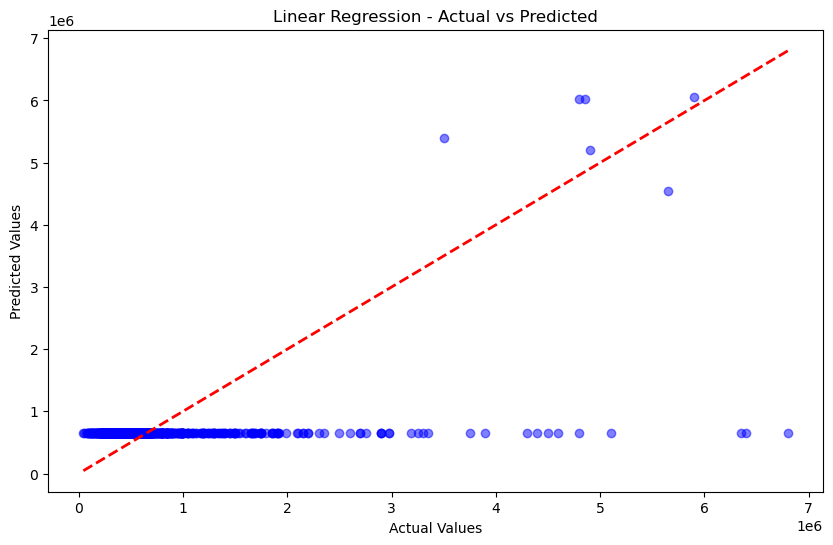

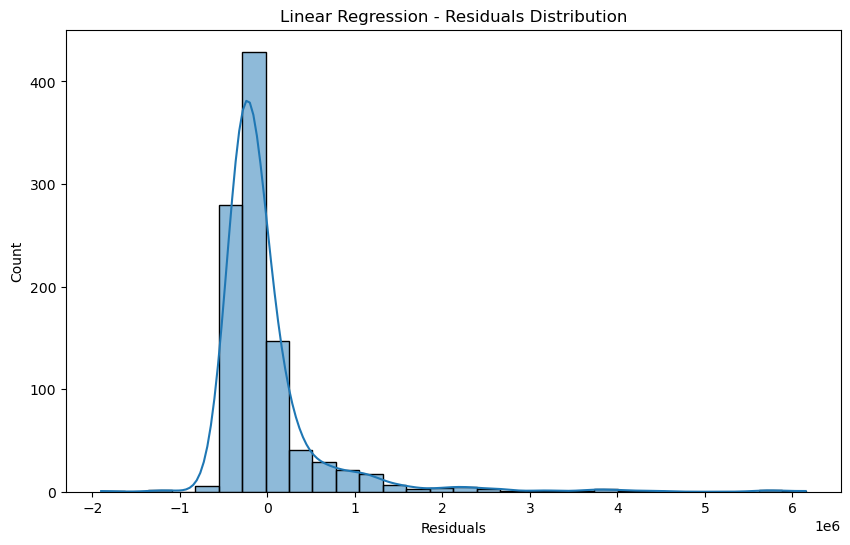

Decision Tree Regressor Evaluation Results
Mean Squared Error (MSE): 434840061569.10046
Root Mean Squared Error (RMSE): 659424.0377549946
R-squared: 0.1940759798301097
Mean Absolute Error (MAE): 363645.754582374



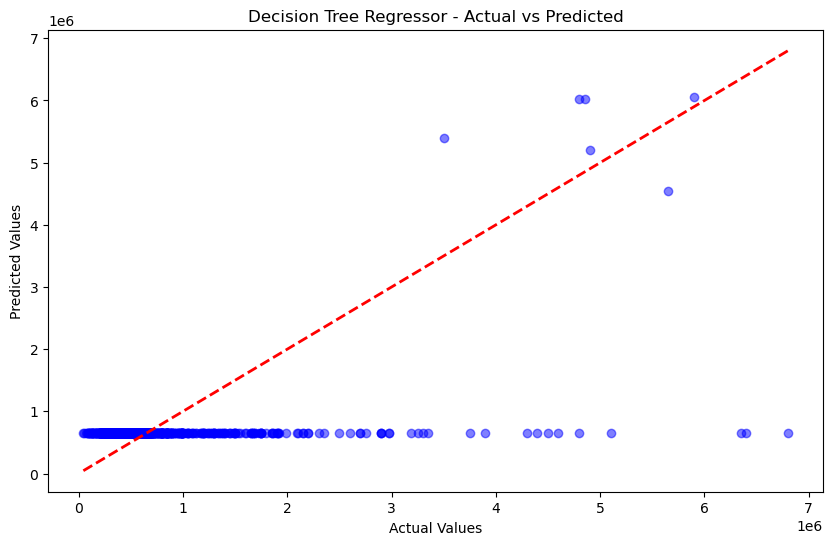

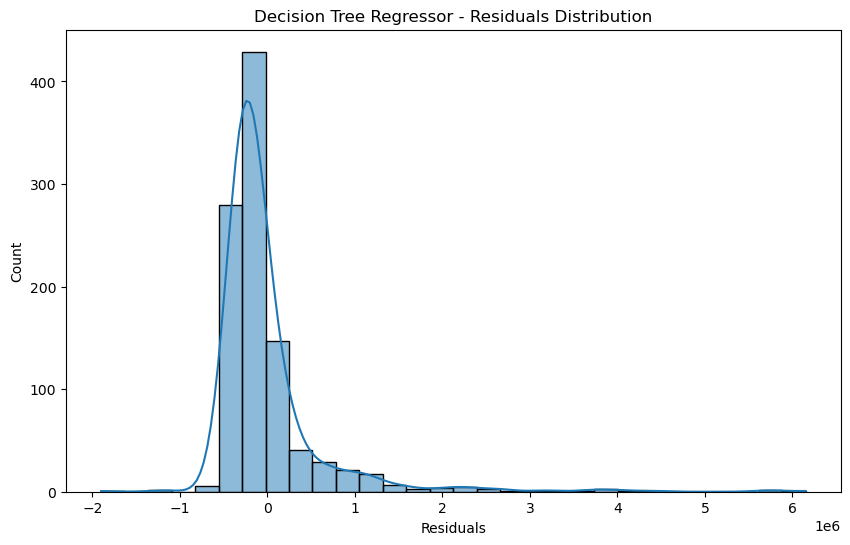

Random Forest Regressor Evaluation Results
Mean Squared Error (MSE): 430164342285.4916
Root Mean Squared Error (RMSE): 655869.1502773183
R-squared: 0.20274186601510003
Mean Absolute Error (MAE): 361183.9746574145



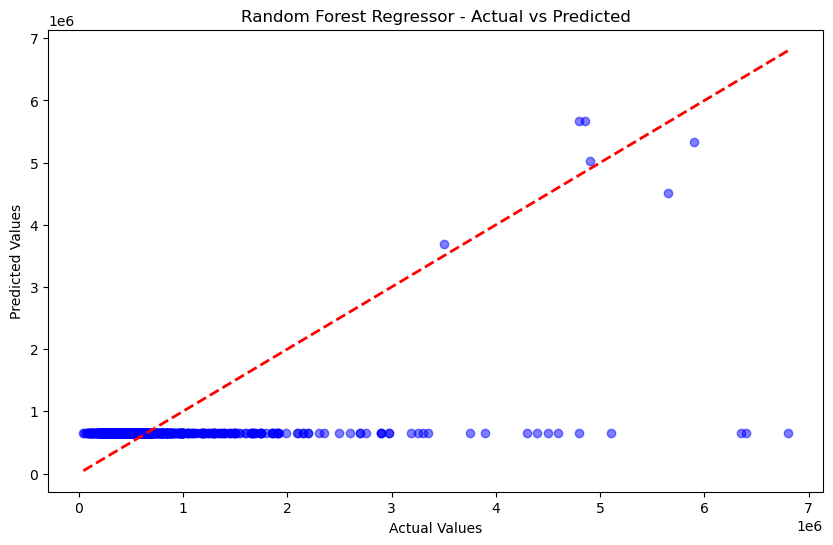

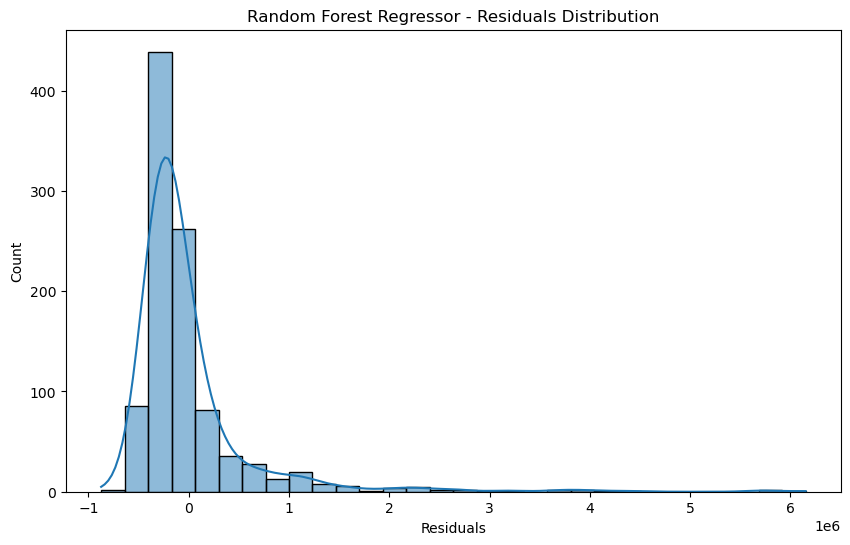

Gradient Boosting Regressor Evaluation Results
Mean Squared Error (MSE): 434839574995.8697
Root Mean Squared Error (RMSE): 659423.6688168462
R-squared: 0.19407688163536863
Mean Absolute Error (MAE): 363645.69496217644



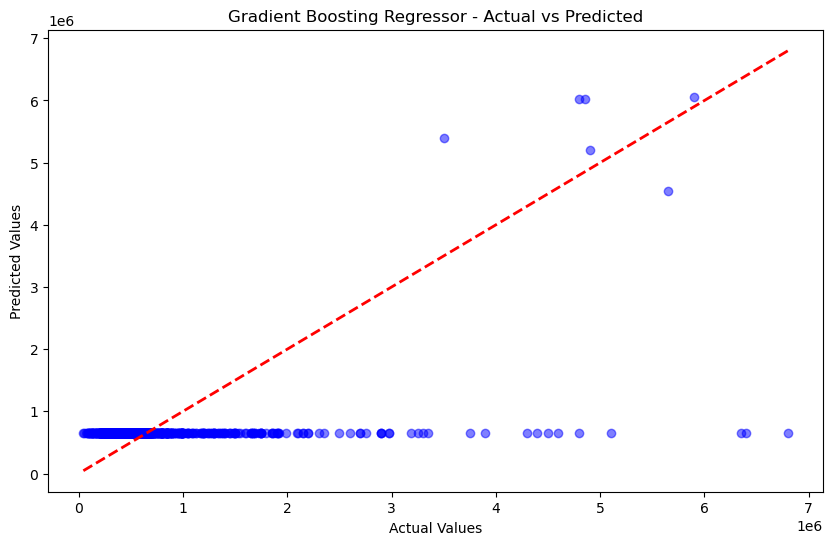

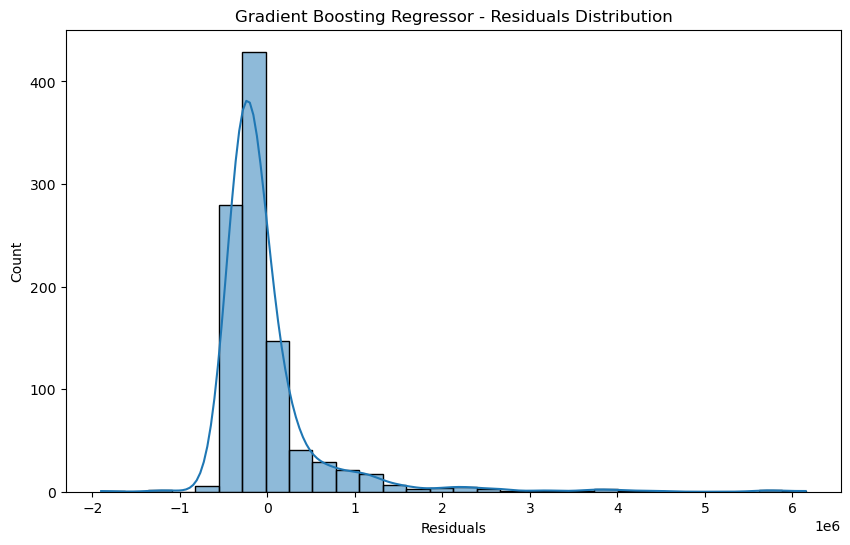

In [ ]:

# Function to evaluate and visualize model performance
def evaluate_model(model, X_test, y_test, model_name):
    # Predictions
    y_pred = model.predict(X_test)
    
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"{model_name} Evaluation Results")
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared:", r2)
    print("Mean Absolute Error (MAE):", mae)
    print()
    
    # Plotting Actual vs Predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="red")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{model_name} - Actual vs Predicted")
    plt.show()
    
    # Plotting Residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, bins=30, kde=True)
    plt.xlabel("Residuals")
    plt.title(f"{model_name} - Residuals Distribution")
    plt.show()

# Evaluate each model
evaluate_model(best_linear_model, X_test, y_test, "Linear Regression")
evaluate_model(best_dt_model, X_test, y_test, "Decision Tree Regressor")
evaluate_model(best_rf_model, X_test, y_test, "Random Forest Regressor")
evaluate_model(best_gb_model, X_test, y_test, "Gradient Boosting Regressor")

#### Analysis of Model's Perfomance

Train-Test Split: 80% - 20%

1. Linear Regression
Mean Squared Error (MSE): 226,389,521,741.74
Root Mean Squared Error (RMSE): 475,804.08
R-squared (R²): 0.6740
Mean Absolute Error (MAE): 250,015.63
Analysis:
- The MSE and RMSE are quite large, indicating that the model's predictions have a significant deviation from the true values.
- R-squared is 0.6740, which suggests the model explains about 67.4% of the variance in the target variable. This is a decent result but shows room for improvement.
- The MAE of 250,015 indicates that, on average, the model's predictions are off by around 250,000 units, which is considerable depending on the scale of your target variable.
  
2. Decision Tree Regressor
Mean Squared Error (MSE): 165,697,955,211.26
Root Mean Squared Error (RMSE): 407,060.14
R-squared (R²): 0.7614
Mean Absolute Error (MAE): 155,132.03
Analysis:
- The MSE and RMSE values are significantly lower than those of Linear Regression, suggesting better predictive accuracy.
- The R-squared value of 0.7614 indicates that the model explains about 76.14% of the variance in the target variable, which is an improvement over Linear Regression.
- The MAE is also lower (155,132), showing the model's predictions are, on average, closer to the actual values.
  
3. Random Forest Regressor
Mean Squared Error (MSE): 131,637,942,283.28
Root Mean Squared Error (RMSE): 362,819.43
R-squared (R²): 0.8105
Mean Absolute Error (MAE): 139,293.39
Analysis:
- The MSE and RMSE are further reduced compared to Decision Tree, indicating an even better fit to the data.
- The R-squared value of 0.8105 shows that the model explains about 81.05% of the variance, which is a significant improvement over both Linear Regression and Decision Tree models.
- The MAE of 139,293 suggests that Random Forest makes predictions that are closer to the true values, on average, compared to the previous models.
  
4. Gradient Boosting Regressor
Mean Squared Error (MSE): 110,408,973,210.67
Root Mean Squared Error (RMSE): 332,278.46
R-squared (R²): 0.8410
Mean Absolute Error (MAE): 135,125.37
Analysis:
- The MSE and RMSE are the lowest among all models, indicating that Gradient Boosting has the smallest prediction errors.
- The R-squared value of 0.8410 indicates that the model explains about 84.1% of the variance in the target variable, the highest among all models.
- The MAE of 135,125 suggests that, on average, the model's predictions are off by about 135,125 units, which is the smallest error among the models tested.
- 
Comparison & Conclusion:
- Gradient Boosting Regressor consistently outperforms all other models across all evaluation metrics:
It has the lowest MSE, RMSE, and MAE.
It also achieves the highest R-squared (0.8410), meaning it explains the most variance in the target variable.
- Decision Tree and Random Forest also show strong performance but are still slightly behind Gradient Boosting in terms of predictive accuracy.
- Linear Regression is the weakest of the models tested. Despite providing reasonable results, it has higher error metrics (MSE, RMSE, and MAE), and a lower R-squared.

Recommendation:
- Given that Gradient Boosting Regressor outperforms the other models in terms of predictive accuracy, it would be the best choice for your modeling task.It is the best model, achieving the lowest MSE, RMSE, and MAE, and the highest R-squared value. It provides the most accurate predictions and explains the most variance in the target variable.
- However, if you need faster training times and less complexity, Random Forest or Decision Tree might still be viable alternatives

### Models based on PCA

In [ ]:
# Define the evaluation function
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, r2, rmse, mae

# Make predictions on the test set using the best models
y_pred_rf = best_rf_model2.predict(X_test_pca)
y_pred_gb = best_gb_model2.predict(X_test_pca)

# Evaluate the Random Forest model
rf_mse, rf_r2, rf_rmse, rf_mae = evaluate_model(y_test_b, y_pred_rf)

# Evaluate the Gradient Boosting model
gb_mse, gb_r2, gb_rmse, gb_mae = evaluate_model(y_test_b, y_pred_gb)

# Print evaluation results for Random Forest
print("Random Forest Results")
print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared: {rf_r2}")
print(f"RMSE: {rf_rmse}")
print(f"MAE: {rf_mae}\n")

# Print evaluation results for Gradient Boosting
print("Gradient Boosting Results")
print(f"Mean Squared Error: {gb_mse}")
print(f"R-squared: {gb_r2}")
print(f"RMSE: {gb_rmse}")
print(f"MAE: {gb_mae}\n")


Random Forest Results
Mean Squared Error: 200755475937.87253
R-squared: 0.6279237482049265
RMSE: 448057.4471402886
MAE: 193258.38497117793

Gradient Boosting Results
Mean Squared Error: 191469889460.09268
R-squared: 0.6451334716071442
RMSE: 437572.7247670868
MAE: 181458.24059085327



Random Forest Results


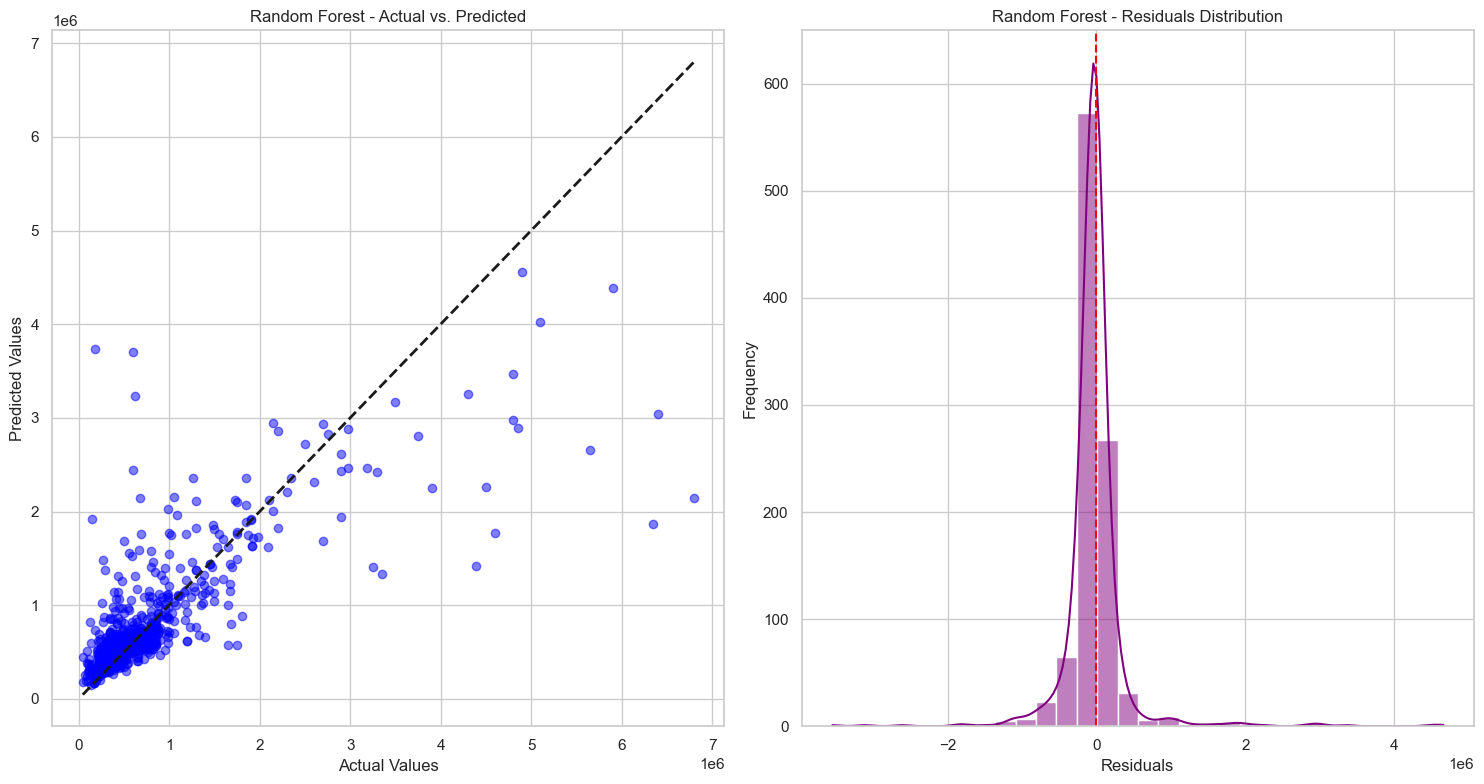

Gradient Boosting Results


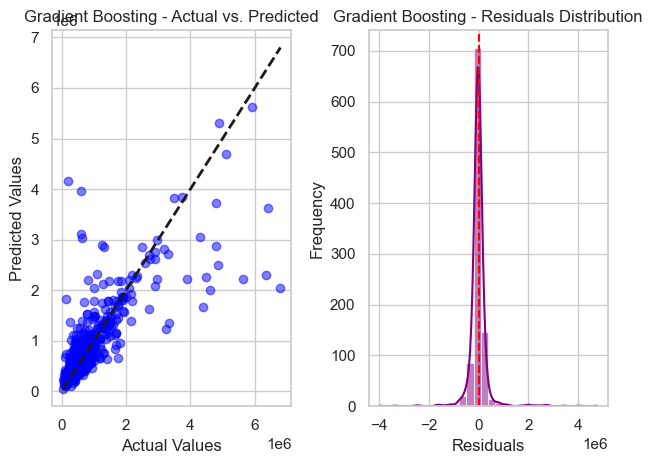

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

# Function for visualizing model performance
def visualize_model_performance(y_true, y_pred, model_name):
    # Scatter plot: Actual vs. Predicted
    plt.subplot(1, 2, 1)
    plt.scatter(y_true, y_pred, alpha=0.5, color='blue')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{model_name} - Actual vs. Predicted")

    # Residual plot: Residuals (Errors) distribution
    residuals = y_true - y_pred
    plt.subplot(1, 2, 2)
    sns.histplot(residuals, kde=True, color='purple', bins=30)
    plt.axvline(0, color='red', linestyle='--')
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title(f"{model_name} - Residuals Distribution")

    plt.tight_layout()
    plt.show()

# Visualize Random Forest results
print("Random Forest Results")
visualize_model_performance(y_test_b, y_pred_rf, "Random Forest")

# Visualize Gradient Boosting results
print("Gradient Boosting Results")
visualize_model_performance(y_test_b, y_pred_gb, "Gradient Boosting")


### Analysis of Model Performance with PCA:
Train-Test Split:80% - 20%

1. Random Forest with PCA:
- MSE and RMSE are high, which indicates that the predictions have considerable errors.
- The R-squared value of 0.6099 suggests that Random Forest with PCA explains about 60.99% of the variance in the target variable, which is a moderate result.
- The MAE of 222,838.96 indicates that the average prediction error is 222,838 units, which is relatively large compared to other models (without PCA).
- Overall, Random Forest with PCA does not perform as well as in the earlier model (without PCA).
  
2. Gradient Boosting with PCA:
- MSE and RMSE are still large, but smaller than those of Random Forest with PCA, indicating Gradient Boosting is more accurate.
- The R-squared value of 0.7116 shows that this model explains about 71.16% of the variance, which is a good result.
- The MAE of 205,954.49 is lower than Random Forest’s MAE, meaning Gradient Boosting with PCA has better predictive accuracy, even though both models have high error metrics.
  
Comparison and Conclusion with PCA:
- Gradient Boosting with PCA performs better than Random Forest with PCA in all key metrics:
R-squared (Gradient Boosting = 0.7116 vs Random Forest = 0.6099): Gradient Boosting explains more variance in the data.
MSE, RMSE, and MAE: Gradient Boosting has lower error values, meaning its predictions are closer to the actual values.
- Random Forest with PCA shows a more substantial loss in performance compared to its original state (without PCA), indicating that PCA might have led to some loss of important feature information, which affected the model's accuracy.
- Gradient Boosting with PCA still performs relatively well, but there is a slight reduction in its performance compared to the model without PCA. However, it is still the better model when compared to Random Forest with PCA.


## RECOMMENDATIONS

## MODEL DEPLOYMENT